# data source

original data source: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

### notes about sample weights
1. A sample weight is assigned to each record (identified by unique 'SEQN' variable). It is a measure of the number of people in the population represented by that sample person in NHANES, reflecting the unequal probability of selection, nonresponse adjustment, and adjustment to independent population controls.
2. Each component subsample has its own designated weight, which accounts for the additional probability of selection into the subsample component, as well as the additional nonresponse. 
3. It is important to check all of the variables in your analysis and select the weight of the smallest analysis subpopulation that includes all the variables you want to include in your analysis. 


#### List of sample weight variables included in files:
**demog_df:**   
'WTINT2YR' = full sample 2 year interview weight;
'WTMEC2YR' = full sample 2 year MEC exam weight.

**tot_intake1_df, tot_intake2_df:**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

**tot_diet_supp_1_df, tot_diet_supp_2_df:**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

# outstanding items 

## check sample weights

## fix features graphs 

## make pairplots bigger?

## what to do when log does not remove all outliers




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats.stats import ttest_ind
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', 1700)
pd.set_option('display.max_rows', 500)

# import data files from source

In [4]:
import os
import glob

path = r'C:\Users\katec\Thinkful\data_collections\NHANES_data\2015_2016_data' # use your path
file_names = glob.glob(path + '/*.csv')

In [ ]:
file_names

# read files into pandas and create dataframes

#### comment: attempts to use for loops, ordered dictionary, function, and concat were not successful;

each df has individual needs & requires unique name; not common problem; unable to find solution/alternative to individually reading files into pandas df despite google, slack & mentor

see attempts:
https://github.com/kathieking/Thinkful/blob/master/check42_initial_read_concat-Copy2.ipynb

In [5]:
body_measures_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\body_measures_15_16.csv')

In [6]:
bp_quest_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bpq.csv')

In [7]:
bp_measure_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bp_15_16.csv')

In [8]:
cbc_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\cbc_15_16.csv')

In [9]:
demog_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\demo_15_16.csv')

In [10]:
hdl_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\hdl_15_16.csv')

In [11]:
hscrp_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\HSCRP_I.csv')

In [12]:
med_cond_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\medical_cond.csv')

In [13]:
std_chem_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\std_chem.csv')

In [14]:
tot_intake1_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\total_dietary_intake_1.csv')

In [15]:
tot_intake2_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\total_dietary_intake_2.csv')

In [16]:
tot_chol_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_chol_15_16.csv')

In [17]:
tot_diet_supp_1_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_diet_supplement_1.csv')

In [18]:
tot_diet_supp_2_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_diet_supplement_2.csv')

## reduce each df to useful variables

### body measurements

In [ ]:
body_measures_df.head()

In [ ]:
body_measures_df.tail()

In [ ]:
body_measures_df['SEQN'].nunique()

In [19]:
#eliminatimg columns not using
body_measures_df = body_measures_df.drop(
    ['BMDSTATS', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
     'BMIHEAD', 'BMIHT', 'BMDBMIC', 'BMXLEG', 'BMILEG', 
     'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMIWAIST', 
     'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMDSADCM'], axis=1)
body_measures_df.head()

SEQN  BMXWT  BMXHT  BMXBMI  BMXWAIST  BMDAVSAD
0  83732.0   94.8  184.5    27.8     101.1      22.8
1  83733.0   90.4  171.4    30.8     107.9      27.3
2  83734.0   83.4  170.1    28.8     116.5      26.6
3  83735.0  109.8  160.9    42.4     110.1      25.1
4  83736.0   55.2  164.9    20.3      80.4       0.0

In [20]:
# no measure = 0, change 0 to NaN
body_measures_df = body_measures_df.replace(0, np.nan)

In [ ]:
body_measures_df.isnull().sum()

In [ ]:
body_measures_df.head()

In [ ]:
body_measures_df.info()

### blood pressure questions

In [ ]:
bp_quest_df.head()

In [ ]:
bp_quest_df.tail()

In [ ]:
bp_quest_df['SEQN'].nunique()

In [21]:
# no measure = 0, change 0 to NaN
bp_quest_df = bp_quest_df.replace(0, np.nan)

In [ ]:
bp_quest_df.isnull().sum()

In [22]:
# drop question "age told have high bp"
bp_quest_df = bp_quest_df.drop(['BPD035'], axis=1)

In [ ]:
bp_quest_df.head()

In [ ]:
bp_quest_df.info()

### blood pressure measurements

In [ ]:
bp_measure_df.head()

In [ ]:
bp_measure_df.tail()

In [ ]:
bp_measure_df['SEQN'].nunique()

In [23]:
bp_measure_df = bp_measure_df.drop(['PEASCCT1', 'BPXCHR', 'BPAARM', 
                                    'BPACSZ', 'BPXPLS', 'BPXPULS', 
                                    'BPXPTY', 'BPXML1', 'BPAEN1',
                                    'BPAEN2', 'BPAEN3', 'BPAEN4'], axis=1)
bp_measure_df.head()

SEQN  BPXSY1  BPXDI1  BPXSY2  BPXDI2  BPXSY3  BPXDI3  BPXSY4  BPXDI4
0  83732.0     128      70     124      64     116      62       0       0
1  83733.0     146      88     140      88     134      82       0       0
2  83734.0     138      46     132      44     136      46       0       0
3  83735.0     132      72     134      68     136      70       0       0
4  83736.0     100      70     114      54      98      56       0       0

In [24]:
# no measure = 0, change 0 to NaN
bp_measure_df = bp_measure_df.replace(0, np.nan)

In [ ]:
bp_measure_df.isnull().sum()

#### create average from 4 bp readings, delete individual readings

In [25]:
bp_measure_df['bp_sys_avg'] = bp_measure_df[['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].mean(axis=1)

In [26]:
bp_measure_df['bp_dis_avg'] = bp_measure_df[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis=1)

In [27]:
bp_measure_df.head()

SEQN  BPXSY1  BPXDI1  BPXSY2  BPXDI2  BPXSY3  BPXDI3  BPXSY4  BPXDI4  \
0  83732.0   128.0    70.0   124.0    64.0   116.0    62.0     NaN     NaN   
1  83733.0   146.0    88.0   140.0    88.0   134.0    82.0     NaN     NaN   
2  83734.0   138.0    46.0   132.0    44.0   136.0    46.0     NaN     NaN   
3  83735.0   132.0    72.0   134.0    68.0   136.0    70.0     NaN     NaN   
4  83736.0   100.0    70.0   114.0    54.0    98.0    56.0     NaN     NaN   

   bp_sys_avg  bp_dis_avg  
0  122.666667   65.333333  
1  140.000000   86.000000  
2  135.333333   45.333333  
3  134.000000   70.000000  
4  104.000000   60.000000

In [28]:
bp_measure_df = bp_measure_df.drop(['BPXSY1','BPXSY2','BPXSY3','BPXSY4',
                                 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4'], axis=1)

In [ ]:
bp_measure_df.isnull().sum()

In [ ]:
bp_measure_df.head()

In [ ]:
bp_measure_df.info()

### complete blood count

In [ ]:
cbc_df.head()

In [ ]:
cbc_df.tail()

In [ ]:
cbc_df['SEQN'].nunique()

In [29]:
cbc_df = cbc_df.replace(0, np.nan)

In [ ]:
cbc_df.isnull().sum()

In [30]:
cbc_df = cbc_df.drop(['LBXMCH', 'LBDBANO'], axis=1)

In [ ]:
cbc_df.head()

In [ ]:
cbc_df.info()

### demographics

In [ ]:
demog_df.head()

In [ ]:
demog_df.tail()

In [ ]:
demog_df['SEQN'].nunique()

In [31]:
demog_df = demog_df.drop(
    ['SDDSRVYR', 'RIDSTATR', 'RIDAGEMN', 'RIDEXAGM', 'RIDRETH1',
     'RIDRETH3', 'RIDEXMON', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 
     'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 
     'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 
     'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP',
     'AIALANGA', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 
     'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU',
     'DMDHRMAR', 'DMDHSEDU', 'SDMVPSU', 'SDMVSTRA', 
     'INDHHIN2', 'INDFMIN2'], axis=1)
demog_df.head()

SEQN  RIAGENDR  RIDAGEYR       WTINT2YR       WTMEC2YR  INDFMPIR
0  83732.0         1        62  134671.370419  135629.507405      4.39
1  83733.0         1        53   24328.560239   25282.425927      1.32
2  83734.0         1        78   12400.008522   12575.838818      1.51
3  83735.0         2        56  102717.995647  102078.634508      5.00
4  83736.0         2        42   17627.674984   18234.736219      1.23

In [32]:
demog_df = demog_df.replace(0, np.nan)

In [ ]:
demog_df.isnull().sum()

In [ ]:
demog_df.head()

In [ ]:
demog_df.info()

### hdl cholesterol

In [ ]:
hdl_df.head()

In [ ]:
hdl_df.tail()

In [ ]:
hdl_df['SEQN'].nunique()

In [33]:
hdl_df = hdl_df.drop(['LBDHDDSI'], axis=1)
hdl_df.head()

SEQN  LBDHDD
0  83732.0    46.0
1  83733.0    63.0
2  83734.0    30.0
3  83735.0    61.0
4  83736.0    53.0

In [34]:
# no measure = 0, change 0 to NaN
hdl_df = hdl_df.replace(0, np.nan)

In [ ]:
hdl_df.isnull().sum()

In [ ]:
hdl_df.head()

In [ ]:
hdl_df.info()

### high sensitivity C-reactive protein

In [ ]:
hscrp_df.head()

In [ ]:
hscrp_df.tail()

In [ ]:
hscrp_df['SEQN'].nunique()

In [35]:
hscrp_df = hscrp_df.drop(['LBDHRPLC'], axis=1)
hscrp_df.head()

SEQN  LBXHSCRP
0  83732.0       0.6
1  83733.0       1.4
2  83734.0       0.6
3  83735.0       9.0
4  83736.0       0.5

In [36]:
# no measure = 0, change 0 to NaN
hscrp_df = hscrp_df.replace(0, np.nan)

In [ ]:
hscrp_df.isnull().sum()

In [ ]:
hscrp_df.head()

In [ ]:
hscrp_df.info()

### standard chemistry

In [ ]:
std_chem_df.head()

In [ ]:
std_chem_df.tail()

In [ ]:
std_chem_df['SEQN'].nunique()

In [37]:
std_chem_df = std_chem_df.drop(
    ['LBDSALSI','LBDSBUSI','LBDSCASI','LBDSCHSI', 'LBDSCRSI', 
     'LBXSGB', 'LBDSGBSI', 'LBDSGLSI', 'LBXSGTSI', 'LBDSIRSI', 
     'LBDSTBSI', 'LBDSTPSI', 'LBDSTRSI', 'LBDSUASI'], axis=1)
std_chem_df.head()

SEQN  LBXSAL  LBXSAPSI  LBXSASSI  LBXSATSI  LBXSBU  LBXSC3SI  LBXSCA  \
0  83732.0     4.6      52.0      21.0      25.0    13.0        25     9.8   
1  83733.0     4.5      47.0      31.0      35.0    10.0        27     9.8   
2  83734.0     4.5      46.0      30.0      29.0    26.0        24     9.7   
3  83735.0     3.8      65.0      23.0      26.0    13.0        24     8.9   
4  83736.0     4.3      46.0      20.0      13.0    12.0        24     9.3   

   LBXSCH  LBXSCK  LBXSCLSI  LBXSCR  LBXSGL  LBXSIR  LBXSKSI  LBXSLDSI  \
0     172     203       100    0.90      94      70     4.30       110   
1     267      91       103    1.05      94     161     4.55       108   
2     236     160       106    1.12     103      72     4.70       151   
3     179      66       106    0.96      63      43     4.08       172   
4     202      67        99    0.64      83      44     3.50        93   

   LBXSNASI  LBXSOSSI  LBXSPH  LBDSPHSI  LBXSTB  LBXSTP  LBXSTR  LBXSUA  
0       136       272     4.7     1.518     0.5     7.5     158     4.2  
1       140       278     4.4     1.421     0.6     7.4     170     7.0  
2       140       284     3.6     1.162     0.5     7.3     299     7.3  
3       141       279     3.8     1.227     0.3     6.1      93     5.4  
4       136       270     3.2     1.033     0.3     7.7      52     3.3

In [38]:
std_chem_df = std_chem_df.replace(0, np.nan)

In [ ]:
std_chem_df.isnull().sum()

In [ ]:
std_chem_df.head()

In [ ]:
std_chem_df.info()

### medical condition

In [ ]:
med_cond_df.head()

In [ ]:
med_cond_df.tail()

In [ ]:
med_cond_df['SEQN'].nunique()

In [39]:
med_cond_df = med_cond_df.drop(['MCQ010','MCQ025','MCQ035','MCQ040', 'MCQ050',
                                'AGQ030', 'MCQ053', 'MCQ080', 'MCQ092', 
                                'MCD093', 'MCQ149', 'MCQ151', 'MCQ160A', 
                                'MCQ180A', 'MCQ195', 'MCQ160N', 'MCQ180N', 
                                'MCQ160F', 'MCQ180F', 'MCQ160G', 'MCQ180G', 
                                'MCQ160M', 'MCQ170M', 'MCQ180M', 'MCQ160K', 
                                'MCQ170K', 'MCQ160L', 'MCQ170L', 'MCQ180L', 
                                'MCQ160O', 'MCQ203', 'MCQ206', 'MCQ220', 
                                'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D', 
                                'MCQ240A', 'MCQ240AA', 'MCQ240B', 'MCQ240BB', 
                                'MCQ240C', 'MCQ240CC', 'MCQ240D', 'MCQ240DD', 
                                'MCQ240DK', 'MCQ240E', 'MCQ240F', 'MCQ240G', 
                                'MCQ240H', 'MCQ240I', 'MCQ240J', 'MCQ240K', 
                                'MCQ240L', 'MCQ240M', 'MCQ240N', 'MCQ240O', 
                                'MCQ240P', 'MCQ240Q', 'MCQ240R', 'MCQ240S', 
                                'MCQ240T', 'MCQ240U', 'MCQ240V', 'MCQ240W', 
                                'MCQ240X', 'MCQ240Y', 'MCQ240Z', 'MCQ300B', 
                                'MCQ300C', 'MCQ365A', 'MCQ365B', 'MCQ370B', 
                                'OSQ230'], axis=1)
med_cond_df.head()

SEQN  MCQ160B  MCQ180B  MCQ160C  MCQ180C  MCQ160D  MCQ180D  MCQ160E  \
0  83732        2        0        2        0        2        0        2   
1  83733        2        0        2        0        2        0        2   
2  83734        2        0        2        0        2        0        1   
3  83735        2        0        2        0        2        0        2   
4  83736        2        0        2        0        2        0        2   

   MCQ180E  MCQ180K  MCQ300A  MCQ365C  MCQ365D  MCQ370A  MCQ370C  MCQ370D  
0        0        0        2        2        2        1        2        2  
1        0        0        2        2        2        2        2        2  
2       58        0        2        1        1        1        2        1  
3        0        0        9        2        1        1        1        1  
4        0        0        2        2        2        2        2        2

In [40]:
med_cond_df = med_cond_df.replace(0, np.nan)

In [ ]:
med_cond_df.isnull().sum()

In [41]:
med_cond_df = med_cond_df.drop(['MCQ180B', 'MCQ180C', 'MCQ180D', 'MCQ180E', 'MCQ180K'], axis=1)

In [42]:
med_cond_df['SEQN'] = med_cond_df['SEQN'].astype(float)

In [ ]:
med_cond_df.head()

In [ ]:
med_cond_df.info()

### total dietary intake 1

In [ ]:
tot_intake1_df.head()

In [ ]:
tot_intake1_df.tail()

In [ ]:
tot_intake1_df['SEQN'].nunique()

In [43]:
tot_intake1_df = tot_intake1_df.drop(['DR1DRSTZ','DR1EXMER','DRABF','DR1DBIH',
                                      'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP',
                                      'DR1TNUMF', 'DR1TS040', 'DR1TS060', 'DR1TS080',
                                      'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 
                                      'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 
                                      'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184', 
                                      'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 
                                      'DR1_300', 'DR1_330Z', 'DR1BWATZ', 'DR1TWS', 
                                      'DRD340', 'DRD350A','DRD350AQ', 'DRD350B', 
                                      'DRD350BQ', 'DRD350C', 'DRD350CQ', 'DRD350D', 
                                      'DRD350DQ', 'DRD350E', 'DRD350EQ', 'DRD350F', 
                                      'DRD350FQ', 'DRD350G', 'DRD350GQ', 'DRD350H', 
                                      'DRD350HQ', 'DRD350I', 'DRD350IQ', 'DRD350J', 
                                      'DRD350JQ', 'DRD350K','DRD370AQ', 'DRD370A', 
                                      'DRD370B', 'DRD370BQ', 'DRD370C', 'DRD370CQ', 
                                      'DRD370D', 'DRD370DQ', 'DRD370E', 'DRD370EQ', 
                                      'DRD370F', 'DRD370FQ', 'DRD370G', 'DRD370GQ', 
                                      'DRD370H', 'DRD370HQ', 'DRD370I', 'DRD370IQ', 
                                      'DRD370J', 'DRD370JQ', 'DRD370K', 'DRD370KQ', 
                                      'DRD370L', 'DRD370LQ', 'DRD370M', 'DRD370MQ', 
                                      'DRD370N', 'DRD370NQ', 'DRD370O', 'DRD370OQ', 
                                      'DRD370P', 'DRD370PQ', 'DRD370Q', 'DRD370QQ', 
                                      'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 
                                      'DRD370T', 'DRD370TQ', 'DRD370U', 'DRD370UQ', 
                                      'DRD370V'], axis=1)
tot_intake1_df.head()

SEQN        WTDRD1        WTDR2D  DRDINT  DBQ095Z  DBD100  DRQSPREP  \
0  83732.0  92670.699919  69945.934107     2.0        1       3         3   
1  83733.0  16454.105994  13190.268870     2.0        4       0         2   
2  83734.0   6529.619788   4928.422423     2.0        1       3         4   
3  83735.0  58191.539622      0.000000     1.0        1       2         2   
4  83736.0  12358.085471   9813.677587     2.0        1       1         4   

   DR1STY  DR1SKY  DRQSDIET  DRQSDT1  DRQSDT2  DRQSDT3  DRQSDT4  DRQSDT5  \
0       1       1         2        0        0        0        0        0   
1       2       0         2        0        0        0        0        0   
2       1       1         1        1        0        0        0        0   
3       2       0         2        0        0        0        0        0   
4       2       0         2        0        0        0        0        0   

   DRQSDT6  DRQSDT7  DRQSDT8  DRQSDT9  DRQSDT10  DRQSDT11  DRQSDT12  DRQSDT91  \
0        0        0        0        0         0         0         0         0   
1        0        0        0        0         0         0         0         0   
2        0        0        0        0         0         0         0         0   
3        0        0        0        0         0         0         0         0   
4        0        0        0        0         0         0         0         0   

   DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  \
0      1781     76.03    193.29     42.31      23.6     79.24    23.430   
1      2964     62.36    356.85    180.84       7.3     77.91    25.722   
2      2482    116.50    304.53     62.87      35.1     91.97    23.122   
3      1340     70.38    157.99     54.77      14.0     49.23    17.593   
4       604     19.30     90.30     71.84       2.0     19.63     4.581   

   DR1TMFAT  DR1TPFAT  DR1TCHOL  DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  \
0    31.897    18.528       138     10.59       0.0      230       307   
1    19.098    19.216       407      4.19       0.0      352       453   
2    28.666    32.561       506     11.62       0.0      349       555   
3    18.327     9.588       138      4.92       0.0      390       416   
4     8.504     3.889        96      1.76       0.0       17        85   

   DR1TACAR  DR1TBCAR  DR1TCRYP  DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  \
0       336       624       282      1206    1120    2.344    1.949    20.401   
1       405       966        20         0    1279    1.859    2.478    29.444   
2        13      2253       548     29458     774    2.776    2.406    27.708   
3        25       301         8      2272     227    0.866    1.608    24.306   
4         7       789        67      4497      47    0.168    0.219     7.340   

   DR1TVB6  DR1TFOLA  DR1TFA  DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  \
0    2.279       450     163     286       564    290.7      1.89       0.0   
1    1.823       478     112     365       556    672.7      2.92       0.0   
2    3.117       553      65     488       599    638.6      2.35       0.0   
3    1.259       175      63     110       218    227.8      3.08       0.0   
4    0.409        52       6      46        56     69.2      0.36       0.0   

   DR1TVC  DR1TVD  DR1TVK  DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  \
0   110.5     2.6   139.0       623      1052       255     16.01      8.73   
1    30.2     4.6    87.6       594      1414       262     11.01      4.82   
2    86.9     4.7   124.2       872      1527       497     26.17     14.09   
3     9.8     6.9    36.3      1284      1439       318      9.07      7.59   
4    38.0     0.0     9.1        72       255        42      1.83      1.54   

   DR1TCOPP  DR1TSODI  DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  \
0     1.095      5298      2641     113.6       360         0       0.0   
1     0.571      3164      2249      89.9       192         0      89.3   
2     2.414      5659      5154     140.9

#intake values can be 0!! can not change to Nan
#tot_intake1_df = tot_intake1_df.replace(0, np.nan)
#missing values ~1217

In [ ]:
tot_intake1_df.isnull().sum()

In [44]:
tot_intake1_df = tot_intake1_df.drop(['DR1SKY', 'DRQSDT1', 'DRQSDT2', 
                                      'DRQSDT3', 'DRQSDT4', 'DRQSDT5',
                                      'DRQSDT6',  'DRQSDT7', 'DRQSDT8',
                                      'DRQSDT9',  'DRQSDT10', 'DRQSDT11', 
                                      'DRQSDT12', 'DRQSDT91', 'DR1TALCO',
                                     'DR1TATOA', 'DR1TB12A', 'DR1TTHEO'],
                                     axis=1)

In [ ]:
tot_intake1_df.head()

In [ ]:
tot_intake1_df.info()

### total dietary intake 2

In [ ]:
tot_intake2_df.head()

In [ ]:
tot_intake2_df.tail()

In [ ]:
tot_intake2_df['SEQN'].nunique()

In [45]:
tot_intake2_df = tot_intake2_df.drop(['DR2DRSTZ','DR2EXMER','DRABF','DR2DBIH',
                                      'DR2DAY', 'DR2LANG', 'DR2MRESP', 'DR2HELP',
                                      'DR2TNUMF', 'DR2TS040', 'DR2TS060', 'DR2TS080',
                                      'DR2TS100', 'DR2TS120', 'DR2TS140', 'DR2TS160', 
                                      'DR2TS180', 'DR2TM161', 'DR2TM181', 'DR2TM201', 
                                      'DR2TM221', 'DR2TP182', 'DR2TP183', 'DR2TP184', 
                                      'DR2TP204', 'DR2TP205', 'DR2TP225', 'DR2TP226', 
                                      'DR2_300', 'DR2_330Z', 'DR2BWATZ', 'DR2TWS'], axis=1)
tot_intake2_df.head()

SEQN        WTDRD1        WTDR2D  DRDINT  DR2STY  DR2SKY  DR2TKCAL  \
0  83732  92670.699919  69945.934107       2       1       1      2744   
1  83733  16454.105994  13190.268870       2       2       0      3971   
2  83734   6529.619788   4928.422423       2       2       0      1928   
3  83735  58191.539622      0.000000       1       0       0         0   
4  83736  12358.085471   9813.677587       2       2       0      1102   

   DR2TPROT  DR2TCARB  DR2TSUGR  DR2TFIBE  DR2TTFAT  DR2TSFAT  DR2TMFAT  \
0    133.60    281.64    118.40      15.9    121.59    40.420    42.428   
1    165.86    223.57     34.52      12.2    154.55    32.969    61.039   
2     93.78    194.17     94.51      17.4     90.14    39.829    30.152   
3      0.00      0.00      0.00       0.0      0.00     0.000     0.000   
4     31.29    131.83     73.63       3.1     50.88    21.936    17.853   

   DR2TPFAT  DR2TCHOL  DR2TATOC  DR2TATOA  DR2TRET  DR2TVARA  DR2TACAR  \
0    26.813       635      8.62       0.0      494       996        91   
1    47.020       773     17.82       0.0      231       296       144   
2    10.465       326      4.41       0.0      569       625        27   
3     0.000         0      0.00       0.0        0         0         0   
4     5.942       181      1.87       0.0      210       227        11   

   DR2TBCAR  DR2TCRYP  DR2TLYCO  DR2TLZ  DR2TVB1  DR2TVB2  DR2TNIAC  DR2TVB6  \
0      5970        42      1715    8474    2.027    3.286    35.661    3.283   
1       644       108      3165    1133    1.933    2.806    43.695    3.068   
2       615        51      3383     226    0.960    4.828    21.310    1.742   
3         0         0         0       0    0.000    0.000     0.000    0.000   
4       144       111      1051     144    0.587    0.297    11.569    0.591   

   DR2TFOLA  DR2TFA  DR2TFF  DR2TFDFE  DR2TCHL  DR2TVB12  DR2TB12A  DR2TVC  \
0       395     160     235       507    540.4      7.01       0.0    64.6   
1       529     126     403       617   1105.8     18.44       0.0    27.9   
2       199      83     117       256    391.0      5.48       0.0    23.4   
3         0       0       0         0      0.0      0.00       0.0     0.0   
4       134      92      42       199     95.2      0.67       0.0    52.7   

   DR2TVD  DR2TVK  DR2TCALC  DR2TPHOS  DR2TMAGN  DR2TIRON  DR2TZINC  DR2TCOPP  \
0     9.6   533.4      1433      1880       334     15.67     15.09     1.265   
1     3.2   139.4       629      2662       524     15.95      9.30     1.213   
2     0.3    63.9       887      1348       277     14.61     16.64     1.601   
3     0.0     0.0         0         0         0      0.00      0.00     0.000   
4     0.1     6.8       116       431        58      3.41      3.05     0.286   

   DR2TSODI  DR2TPOTA  DR2TSELE  DR2TCAFF  DR2TTHEO  DR2TALCO  DR2TMOIS  \
0      4431      3774     167.8       171         7       0.0   3694.92   
1      4653      4915     153.5       180         0     144.9   5223.07   
2      2625      2726      97.4       228       216       0.0   2096.38   
3         0         0       0.0         0         0       0.0      0.00   
4      1924       694      51.9        22         0       0.0    822.95   

   DR2_320Z  
0    1440.0  
1     480.0  
2     720.0  
3       0.0  
4       0.0

#intake values can be 0!! can not change to Nan
#tot_intake2_df = tot_intake2_df.replace(0, np.nan)

In [46]:
tot_intake2_df = tot_intake2_df.drop(['DR2SKY', 'DR2TATOA', 'DR2TB12A', 'DR2TCAFF',
                                      'DR2TTHEO', 'DR2TALCO'], axis=1)

In [ ]:
tot_intake2_df.isnull().sum()

In [47]:
tot_intake2_df['SEQN'] = tot_intake2_df['SEQN'].astype(float)

In [ ]:
tot_intake2_df.head()

In [ ]:
tot_intake2_df.info()

### total cholesterol

In [ ]:
tot_chol_df.head()

In [ ]:
tot_chol_df.tail()

In [ ]:
tot_chol_df['SEQN'].nunique()

In [48]:
tot_chol_df = tot_chol_df.drop(['LBDTCSI'], axis=1)
tot_chol_df.head()

SEQN  LBXTC
0  83732.0  173.0
1  83733.0  265.0
2  83734.0  229.0
3  83735.0  174.0
4  83736.0  204.0

In [49]:
tot_chol_df = tot_chol_df.replace(0, np.nan)

In [ ]:
tot_chol_df.isnull().sum()

In [ ]:
tot_chol_df.head()

In [ ]:
tot_chol_df.info()

### total dietary supplement day 1

In [ ]:
tot_diet_supp_1_df.head()

In [ ]:
tot_diet_supp_1_df.tail()

In [ ]:
tot_diet_supp_1_df['SEQN'].nunique()

In [50]:
tot_diet_supp_1_df = tot_diet_supp_1_df.drop(['DR1DRSTZ','DR1EXMER','DRDINT','DR1DBIH',
                                      'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP',
                                      'DS1DSCNT', 'DS1ANCNT'], axis=1)
tot_diet_supp_1_df.head()

SEQN        WTDRD1        WTDR2D  DS1DS  DS1AN  DS1TKCAL  DS1TPROT  \
0  83732.0  92670.699919  69945.934107      1      2       150       0.0   
1  83733.0  16454.105994  13190.268870      2      1         5       0.0   
2  83734.0   6529.619788   4928.422423      1      2         0       0.0   
3  83735.0  58191.539622      0.000000      2      2         0       0.0   
4  83736.0  12358.085471   9813.677587      1      2         0       0.0   

   DS1TCARB  DS1TSUGR  DS1TFIBE  DS1TTFAT  DS1TSFAT  DS1TMFAT  DS1TPFAT  \
0      42.0      24.0      18.0       0.0       0.0       0.0       0.0   
1       0.0       1.5       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   DS1TCHOL  DS1TLYCO  DS1TLZ  DS1TVB1  DS1TVB2  DS1TNIAC  DS1TVB6  DS1TVB12  \
0         0       300     250     1.50      1.7      20.0      3.0      25.0   
1         0         0       0     0.00      0.0       0.0      0.0       0.0   
2         0       300       0     1.35      1.7      18.0      3.0      18.0   
3         0         0       0     0.00      0.0       0.0      0.0       0.0   
4         0         0       0     0.00      0.0       0.0     26.0      25.0   

   DS1TFA  DS1TFDFE  DS1TCHL  DS1TVC  DS1TVK  DS1TVD  DS1TCALC  DS1TPHOS  \
0     400       680      0.0    60.0    30.0    12.5     220.0      20.0   
1       0         0      0.0     0.0     0.0     0.0     400.0       0.0   
2     400       680      0.0    60.0    20.0    17.5     210.0       0.0   
3       0         0      0.0     0.0     0.0     0.0       0.0       0.0   
4    1000      1700      0.0    90.0     0.0    10.0     155.0       0.0   

   DS1TMAGN  DS1TIRON  DS1TZINC  DS1TCOPP  DS1TSODI  DS1TPOTA  DS1TSELE  \
0      50.0       4.2      11.0       0.5      30.0     290.0      19.0   
1       2.0       0.0       0.0       0.0       0.0       0.0       0.0   
2     140.0       0.0      15.0       2.0       0.0       0.0     110.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4      50.0      18.0       0.0       0.0       0.0       0.0       0.0   

   DS1TCAFF  DS1TIODI  
0         0     150.0  
1         0       0.0  
2         0       0.0  
3         0       0.0  
4         0       0.0

#intake values can be 0!! can not change to Nan
#tot_diet_supp_1_df = tot_diet_supp_1_df.replace(0, np.nan)

In [ ]:
tot_diet_supp_1_df.isnull().sum()

In [51]:
tot_diet_supp_1_df = tot_diet_supp_1_df.drop(['DS1TKCAL', 'DS1TPROT', 
                                              'DS1TCARB', 'DS1TSUGR', 
                                              'DS1TFIBE', 'DS1TTFAT',
                                              'DS1TSFAT', 'DS1TMFAT',
                                              'DS1TPFAT', 'DS1TCHOL',
                                              'DS1TLYCO',  'DS1TLZ',
                                              'DS1TCHL',  'DS1TVK',
                                              'DS1TPHOS', 'DS1TCAFF',
                                              'DS1TIODI'], axis=1)

In [ ]:
tot_diet_supp_1_df.head()

In [ ]:
tot_diet_supp_1_df.info()

### total dietary supplement day 2

In [ ]:
tot_diet_supp_2_df.head()

In [ ]:
tot_diet_supp_2_df.tail()

In [ ]:
tot_diet_supp_2_df['SEQN'].nunique()

In [52]:
tot_diet_supp_2_df = tot_diet_supp_2_df.drop(['DR2DRSTZ','DR2EXMER','DRDINT','DR2DBIH',
                                      'DR2DAY', 'DR2LANG', 'DR2MRESP', 'DR2HELP',
                                      'DS2DSCNT', 'DS2ANCNT'], axis=1)
tot_diet_supp_2_df.head()

SEQN        WTDRD1        WTDR2D  DS2DS  DS2AN  DS2TKCAL  DS2TPROT  \
0  83732.0  92670.699919  69945.934107      1      2        75       0.0   
1  83733.0  16454.105994  13190.268870      2      1         5       0.0   
2  83734.0   6529.619788   4928.422423      1      2         0       0.0   
3  83735.0  58191.539622      0.000000      0      0         0       0.0   
4  83736.0  12358.085471   9813.677587      1      2         0       0.0   

   DS2TCARB  DS2TSUGR  DS2TFIBE  DS2TTFAT  DS2TSFAT  DS2TMFAT  DS2TPFAT  \
0      21.0      12.0       9.0       0.0       0.0       0.0       0.0   
1       0.0       1.5       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   DS2TCHOL  DS2TLYCO  DS2TLZ  DS2TVB1  DS2TVB2  DS2TNIAC  DS2TVB6  DS2TVB12  \
0       0.0       300     250     1.50      1.7      20.0      3.0      25.0   
1       0.0         0       0     0.00      0.0       0.0      0.0       0.0   
2       0.0       300       0     1.35      1.7      18.0      3.0      18.0   
3       0.0         0       0     0.00      0.0       0.0      0.0       0.0   
4       0.0         0       0     0.00      0.0       0.0     26.0      25.0   

   DS2TFA  DS2TFDFE  DS2TCHL  DS2TVC  DS2TVK  DS2TVD  DS2TCALC  DS2TPHOS  \
0     400       680      0.0    60.0    30.0    12.5     220.0      20.0   
1       0         0      0.0     0.0     0.0     0.0     400.0       0.0   
2     400       680      0.0    60.0    20.0    17.5     210.0       0.0   
3       0         0      0.0     0.0     0.0     0.0       0.0       0.0   
4    1000      1700      0.0    90.0     0.0    10.0     155.0       0.0   

   DS2TMAGN  DS2TIRON  DS2TZINC  DS2TCOPP  DS2TSODI  DS2TPOTA  DS2TSELE  \
0      50.0       2.1      11.0       0.5      15.0     185.0      19.0   
1       2.0       0.0       0.0       0.0       0.0       0.0       0.0   
2     140.0       0.0      15.0       2.0       0.0       0.0     110.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4      50.0      18.0       0.0       0.0       0.0       0.0       0.0   

   DS2TCAFF  DS2TIODI  
0         0     150.0  
1         0       0.0  
2         0       0.0  
3         0       0.0  
4         0       0.0

#intake values can be 0!! can not change to Nan
#tot_diet_supp_2_df = tot_diet_supp_2_df.replace(0, np.nan)

In [ ]:
tot_diet_supp_2_df.isnull().sum()

In [53]:
tot_diet_supp_2_df = tot_diet_supp_2_df.drop(['DS2TKCAL', 'DS2TPROT', 
                                              'DS2TCARB', 'DS2TSUGR', 
                                              'DS2TFIBE', 'DS2TTFAT',
                                              'DS2TSFAT', 'DS2TMFAT',
                                              'DS2TPFAT', 'DS2TCHOL',
                                              'DS2TLYCO',  'DS2TLZ',
                                              'DS2TCHL',  'DS2TVK',
                                              'DS2TPHOS', 'DS2TCAFF',
                                              'DS2TIODI'], axis=1)

In [ ]:
tot_diet_supp_2_df.head()

In [ ]:
tot_diet_supp_2_df.info()

## merging

#### df in merge order
demog_df, med_cond_df, body_measures_df, bp_quest_df, 
bp_measure_df, cbc_df, std_chem_df,  
hdl_df, tot_chol_df, hscrp_df,

In [54]:
nhanes27_df = pd.merge(demog_df, med_cond_df, on=['SEQN'], how='left')

In [55]:
nhanes27_df.tail()

SEQN  RIAGENDR  RIDAGEYR       WTINT2YR       WTMEC2YR  \
10020  3.687825e-40         2      24.0  107361.906644  105080.445194   
10021  3.687825e-40         2      24.0  107361.906644  105080.445194   
10022  3.687825e-40         2      24.0  107361.906644  105080.445194   
10023  3.687825e-40         2      24.0  107361.906644  105080.445194   
10024  3.687825e-40         2      24.0  107361.906644  105080.445194   

       INDFMPIR  MCQ160B  MCQ160C  MCQ160D  MCQ160E  MCQ300A  MCQ365C  \
10020      3.54      NaN      NaN      NaN      NaN      NaN      NaN   
10021      3.54      NaN      NaN      NaN      NaN      NaN      NaN   
10022      3.54      NaN      NaN      NaN      NaN      NaN      NaN   
10023      3.54      NaN      NaN      NaN      NaN      NaN      NaN   
10024      3.54      NaN      NaN      NaN      NaN      NaN      NaN   

       MCQ365D  MCQ370A  MCQ370C  MCQ370D  
10020      NaN      NaN      NaN      NaN  
10021      NaN      NaN      NaN      NaN  
10022      NaN      NaN      NaN      NaN  
10023      NaN      NaN      NaN      NaN  
10024      NaN      NaN      NaN      NaN

In [ ]:
nhanes27_df.info()

In [56]:
nhanes28_df = pd.merge(nhanes27_df, body_measures_df, on=['SEQN'], how='left')

In [ ]:
nhanes28_df.tail()

In [ ]:
nhanes28_df.info()

In [57]:
nhanes29_df = pd.merge(nhanes28_df, bp_quest_df, on=['SEQN'], how='left')

In [ ]:
nhanes29_df.tail()

#### comment:  unsure why adding so many duplicate rows on a left/inner merge???

In [58]:
nhanes29_df = nhanes29_df.drop_duplicates()

In [59]:
nhanes30_df = pd.merge(nhanes29_df, bp_measure_df, on=['SEQN'], how='left')

In [ ]:
nhanes30_df.tail()

In [60]:
nhanes31_df = pd.merge(nhanes30_df, cbc_df, on=['SEQN'], how='left')

In [ ]:
nhanes31_df.tail()

In [61]:
nhanes32_df = pd.merge(nhanes31_df, std_chem_df, on=['SEQN'], how='left')

In [ ]:
nhanes32_df.tail()

In [62]:
nhanes32_df = nhanes32_df.drop_duplicates()

In [63]:
nhanes33_df = pd.merge(nhanes32_df, hdl_df, on=['SEQN'], how='left')

In [ ]:
nhanes33_df.tail()

In [64]:
nhanes34_df = pd.merge(nhanes33_df, tot_chol_df, on=['SEQN'], how='left')

In [ ]:
nhanes34_df.tail()

In [65]:
nhanes34_df = nhanes34_df.drop_duplicates()

In [66]:
nhanes35_df = pd.merge(nhanes34_df, hscrp_df, on=['SEQN'], how='left')

In [ ]:
nhanes35_df.tail()

In [67]:
nhanes36_df = pd.merge(nhanes35_df, tot_intake1_df, on=['SEQN'], how='left')

In [ ]:
nhanes36_df.tail()

In [68]:
nhanes37_df = pd.merge(nhanes36_df, tot_intake2_df, on=['SEQN'], how='left')

In [ ]:
nhanes37_df.tail()

In [69]:
nhanes38_df = pd.merge(nhanes37_df, tot_diet_supp_1_df, on=['SEQN'], how='left')

In [ ]:
nhanes38_df.tail()

In [70]:
nhanes38_df = nhanes38_df.drop_duplicates()

In [71]:
nhanes39_df = pd.merge(nhanes38_df, tot_diet_supp_2_df, on=['SEQN'], how='left')

In [ ]:
nhanes39_df.tail()

In [ ]:
nhanes39_df.info()

### individual dataframe 'SEQN' counts and total counts
**demog_df['SEQN']   9972;**  10,000     
med_cond_df['SEQN']   9575;  9600     
body_measures_df['SEQN']  9545;  9600     
bp_quest_df['SEQN']   6328;  6400        
cbc_df['SEQN']   9166;  9200       
std_chem_df['SEQN']   6745;  6800       
hdl_df['SEQN']   8022;  8100        
tot_chol_df['SEQN']  8022; 8100       
hscrp_df['SEQN']   9166;  9200        


**tot_intake1_df['SEQN']   9545;**  9600
**tot_intake2_df['SEQN']   9544;**  9600

**tot_diet_supp_1_df['SEQN']  9545;**   9600
**tot_diet_supp_2_df['SEQN']  9545;**   9600  

**bold** = contains sample weights

# cleaning data
### reduce each file to relevant data only,  address missing values, convert to numeric, dummy categorical values

In [ ]:
nhanes39_df['SEQN'].nunique()

### remove duplicate rows

In [72]:
nhanes39_df = nhanes39_df.drop_duplicates()

In [ ]:
nhanes39_df.info()

In [ ]:
nhanes39_df.isnull().sum()

### for NaN in medical condition, wt hx,  bp quest, dietary intake 1&2 quest
change all missing values to: 9 = don't know

In [73]:
fill_list = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ300A',
             'MCQ365C', 'MCQ365D', 'MCQ370A', 'MCQ370C', 'MCQ370D',  
             'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ080', 
             'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'DBD100', 
             'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR2STY', 'DS1DS', 
             'DS1AN', 'DS2DS', 'DS2AN'] 

In [74]:
for column in fill_list:
    nhanes39_df.loc[:, column] = nhanes39_df.loc[:, column].fillna(9)

In [ ]:
nhanes39_df.isnull().sum()

In [ ]:
nhanes39_df.head()

In [ ]:
nhanes39_df.info()

#### comment: will maintain nhanes39_df with 9544 entries for dietary info but Nans for lab info
missing lab info ~33%, unable to accurately fill;
will drop for full exploration
#### see note re weighting of subsamples

In [75]:
#create a df for full variable review; 
#drop Nan; unable to accurately predict lab values, 
#other Nan values too high
nhanes_full_df = nhanes39_df.dropna()

In [ ]:
nhanes_full_df.info()

In [ ]:
nhanes_full_df.isnull().sum()

### compute average intake
#### mean of nutrients = new col tot_x(nutrient)for diet intake, supp intake, & total intake (diet + supplement means)
diet intake average = tot_intake1_df + tot_intake2_df (each nutrient);

supplement intake average = tot_diet_supp_1_df + tot_diet_supp_2_df (each nutrient);

total nutrient average = diet intake average + supplement average intake (where available, for each nutrient)

In [76]:
avg_columns = ['tot_kcal_avg','tot_pro_avg', 'tot_carb_avg', 'tot_sugar_avg', 
               'tot_fiber_avg', 'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg',
               'tot_pfat_avg', 'tot_fchol_avg']

macro1_nutrient_list = ['DR1TKCAL',  'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 
                        'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 
                        'DR1TPFAT', 'DR1TCHOL']

macro2_nutrient_list = ['DR2TKCAL', 'DR2TPROT', 'DR2TCARB', 'DR2TSUGR',
                        'DR2TFIBE', 'DR2TTFAT', 'DR2TSFAT', 'DR2TMFAT',
                        'DR2TPFAT', 'DR2TCHOL']

In [77]:
for i in range(len(avg_columns)):
    nhanes_full_df[avg_columns[i]] = nhanes_full_df[[macro1_nutrient_list[i], macro2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
nhanes_full_df.head()

In [78]:
micro_avg_list = ['tot_vit_e_avg', 'tot_retinol_avg', 'tot_vit_a_avg', 
                  'tot_alpha_c_avg', 'tot_beta_c_avg', 'tot_beta_cry_avg',
                  'tot_lyco_avg', 'tot_lutein_avg', 'vit_b1_avg', 
                  'vit_b2_avg', 'niac_avg', 'vit_b6_avg', 'folate_avg', 
                  'folic_acid_avg', 'food_fol_avg', 'folate_dfe_avg', 
                  'tot_choline_avg', 'vit_b12_avg', 'vit_c_avg',
                  'vit_d_avg', 'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                  'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg', 'na_avg',
                  'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg']

micro1_nutrient_list = ['DR1TATOC', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
                        'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ',
                        'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 
                        'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 
                        'DR1TCHL', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 
                        'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 
                        'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 
                        'DR1TPOTA', 'DR1TSELE', 'DR1TMOIS', 'DR1_320Z']

micro2_nutrient_list = ['DR2TATOC', 'DR2TRET', 'DR2TVARA', 'DR2TACAR', 
                        'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ',
                        'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6',
                        'DR2TFOLA', 'DR2TFA', 'DR2TFF', 'DR2TFDFE',
                        'DR2TCHL', 'DR2TVB12', 'DR2TVC', 'DR2TVD',
                        'DR2TVK', 'DR2TCALC', 'DR2TPHOS', 'DR2TMAGN',
                        'DR2TIRON', 'DR2TZINC', 'DR2TCOPP', 'DR2TSODI',
                        'DR2TPOTA', 'DR2TSELE', 'DR2TMOIS', 'DR2_320Z']

In [79]:
for i in range(len(micro1_nutrient_list)):
    nhanes_full_df[micro_avg_list[i]] = nhanes_full_df[[micro1_nutrient_list[i], micro2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### these are food averages only (no supplement average)
'vit_e_avg', 'retinol_avg', 'vit_a_avg', 'alpha_c_avg',
'beta_c_avg', 'beta_cry_avg', 'lyco_avg', 'lutein_avg',
'choline_avg', 'vit_k_avg', 'phos_avg', 'mois_avg', 'h20_avg' 

In [80]:
suppl_avg = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
             'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
             'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 
             'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg', 
             'supp_potk_avg', 'supp_se_avg']

supp1_nutrient_list = ['DS1TVB1', 'DS1TVB2', 'DS1TNIAC', 'DS1TVB6',
                       'DS1TVB12', 'DS1TFA', 'DS1TFDFE', 'DS1TVC',
                       'DS1TVD', 'DS1TCALC', 'DS1TMAGN', 'DS1TIRON',
                       'DS1TZINC', 'DS1TCOPP', 'DS1TSODI', 'DS1TPOTA',
                       'DS1TSELE']
    
supp2_nutrient_list = ['DS2TVB1', 'DS2TVB2', 'DS2TNIAC', 'DS2TVB6',
                       'DS2TVB12', 'DS2TFA', 'DS2TFDFE', 'DS2TVC',
                       'DS2TVD', 'DS2TCALC', 'DS2TMAGN', 'DS2TIRON',
                       'DS2TZINC', 'DS2TCOPP', 'DS2TSODI', 'DS2TPOTA',
                       'DS2TSELE']   

In [81]:
for i in range(len(suppl_avg)):
    nhanes_full_df[suppl_avg[i]] = nhanes_full_df[[supp1_nutrient_list[i], supp2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
#calculate total micronutrient mean from food & supplement intake
total_micro_avg = ['tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                   'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg', 
                   'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 
                   'tot_fe_avg', 'tot_zn_avg', 'tot_cu_avg', 
                   'tot_na_avg', 'tot_k_avg', 'tot_se_avg']
food_micro_mean = ['vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'vit_b12_avg', 'vit_c_avg', 
                   'vit_d_avg', 'calc_avg', 'mag_avg', 'fe_avg', 
                  'zn_avg', 'cu_avg', 'na_avg', 'k_avg', 'se_avg']
supp_micro_mean = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                   'supp_b6_avg', 'supp_b12_avg', 'supp_c_avg', 
                   'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 
                   'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 
                   'supp_na_avg', 'supp_potk_avg', 'supp_se_avg']

In [83]:
for i in range(len(total_micro_avg)):
    nhanes_full_df[total_micro_avg[i]] = nhanes_full_df[[food_micro_mean[i], supp_micro_mean[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
# adding various forms of folate/folic acid to calcualte total mean
nhanes_full_df['tot_folate_avg'] = nhanes_full_df[
    ['folate_avg', 'folic_acid_avg', 'food_fol_avg', 
     'supp_folate_avg', 'folate_dfe_avg', 'supp_folfde_avg']].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
nhanes_full_df.head()

In [85]:
#drop original day 1 & day 2 nutrient intake columns, keep only averages
nhanes_full_df = nhanes_full_df.drop(
    ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 
     'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 
     'DR2TKCAL', 'DR2TPROT', 'DR2TCARB', 'DR2TSUGR', 'DR2TFIBE', 
     'DR2TTFAT', 'DR2TSFAT', 'DR2TMFAT', 'DR2TPFAT', 'DR2TCHOL', 
     'DR1TATOC', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR',
     'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 
     'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 
     'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 
     'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 
     'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 
     'DR1TMOIS', 'DR1_320Z', 'DR2TATOC', 'DR2TRET', 'DR2TVARA', 
     'DR2TACAR', 'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ',
     'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6', 'DR2TFOLA', 
     'DR2TFA', 'DR2TFF', 'DR2TFDFE', 'DR2TCHL', 'DR2TVB12', 
     'DR2TVC', 'DR2TVD', 'DR2TVK', 'DR2TCALC', 'DR2TPHOS', 
     'DR2TMAGN', 'DR2TIRON', 'DR2TZINC', 'DR2TCOPP', 'DR2TSODI', 
     'DR2TPOTA', 'DR2TSELE', 'DR2TMOIS', 'DR2_320Z', 'DS1TVB1', 
     'DS1TVB2', 'DS1TNIAC', 'DS1TVB6', 'DS1TVB12', 'DS1TFA', 
     'DS1TFDFE', 'DS1TVC', 'DS1TVD', 'DS1TCALC', 'DS1TMAGN', 
     'DS1TIRON', 'DS1TZINC', 'DS1TCOPP', 'DS1TSODI', 'DS1TPOTA', 
     'DS1TSELE', 'DS2TVB1', 'DS2TVB2', 'DS2TNIAC', 'DS2TVB6', 
     'DS2TVB12', 'DS2TFA', 'DS2TFDFE', 'DS2TVC', 'DS2TVD', 
     'DS2TVD', 'DS2TCALC', 'DS2TMAGN', 'DS2TIRON', 'DS2TZINC', 
     'DS2TCOPP', 'DS2TSODI', 'DS2TPOTA', 'DS2TSELE'], axis=1)

In [86]:
#drop duplicate weight columns
nhanes_full_df = nhanes_full_df.drop(
    ['WTDRD1_y', 'WTDR2D_y', 'DRDINT_y', 'WTDRD1_y', 'WTDR2D_y'], axis=1)

In [ ]:
nhanes_full_df.head()

In [ ]:
nhanes_full_df.info()

### review  heart disease indicators, remove for clustering
'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E'

In [ ]:
nhanes_full_df['MCQ160B'].value_counts()

In [ ]:
nhanes_full_df['MCQ160C'].value_counts()

In [ ]:
nhanes_full_df['MCQ160D'].value_counts()

In [ ]:
nhanes_full_df['MCQ160E'].value_counts()

### combine the 4 target values into one column as target

In [87]:
def create_new_column(row):
    if row['MCQ160B'] == 1 or row['MCQ160C'] == 1 or row['MCQ160D'] == 1 or row['MCQ160E'] == 1:
        return 1
    else:
        return 0

nhanes_full_df['heart_dz'] = nhanes_full_df.apply(lambda x: create_new_column(x), axis=1)

In [88]:
nhanes_full_df['heart_dz'].value_counts()

0    4403
1     309
Name: heart_dz, dtype: int64

###  outliers 
#### visualize

In [89]:
body_continuous = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
                   'bp_sys_avg', 'bp_dis_avg']

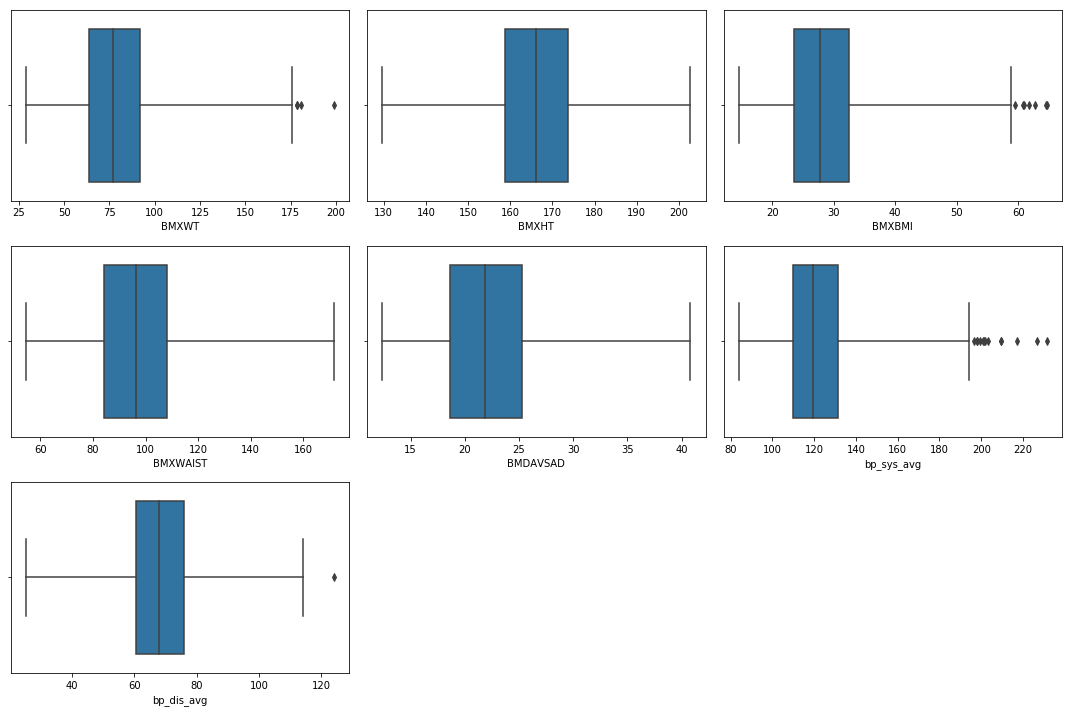

In [90]:
data = nhanes_full_df[body_continuous]

plt.figure(figsize = (15,10)) 
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

In [ ]:
lab_continuous = ['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXMOPCT', 
                  'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 
                  'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBXRBCSI', 
                  'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 
                  'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 
                  'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 
                  'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
                  'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 
                  'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 
                  'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                  'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 
                  'LBXHSCRP']

In [ ]:
data = nhanes_full_df[lab_continuous]

plt.figure(figsize = (15,60)) 
for i, column in enumerate(data.columns):
    plt.subplot(17, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3, linewidth=5)

plt.tight_layout()
plt.show()

In [ ]:
diet_continuous = ['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                   'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                   'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                   'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                   'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                   'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                   'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'folate_avg', 'folic_acid_avg', 
                   'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                   'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 
                   'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                   'mag_avg', 'fe_avg', 'zn_avg', 
                   'cu_avg', 'na_avg', 'k_avg', 
                   'se_avg', 'tot_mois_avg', 'tot_h20_avg']

In [ ]:
data = nhanes_full_df[diet_continuous]

plt.figure(figsize = (15,60)) 
for i, column in enumerate(data.columns):
    plt.subplot(14, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3, linewidth=5)

plt.tight_layout()
plt.show()

In [ ]:
supplement_continuous = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                         'supp_b6_avg', 'supp_b12_avg', 'supp_folate_avg', 
                         'supp_folfde_avg', 'supp_c_avg', 'supp_d_avg', 
                         'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
                         'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
                         'supp_potk_avg', 'supp_se_avg']

In [ ]:
data = nhanes_full_df[supplement_continuous]

plt.figure(figsize = (15,10)) 
for i, column in enumerate(data.columns):
    plt.subplot(6, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3, linewidth=5)

plt.tight_layout()
plt.show()

In [ ]:
total_intake_continuous = ['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                           'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                           'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                           'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                           'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                           'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                           'tot_choline_avg', 'tot_vit_k_avg', 'tot_phos_avg',
                           'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
                           'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
                           'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                           'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
                           'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
                           'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']

In [ ]:
data = nhanes_full_df[total_intake_continuous]

plt.figure(figsize = (15,60)) 
for i, column in enumerate(data.columns):
    plt.subplot(13, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3, linewidth=5)

plt.tight_layout()
plt.show()

#### z-score, iqr to determine outliers

In [91]:
continuous_data = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
 'bp_sys_avg', 'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT',
 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO',
 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI',
 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI',
 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI',
 'LBXSBU', 'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
 'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA',
 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
 'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
 'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
 'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
 'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
 'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
 'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg',
 'folate_avg', 'folic_acid_avg', 'food_fol_avg',
 'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg',
 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg',
 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg', 
 'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
 'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
 'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
 'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
 'supp_potk_avg', 'supp_se_avg', 'tot_b1_avg', 'tot_b2_avg',
 'tot_niac_avg', 'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
 'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 'tot_k_avg',
 'tot_se_avg', 'tot_folate_avg']

In [92]:
#zscore
z_outliers = []

for i in continuous_data:
    threshold = 4 
    z_scores = zscore(nhanes_full_df[i])
    #for threshold = 4:
    z_outliers = (i)
    print(i)  
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))
    

BMXWT
The score threshold is: 4
Number of outliers is: 10
BMXHT
The score threshold is: 4
Number of outliers is: 0
BMXBMI
The score threshold is: 4
Number of outliers is: 14
BMXWAIST
The score threshold is: 4
Number of outliers is: 1
BMDAVSAD
The score threshold is: 4
Number of outliers is: 0
bp_sys_avg
The score threshold is: 4
Number of outliers is: 14
bp_dis_avg
The score threshold is: 4
Number of outliers is: 1
LBXWBCSI
The score threshold is: 4
Number of outliers is: 7
LBXLYPCT
The score threshold is: 4
Number of outliers is: 5
LBXMOPCT
The score threshold is: 4
Number of outliers is: 6
LBXNEPCT
The score threshold is: 4
Number of outliers is: 0
LBXEOPCT
The score threshold is: 4
Number of outliers is: 47
LBXBAPCT
The score threshold is: 4
Number of outliers is: 21
LBDLYMNO
The score threshold is: 4
Number of outliers is: 3
LBDMONO
The score threshold is: 4
Number of outliers is: 18
LBDNENO
The score threshold is: 4
Number of outliers is: 18
LBDEONO
The score threshold is: 4
Numbe

In [93]:
#iqr
for i in continuous_data:
    threshold = 3 
    q75, q25 = np.percentile(nhanes_full_df[i], [75 ,25])
    iqr = q75 - q25

    for threshold in np.arange(3,5,1):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print(i)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((nhanes_full_df[i] > max_val) 
                      | (nhanes_full_df[i] < min_val))[0]))
        ))

BMXWT
The score threshold is: 3
Number of outliers is: 4
BMXWT
The score threshold is: 4
Number of outliers is: 0
BMXHT
The score threshold is: 3
Number of outliers is: 0
BMXHT
The score threshold is: 4
Number of outliers is: 0
BMXBMI
The score threshold is: 3
Number of outliers is: 7
BMXBMI
The score threshold is: 4
Number of outliers is: 0
BMXWAIST
The score threshold is: 3
Number of outliers is: 0
BMXWAIST
The score threshold is: 4
Number of outliers is: 0
BMDAVSAD
The score threshold is: 3
Number of outliers is: 0
BMDAVSAD
The score threshold is: 4
Number of outliers is: 0
bp_sys_avg
The score threshold is: 3
Number of outliers is: 13
bp_sys_avg
The score threshold is: 4
Number of outliers is: 3
bp_dis_avg
The score threshold is: 3
Number of outliers is: 1
bp_dis_avg
The score threshold is: 4
Number of outliers is: 0
LBXWBCSI
The score threshold is: 3
Number of outliers is: 12
LBXWBCSI
The score threshold is: 4
Number of outliers is: 4
LBXLYPCT
The score threshold is: 3
Number of o

Number of outliers is: 11
vit_b6_avg
The score threshold is: 3
Number of outliers is: 58
vit_b6_avg
The score threshold is: 4
Number of outliers is: 38
folate_avg
The score threshold is: 3
Number of outliers is: 21
folate_avg
The score threshold is: 4
Number of outliers is: 9
folic_acid_avg
The score threshold is: 3
Number of outliers is: 68
folic_acid_avg
The score threshold is: 4
Number of outliers is: 33
food_fol_avg
The score threshold is: 3
Number of outliers is: 23
food_fol_avg
The score threshold is: 4
Number of outliers is: 6
folate_dfe_avg
The score threshold is: 3
Number of outliers is: 30
folate_dfe_avg
The score threshold is: 4
Number of outliers is: 14
tot_choline_avg
The score threshold is: 3
Number of outliers is: 8
tot_choline_avg
The score threshold is: 4
Number of outliers is: 5
vit_b12_avg
The score threshold is: 3
Number of outliers is: 77
vit_b12_avg
The score threshold is: 4
Number of outliers is: 45
vit_c_avg
The score threshold is: 3
Number of outliers is: 37
vi

#### will not use
irq4_outlier = ['bp_sys_avg', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 
                'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 
                'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXMCVSI', 'LBXMCHSI', 
                'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAPSI', 'LBXSASSI',
                'LBXSATSI', 'LBXSBU', 'LBXSCA', 'LBXSCH', 'LBXSCK', 
                'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSLDSI', 
                'LBXSNASI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
                'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg', 'tot_sugar_avg',
                'tot_fiber_avg', 'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg',
                'tot_pfat_avg', 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg', 
                'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg', 'tot_beta_cry_avg', 
                'tot_lyco_avg', 'tot_lutein_avg', 'vit_b1_avg', 'vit_b2_avg',
                'niac_avg', 'vit_b6_avg', 'folate_avg', 'folic_acid_avg',
                'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 
                'calc_avg', 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 
                'cu_avg', 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 
                'tot_h20_avg', 'tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg', 'tot_zn_avg', 
                'tot_cu_avg', 'tot_na_avg', 'tot_k_avg', 'tot_se_avg', 
                'tot_folate_avg']

#### comment: fewer outlier columns with iqr but much higher numbers; will use z-score outliers
will also remove total supplement columns and use only food totals and intake totals (which includes supplement totals); have column to determine whether or not individual took supplement

In [94]:
z_outliers = ['BMXWT', 'BMXBMI', 'BMXWAIST', 'bp_sys_avg',
              'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT',
              'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO',
              'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXHCT',
              'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAPSI', 
              'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSCA', 
              'LBXSCH', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 
              'LBXSGL', 'LBXSIR', 'LBXSKSI', 'LBXSLDSI', 
              'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBDSPHSI', 
              'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA', 'LBDHDD',
              'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 'tot_kcal_avg', 
              'tot_pro_avg', 'tot_carb_avg', 
              'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
              'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg', 
              'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg', 
              'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg', 
              'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg', 
              'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg', 
              'folate_avg', 'folic_acid_avg', 'food_fol_avg',
              'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg', 
              'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 
              'calc_avg', 'tot_phos_avg', 'mag_avg', 'fe_avg',
              'zn_avg', 'cu_avg', 'na_avg', 'k_avg', 'se_avg',
              'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
              'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
              'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
              'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg', 
              'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
              'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']

In [95]:
for outlier in z_outliers:
    nhanes_full_df['log_'+ outlier] = np.log(nhanes_full_df[outlier]+1)

In [ ]:
nhanes_full_df.head()

In [96]:
log_continuous = ['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI',
                  'log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
                  'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO',
                  'log_LBDNENO', 'log_LBDEONO', 'log_LBXRBCSI',
                  'log_LBXHCT','log_LBXRDW', 'log_LBXPLTSI',
                  'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
                  'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA',
                  'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI',
                  'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR',
                  'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
                  'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI',
                  'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
                  'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC',
                  'log_LBXHSCRP', 'log_DR1TCAFF', 'log_tot_kcal_avg',
                  'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_sugar_avg',
                  'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
                  'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
                  'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
                  'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
                  'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
                  'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
                  'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
                  'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
                  'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
                  'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
                  'log_fe_avg', 'log_zn_avg', 'log_cu_avg',
                  'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_tot_mois_avg',
                  'log_tot_h20_avg', 'log_tot_b1_avg', 'log_tot_b2_avg',
                  'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
                  'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
                  'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
                  'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
                  'log_tot_se_avg', 'log_tot_folate_avg']

In [ ]:
for i in log_continuous:
    threshold = 4 
    z_scores = zscore(nhanes_full_df[i])
    #for threshold = 4:
    z_outliers = np.where(z_scores > threshold)
    print(i)  
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))
    

#### outliers have been significantly reduced, but not eliminated
will not attempt to completely remove outliers secondary to need to consider exteme values in dietary intake of population; these extreme values may be key in determining the classification of the target value

**remaining_ outliers** =  'log_bp_sys_avg', 'log_LBXWBCSI', 'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 'log_LBXRBCSI', 'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI',                        'log_LBXSAPSI', 'log_LBXSASSI', 'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA', 'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 'log_LBXSGL', 'log_LBXSKSI', 'log_LBXSLDSI',                        'log_LBXSNASI', 'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI', 'log_LBXSTP', 'log_LBXSTR', 'log_LBXSUA', 'log_LBXTC'

#### comment:  will not use supplement totals (contain 0.0); will only use totals 
'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg', 
'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 'supp_c_avg', 
'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg', 'supp_potk_avg', 
'supp_se_avg',

# data exploration and visualization

## summary statistics

In [ ]:
nhanes_full_df.describe()

In [97]:
continuous_data_df = nhanes_full_df[['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
 'bp_sys_avg', 'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT',
 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO',
 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI',
 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI',
 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI',
 'LBXSBU', 'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
 'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA',
 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
 'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
 'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
 'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
 'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
 'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
 'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg',
 'folate_avg', 'folic_acid_avg', 'food_fol_avg',
 'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg',
 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg',
 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg', 
 'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
 'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
 'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
 'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
 'supp_potk_avg', 'supp_se_avg', 'tot_b1_avg', 'tot_b2_avg',
 'tot_niac_avg', 'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
 'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 'tot_k_avg',
 'tot_se_avg', 'tot_folate_avg', 'heart_dz']]

In [ ]:
continuous_data_df.groupby('heart_dz').describe()

In [98]:
categorical_data_df = nhanes_full_df[['MCQ160B', 'MCQ160C', 'MCQ160D',
                                      'MCQ160E', 'MCQ300A', 'MCQ365C',
                                      'MCQ365D', 'MCQ370A', 'MCQ370C',
                                      'MCQ370D', 'BPQ020', 'BPQ030',
                                      'BPQ040A', 'BPQ050A', 'BPQ080',
                                      'BPQ060', 'BPQ070', 'BPQ090D',
                                      'BPQ100D', 'DBQ095Z', 'DBD100',
                                      'DRQSPREP', 'DR1STY', 'DRQSDIET',
                                      'DR1TCAFF', 'DRD360', 'DR2STY', 
                                      'DS1DS', 'DS1AN', 'DS2DS', 
                                      'DS2AN', 'heart_dz']]


In [ ]:
categorical_data._df.groupby('heart_dz').describe()

#### First look:
On average, those with indicator for heart disease are older, weigh more, have higher BMI, larger waist circumference, larger sagittal abdominal diameter, higher systolic blood pressure, higher cbc markers for LBXWBCSI, LBXMOPCT, LBXNEPCT, LBXEOPCT, LBXBAPCT, LBDLYMNO, LBDMONO, LBDNENO, LBDEONO, LBXMCVSI, LBXMCHSI, LBXRDW, LBXMPSI, LBXSASSI, LBXSBU, LBXSC3SI, LBXSCR, LBXSGL, LBXSKSI, LBXSLDSI, LBXSOSSI, LBXSTB, LBXSTR, LBXSUA, LBXHSCRP, 

use more salt, drink more caffeine, consume more cholesterol, retinol, vitamin A, B2, choline, B12, C, D, copper, potassium, and more supplements 

lower cbc markers for LBXLYPCT, LBXRBCSI, LBXHGB, LBXHCT, LBXPLTSI, LBXSAL, LBXSAPSI, LBXSATSI, LBXSCA, LBXSCH, LBXSCK, LBXSCLSI, LBXSIR, LBXSNASI, LBXSPH, LBDSPHSI, LBXSTP, LBDHDD, LBXTC, eat less fish, 
consume less calories, protein, carbohydrates, sugar, fiber, fat, vitamin E, lycopene, lutein, vitamin B1, B2, niacin, B6, folate, folic acid, food folate, folatae DFE, vitamin K, calcium, phosphorus, magnesium, iron, zinc, sodium, selenium, than those without heart disease. 

## visualization

### categorical values

In [ ]:
# original columns, prior to encoding
categorical_values = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 
                      'MCQ300A', 'MCQ365C', 'MCQ365D', 'MCQ370A', 
                      'MCQ370C', 'MCQ370D', 'BPQ020', 'BPQ030',
                      'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ060', 
                      'BPQ070', 'BPQ090D', 'BPQ100D', 'DBQ095Z', 
                      'DBD100', 'DRQSPREP', 'DR1STY', 'DRQSDIET',
                      'DR1TCAFF', 'DRD360', 'DR2STY', 'DS1DS', 
                      'DS1AN', 'DS2DS', 'DS2AN', 'heart_dz']

In [ ]:
plt.figure(figsize=(15,50))

for index, column in enumerate(categorical_values):
    plt.subplot(8,4,index+1)
    plt.bar(nhanes_full_df.groupby(column)['heart_dz'].mean().index, nhanes_full_df.groupby(column)['heart_dz'].mean(),
           color=('grey','red'))
    plt.title('Heart disease related to. {}'.format(column))
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

### continuous variables

In [ ]:
continuous_values = ['RIDAGEYR','BMXWT', 'BMXHT', 'BMXBMI',
                     'BMXWAIST', 'BMDAVSAD','bp_sys_avg', 'bp_dis_avg', 
                     'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 
                     'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 
                     'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXHGB', 
                     'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXRDW', 
                     'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 'LBXSAPSI', 
                     'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSC3SI', 
                     'LBXSCA', 'LBXSCH', 'LBXSCK', 'LBXSCLSI', 
                     'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
                     'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
                     'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 
                     'LBXSUA', 'LBDHDD', 'LBXTC', 'LBXHSCRP', 
                     'DR1TCAFF', 'tot_kcal_avg', 'tot_pro_avg', 
                     'tot_carb_avg', 'tot_sugar_avg', 'tot_fiber_avg', 
                     'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg', 
                     'tot_pfat_avg', 'tot_fchol_avg', 'tot_vit_e_avg', 
                     'tot_retinol_avg', 'tot_vit_a_avg', 'tot_alpha_c_avg', 
                     'tot_beta_c_avg', 'tot_beta_cry_avg', 'tot_lyco_avg', 
                     'tot_lutein_avg', 'vit_b1_avg', 'vit_b2_avg', 
                     'niac_avg', 'vit_b6_avg', 'folate_avg', 
                     'folic_acid_avg', 'food_fol_avg', 'folate_dfe_avg', 
                     'tot_choline_avg', 'vit_b12_avg', 'vit_c_avg', 
                     'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
                     'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 
                     'cu_avg', 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg',
                     'tot_h20_avg', 'supp_b1_avg', 'supp_b2_avg', 
                     'supp_nia_avg', 'supp_b6_avg', 'supp_b12_avg', 
                     'supp_folate_avg', 'supp_folfde_avg', 'supp_c_avg', 
                     'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
                     'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 
                     'supp_na_avg', 'supp_potk_avg', 'supp_se_avg', 
                     'tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                     'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
                     'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 
                     'tot_fe_avg', 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg',
                     'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']


In [ ]:
len(continuous_values)

In [ ]:
log_values = ['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI',
                  'log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
                  'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO',
                  'log_LBDNENO', 'log_LBDEONO', 'log_LBXRBCSI',
                  'log_LBXHCT','log_LBXRDW', 'log_LBXPLTSI',
                  'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
                  'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA',
                  'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI',
                  'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR',
                  'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
                  'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI',
                  'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
                  'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC',
                  'log_LBXHSCRP', 'log_DR1TCAFF', 'log_tot_kcal_avg',
                  'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_sugar_avg',
                  'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
                  'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
                  'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
                  'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
                  'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
                  'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
                  'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
                  'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
                  'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
                  'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
                  'log_fe_avg', 'log_zn_avg', 'log_cu_avg',
                  'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_tot_mois_avg',
                  'log_tot_h20_avg', 'log_tot_b1_avg', 'log_tot_b2_avg',
                  'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
                  'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
                  'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
                  'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
                  'log_tot_se_avg', 'log_tot_folate_avg']

In [ ]:
len(log_values)

### break up continuous values into groups for easier viewing

In [ ]:
body_continuous = nhanes_full_df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
                   'bp_sys_avg', 'bp_dis_avg']]

In [ ]:
body_continuous.hist(grid=False, alpha=0.5, figsize=(10, 10))
plt.tight_layout()

#### comment: would anticipte these values to be normal distribution as they are body measurements

In [ ]:
body_log_continuous = nhanes_full_df[['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg']]

In [ ]:
body_log_continuous.hist(grid=False, alpha=0.5, figsize=(10, 10))
plt.tight_layout()

In [ ]:
lab_continuous = nhanes_full_df[['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXMOPCT', 
                  'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 
                  'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBXRBCSI', 
                  'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 
                  'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 
                  'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 
                  'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
                  'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 
                  'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 
                  'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                  'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 
                  'LBXHSCRP']]

In [ ]:
lab_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

In [ ]:
lab_log_continuous = nhanes_full_df[
    ['log_LBXWBCSI','log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
     'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 
     'log_LBDEONO', 'log_LBXRBCSI', 'log_LBXHCT','log_LBXRDW', 
     'log_LBXPLTSI', 'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
     'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA', 'log_LBXSCH', 
     'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 'log_LBXSGL', 
     'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
     'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI', 'log_LBXSTB', 
     'log_LBXSTP', 'log_LBXSTR', 'log_LBXSUA', 'log_LBDHDD', 
     'log_LBXTC', 'log_LBXHSCRP']]

In [ ]:
lab_log_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

#### comment: distribution of lab values is much more normal after log-transformation

In [ ]:
diet_continuous = nhanes_full_df[['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                   'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                   'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                   'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                   'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                   'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                   'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'folate_avg', 'folic_acid_avg', 
                   'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                   'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 
                   'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                   'mag_avg', 'fe_avg', 'zn_avg', 
                   'cu_avg', 'na_avg', 'k_avg', 
                   'se_avg', 'tot_mois_avg', 'tot_h20_avg']]

In [ ]:
diet_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

In [ ]:
diet_log_continuous = nhanes_full_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_sugar_avg', 'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
     'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
     'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
     'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
     'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
     'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
     'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
     'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
     'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
     'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
     'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_na_avg', 
     'log_k_avg', 'log_se_avg', 'log_tot_mois_avg', 'log_tot_h20_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 'log_tot_d_avg', 
     'log_tot_calc_avg', 'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
     'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg', 'log_tot_se_avg', 
     'log_tot_folate_avg']]

In [ ]:
diet_log_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

In [ ]:
supplement_continuous = nhanes_full_df[['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                         'supp_b6_avg', 'supp_b12_avg', 'supp_folate_avg', 
                         'supp_folfde_avg', 'supp_c_avg', 'supp_d_avg', 
                         'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
                         'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
                         'supp_potk_avg', 'supp_se_avg']]

In [ ]:
supplement_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

In [ ]:
total_intake_continuous = nhanes_full_df[['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                           'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                           'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                           'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                           'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                           'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                           'tot_choline_avg', 'tot_vit_k_avg', 'tot_phos_avg',
                           'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
                           'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
                           'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                           'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
                           'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
                           'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']]

In [ ]:
total_intake_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

In [ ]:
total_intake_log_continuous = nhanes_full_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg', 
     'log_tot_carb_avg', 'log_tot_sugar_avg', 'log_tot_fiber_avg', 
     'log_tot_fat_avg', 'log_tot_sfat_avg', 'log_tot_mfat_avg', 
     'log_tot_pfat_avg', 'log_tot_fchol_avg', 'log_tot_vit_e_avg', 
     'log_tot_retinol_avg', 'log_tot_vit_a_avg', 'log_tot_alpha_c_avg', 
     'log_tot_beta_c_avg', 'log_tot_beta_cry_avg', 'log_tot_lyco_avg', 
     'log_tot_lutein_avg', 'log_tot_choline_avg', 'log_tot_vit_k_avg',
     'log_tot_phos_avg', 'log_tot_mois_avg', 'log_tot_h20_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
     'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
     'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
     'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
     'log_tot_se_avg', 'log_tot_folate_avg']]

In [ ]:
total_intake_log_continuous.hist(grid=False, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

## convert questions to dummy variables for modeling

1 = yes; 2 = no; 7 = refused; 9 = don’t know
MCQ160B		Ever told had congestive heart failure
MCQ160C    Ever told you had coronary heart disease
MCQ160D    Ever told you had angina/angina pectoris
MCQ160E    Ever told you had heart attack

MCQ300A    Close relative had heart attack?
MCQ365C    Doctor told you to reduce salt in diet
MCQ365D    Doctor told you to reduce fat/calories
MCQ370A    Are you now controlling or losing weight
MCQ370C    Are you now reducing salt in diet
MCQ370D    Are you now reducing fat in diet


1 = yes; 2 = no; 7 = refused; 9 = don’t know
BPQ020     Ever told you had high blood pressure
BPQ030     Told had high blood pressure - 2+ times
BPQ040A    Taking prescription for hypertension
**BPQ050A    Now taking prescribed medicine for HBP**
BPQ080     Doctor told you - high cholesterol level
BPQ060     Ever had blood cholesterol checked
BPQ070     4711 non-null float64
BPQ090D    Told to take prescription for cholesterol
BPQ100D    1524 non-null float64

DBQ095Z     Type of table salt used
1=Ordinary salt; 2=lite salt; 3 = salt sub; 4 = no added salt; 
DBD100      How often add salt to food at table
1=rarely; 2=occasionally; 3=very often; 7=refused; 9=don’t know
DRQSPREP    Salt used in preparation?
1=never; 2=rarely; 3=occasionally; 4=v often; 9=don’t know
DR1STY      Salt used at table yesterday?
1 = yes; 2 = no; 9 = don’t know
DRQSDIET    On special diet?
1 = yes; 2 = no; 9 = don’t know

1 = yes; 2 = no; 7 = refused; 9 = don’t know
DS1DS       Any Dietary Supplements Taken?
DS1AN       Any Antacids Taken?

In [99]:
question_list = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ300A',
             'MCQ365C', 'MCQ365D', 'MCQ370A', 'MCQ370C', 'MCQ370D',  
             'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ080', 
             'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'DBD100', 
             'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR2STY', 'DS1DS', 
             'DS1AN', 'DS2DS', 'DS2AN'] 

In [100]:
for column in question_list:
    nhanes_full_df = pd.concat([nhanes_full_df, pd.get_dummies(nhanes_full_df[column], prefix=column, drop_first=True)], axis=1)


In [ ]:
nhanes_full_df.head()

# unsupervised learning: 
## clustering
attempt to cluster lab data and body measurement data to act as variable in supervised model

#### creating dfs with variables for clustering
3 versions

In [101]:
#contains both mec & lab data + 'WTMEC2YR' weight
nhanes_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'WTMEC2YR', 'INDFMPIR', 
     'log_BMXWT', 'BMXHT', 'log_BMXBMI', 'log_BMXWAIST', 'BMDAVSAD',
     'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI', 'log_LBXLYPCT',
     'log_LBXMOPCT', 'LBXNEPCT', 'log_LBXEOPCT', 'log_LBXBAPCT', 
     'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 'log_LBDEONO',
     'log_LBXRBCSI', 'LBXHGB', 'log_LBXHCT', 'LBXMCVSI', 'LBXMCHSI',
     'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI', 'LBXSAL', 'log_LBXSAPSI',
     'log_LBXSASSI', 'log_LBXSATSI', 'log_LBXSBU', 'LBXSC3SI', 'log_LBXSCA',
     'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 'log_LBXSGL',
     'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI', 'log_LBXSOSSI',
     'log_LBXSPH', 'log_LBDSPHSI', 'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
     'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC', 'log_LBXHSCRP',]]

In [ ]:
nhanes_cluster_df.info()

In [ ]:
nhanes_cluster_df.describe()

In [102]:
# mec cluster with weights
nhanes_mec_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'WTMEC2YR', 
     'log_BMXWT', 'BMXHT', 'log_BMXBMI', 
     'log_BMXWAIST', 'BMDAVSAD', 'log_bp_sys_avg', 
     'log_bp_dis_avg']]

In [ ]:
nhanes_mec_cluster_df.info()

In [ ]:
nhanes_mec_cluster_df.describe()

In [103]:
# lab cluster with weights
nhanes_lab_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'log_LBXWBCSI', 'log_LBXLYPCT',
     'log_LBXMOPCT', 'LBXNEPCT', 'log_LBXEOPCT', 'log_LBXBAPCT', 
     'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 'log_LBDEONO',
     'log_LBXRBCSI', 'LBXHGB', 'log_LBXHCT', 'LBXMCVSI', 'LBXMCHSI',
     'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI', 'LBXSAL', 
     'log_LBXSAPSI', 'log_LBXSASSI', 'log_LBXSATSI', 'log_LBXSBU', 
     'LBXSC3SI', 'log_LBXSCA', 'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI', 
     'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 
     'log_LBXSNASI', 'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI', 
     'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR','log_LBXSUA', 
     'log_LBDHDD', 'log_LBXTC', 'log_LBXHSCRP', 'WTMEC2YR', ]]

In [ ]:
nhanes_lab_cluster_df.info()

In [ ]:
nhanes_lab_cluster_df.describe()

## normalize data

In [104]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

#### group 1: full dataset (body measurements + lab data)

In [105]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_cluster_df
X_std = scaler.fit_transform(X)

In [ ]:
X_std

#### group 2: body measurements

In [106]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_mec_cluster_df
X_mec = scaler.fit_transform(X)

In [ ]:
X_mec

#### group 3: lab data

In [107]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_lab_cluster_df
X_lab = scaler.fit_transform(X)

In [ ]:
X_lab

## kmeans clusters

### group 1: X_std (body measurements & lab data)

#### X_std clustering, reference

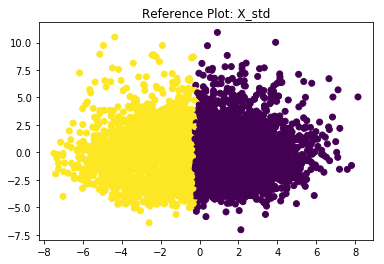

In [108]:
# reduce data to two components for plotting
X_pca = PCA(2).fit_transform(X_std)

# calculate predicted values
y_std = KMeans(n_clusters=2, random_state=42).fit_predict(X_std)
y_pred_pca = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
plt.title('Reference Plot: X_std')
plt.show()

#### X_std, fit kmeans

In [ ]:
# find k
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# find k
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [109]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

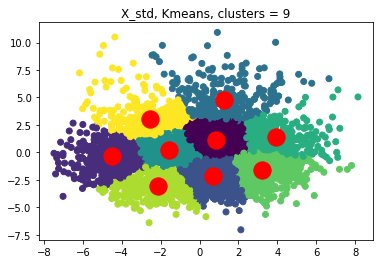

In [110]:
# reduce data to two components for plotting
X_pca = PCA(2).fit_transform(X_std)

# calculate predicted values
kmeans9_std = KMeans(n_clusters=9, init='k-means++', random_state=42).fit_predict(X_std)
#fit to graph
kmeans9_pca = KMeans(n_clusters=9, init='k-means++', random_state=42)
y_9pred_pca = kmeans9_pca.fit_predict(X_pca)
# plot the solution with centroids

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_9pred_pca)
plt.scatter(kmeans9_pca.cluster_centers_[:, 0], 
            kmeans9_pca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_std, Kmeans, clusters = 9')
plt.show()

In [111]:
# calculate silhouette_score
from sklearn.metrics import silhouette_score
silhouette_kmeans9 = silhouette_score(X_std, kmeans9_std)

print('X_std, Kmeans, clusters = 9')
print(silhouette_kmeans9)

X_std, Kmeans, clusters = 9
0.04732530547641415


### group 2: X_mec (body measurements)

#### X_mec clustering, reference

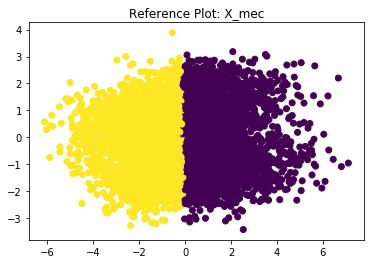

In [112]:
# reduce data to two components for plotting
X_mec_pca = PCA(2).fit_transform(X_mec)

# calculate predicted values
y_mec = KMeans(n_clusters=2, random_state=42).fit_predict(X_mec)
y_pred_mpca = KMeans(n_clusters=2, random_state=42).fit_predict(X_mec_pca)

# plot the solution

plt.scatter(X_mec_pca[:, 0], X_mec_pca[:, 1], c=y_pred_mpca)
plt.title('Reference Plot: X_mec')
plt.show()

#### X_mec, fit kmeans

In [113]:
# find k
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(X_mec)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

NameError: name 'KElbowVisualizer' is not defined

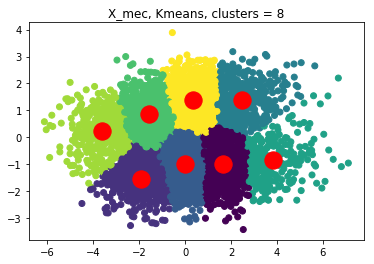

In [114]:
#X_mec, using 8 clusters
# reduce data to two components for plotting
X_mec_pca = PCA(2).fit_transform(X_mec)

# calculate predicted values
kmeans8_mec = KMeans(n_clusters=8, init='k-means++', random_state=42).fit_predict(X_mec)
#fit to graph
kmeans8_mec_pca = KMeans(n_clusters=8, init='k-means++', random_state=42)
y_8pred_mec_pca = kmeans8_mec_pca.fit_predict(X_mec_pca)
# plot the solution with centroids

plt.scatter(X_mec_pca[:, 0], X_mec_pca[:, 1], c=y_8pred_mec_pca)
plt.scatter(kmeans8_mec_pca.cluster_centers_[:, 0], 
            kmeans8_mec_pca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_mec, Kmeans, clusters = 8')
plt.show()

In [115]:
# calculate silhouette_score
silhouette_kmeans8_mec = silhouette_score(X_mec, kmeans8_mec)

print('X_std, Kmeans, clusters = 8')
print(silhouette_kmeans8_mec)

X_std, Kmeans, clusters = 8
0.15117095128439503


### group 3: X_lab (lab data)

#### X_lab clustering, reference

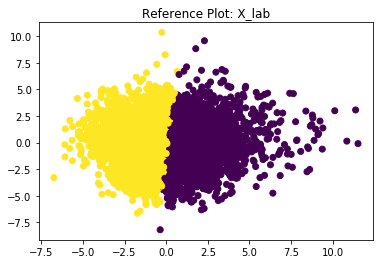

In [116]:
# reduce data to two components for plotting
X_lab_pca = PCA(2).fit_transform(X_lab)

# calculate predicted values
y_lab = KMeans(n_clusters=2, random_state=42).fit_predict(X_lab)
y_pred_lpca = KMeans(n_clusters=2, random_state=42).fit_predict(X_lab_pca)

# plot the solution

plt.scatter(X_lab_pca[:, 0], X_lab_pca[:, 1], c=y_pred_lpca)
plt.title('Reference Plot: X_lab')
plt.show()

#### X_lab, fit kmeans

In [ ]:
# find k
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(X_lab)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

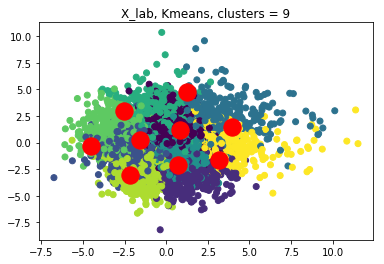

In [117]:
# reduce data to two components for plotting
X_lab_pca = PCA(2).fit_transform(X_lab)

# calculate predicted values
kmeans9_lab = KMeans(n_clusters=9, init='k-means++', random_state=42).fit_predict(X_lab)
#fit to graph
kmeans9_lpca = KMeans(n_clusters=9, init='k-means++', random_state=42)
y_9pred_lpca = kmeans9_lpca.fit_predict(X_pca)
# plot the solution with centroids

plt.scatter(X_lab_pca[:, 0], X_lab_pca[:, 1], c=y_9pred_pca)
plt.scatter(kmeans9_lpca.cluster_centers_[:, 0], 
            kmeans9_lpca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_lab, Kmeans, clusters = 9')
plt.show()

In [ ]:
# calculate silhouette_score
from sklearn.metrics import silhouette_score
silhouette_kmeans9_lab = silhouette_score(X_lab, kmeans9_lab)

print('X_lab, Kmeans, clusters = N')
print(silhouette_kmeans9_lab)

#### kmeans cluster silhoueette scores

In [ ]:
print('Silhouette score kmeans body measurements & labs: {}'.format(silhouette_kmeans9))
print('Silhouette score kmeans body measurements: {}'.format(silhouette_kmeans8_mec))
print('Silhouette score kmeans lab measurements: {}'.format (silhouette_kmeans9_lab))

## mini batch kmeans

### group 1: X_std (body measurements & lab data)

#### mini batch kmeans with 'k-means++' centroids

In [118]:
#X_std
#model
minibatch9_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=9,
    batch_size=200,
    random_state=42)

# fit & calculate predicted values
mini9_std = minibatch9_kmeans.fit_predict(X_std)

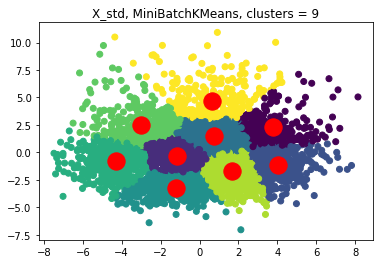

In [119]:
# reduce data to two components for plotting
X_mini_pca = PCA(2).fit_transform(X_std)

# predicted values, as above 
# fit to graph
kmini9_pca = MiniBatchKMeans(
    init='k-means++',
    n_clusters=9,
    batch_size=200,
    random_state=42)
pred_kmini9_pca = kmini9_pca.fit_predict(X_mini_pca)

# plot the solution with centroids
sns.set_palette('bright')
plt.scatter(X_mini_pca[:, 0], X_mini_pca[:, 1], c=pred_kmini9_pca)
plt.scatter(kmini9_pca.cluster_centers_[:, 0], 
            kmini9_pca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_std, MiniBatchKMeans, clusters = 9')
plt.show()

In [ ]:
# calculate silhouette_score
silhouette_minibatch9_std = silhouette_score(X_std, mini9_std)
print(silhouette_minibatch9_std)

### group 2: X_mec (body measurements )

In [120]:
# X_mec
#model
minibatch8_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=8,
    batch_size=200,
    random_state=42)

# fit & calculate predicted values
mini8_mec = minibatch8_kmeans.fit_predict(X_mec)



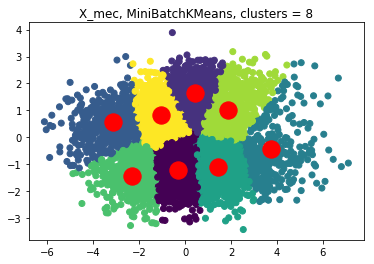

In [121]:
# reduce data to two components for plotting
X_mini_mec_pca = PCA(2).fit_transform(X_mec)

# predicted values, as above
# fit to graph
mini8_mec_pca = MiniBatchKMeans(
    init='k-means++',
    n_clusters=8,
    batch_size=200,
    random_state=42)
pred_kmini8_mec_pca = mini8_mec_pca.fit_predict(X_mini_mec_pca)

# plot the solution with centroids
sns.set_palette('bright')
plt.scatter(X_mini_mec_pca[:, 0], X_mini_mec_pca[:, 1], c=pred_kmini8_mec_pca)
plt.scatter(mini8_mec_pca.cluster_centers_[:, 0], 
            mini8_mec_pca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_mec, MiniBatchKMeans, clusters = 8')
plt.show()

In [ ]:
# calculate silhouette_score
silhouette_minibatch8_mec = silhouette_score(X_mec, mini8_mec)
print(silhouette_minibatch8_mec)

### group 3: X_lab (lab data)

In [122]:
# X_lab
#model
minibatch9_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=9,
    batch_size=200,
    random_state=42)

# fit & calculate predicted values
mini9_lab = minibatch9_kmeans.fit_predict(X_lab)



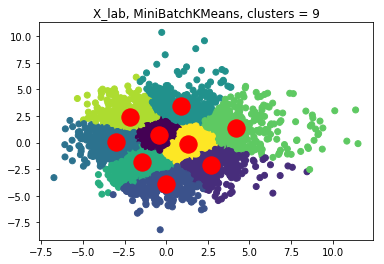

In [123]:
# reduce data to two components for plotting
X_mini_lab_pca = PCA(2).fit_transform(X_lab)

# predicted values, as above
# fit to graph
mini9_lab_pca = MiniBatchKMeans(
    init='k-means++',
    n_clusters=9,
    batch_size=200,
    random_state=42)
pred_kmini9_lab_pca = mini9_lab_pca.fit_predict(X_mini_lab_pca)

# plot the solution with centroids

plt.scatter(X_mini_lab_pca[:, 0], X_mini_lab_pca[:, 1], c=pred_kmini9_lab_pca)
plt.scatter(mini9_lab_pca.cluster_centers_[:, 0], 
            mini9_lab_pca.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_lab, MiniBatchKMeans, clusters = 9')
plt.show()

In [ ]:
# calculate silhouette_score
silhouette_minibatch9_lab = silhouette_score(X_lab, mini9_lab)
print(silhouette_minibatch9_lab)

In [ ]:
print('Silhouette score kmeans body measurements & labs: {}'.format(silhouette_kmeans9))
print('Silhouette score kmeans body measurements: {}'.format(silhouette_kmeans8_mec))
print('Silhouette score kmeans lab measurements: {}'.format (silhouette_kmeans9_lab))
print('Silhouette score minibatch body measurements & labs: {}'.format(silhouette_minibatch9_std))
print('Silhouette score minibatch body measurements: {}'.format(silhouette_minibatch8_mec))
print('Silhouette score minibatch lab measurements: {}'.format (silhouette_minibatch9_lab))

## mean shift

### group 1: X_std (body measurements & lab data)

In [124]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# set the bandwidth automatically; function derives a bandwidth
# number based on an inspection of the distances among points 
# in the data.
bandwidth = estimate_bandwidth(X_std, quantile=0.2, n_samples=500)

# declare and fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_std = ms.fit_predict(X_std)

# extract cluster assignments for each data point
labels = ms.labels_

# coordinates of the cluster centers
cluster_centers = ms.cluster_centers_

# count our clusters
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


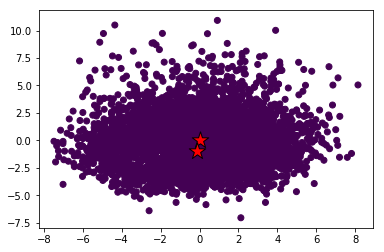

In [125]:
# reduce data to two components for plotting
X_ms_std_pca = PCA(2).fit_transform(X_std)


#fit to graph
ms_std_pca = MeanShift(bandwidth=bandwidth, bin_seeding=True)
pred_ms_std_pca = ms_std_pca.fit_predict(X_ms_std_pca)

# plot the solution 

plt.scatter(X_ms_std_pca[:, 0], X_ms_std_pca[:, 1], c=pred_ms_std_pca)

# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids')


plt.show()

In [ ]:
# calculate silhouette_score
silhoueette_ms_std = silhouette_score(X_std, ms.labels_)
print(silhoueette_ms_std)

### group 2: X_mec (body measurements)

In [126]:
bandwidth = estimate_bandwidth(X_mec, quantile=0.2, n_samples=500)

# declare and fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_mec = ms.fit_predict(X_mec)

# extract cluster assignments for each data point
mec_labels = ms.labels_

# coordinates of the cluster centers
mec_cluster_centers = ms.cluster_centers_

# count our clusters.
n_clusters_ = len(np.unique(mec_labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


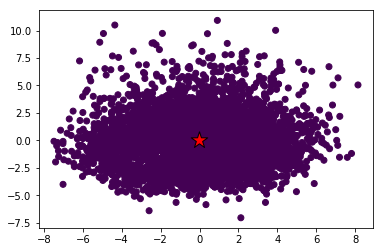

In [127]:
# reduce data to two components for plotting
X_ms_std_pca = PCA(2).fit_transform(X_std)


#fit to graph
ms_std_pca = MeanShift(bandwidth=bandwidth, bin_seeding=True)
pred_ms_std_pca = ms_std_pca.fit_predict(X_ms_std_pca)

# plot the solution

plt.scatter(X_ms_std_pca[:, 0], X_ms_std_pca[:, 1], c=pred_ms_std_pca)

# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids')


plt.show()

In [ ]:
# calculate silhouette_score
silhoueette_ms_mec = silhouette_score(X_mec, ms.labels_)
print(silhoueette_ms_mec)

### group 3: X_lab (lab data)

In [128]:
bandwidth = estimate_bandwidth(X_lab, quantile=0.2, n_samples=500)

# declare and fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_lab = ms.fit_predict(X_lab)

# extract cluster assignments for each data point
lab_labels = ms.labels_

# coordinates of the cluster centers
lab_cluster_centers = ms.cluster_centers_

# count our clusters
n_clusters_ = len(np.unique(lab_labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


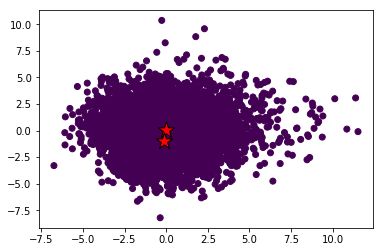

In [129]:
# reduce data to two components for plotting
X_ms_lab_pca = PCA(2).fit_transform(X_lab)


#fit to graph
ms_lab_pca = MeanShift(bandwidth=bandwidth, bin_seeding=True)
pred_ms_lab_pca = ms_lab_pca.fit_predict(X_ms_lab_pca)

# plot the solution 

plt.scatter(X_ms_lab_pca[:, 0], X_ms_lab_pca[:, 1], c=pred_ms_lab_pca)

# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids')


plt.show()

In [ ]:
# calculate silhouette_score
silhoueette_ms_lab = silhouette_score(X_lab, ms.labels_)
print(silhoueette_ms_lab)

In [ ]:
print('Silhouette score kmeans body measurements & labs: {}'.format(silhouette_kmeans9))
print('Silhouette score kmeans body measurements: {}'.format(silhouette_kmeans8_mec))
print('Silhouette score kmeans lab measurements: {}'.format (silhouette_kmeans9_lab))
print('Silhouette score minibatch body measurements & labs: {}'.format(silhouette_minibatch9_std))
print('Silhouette score minibatch body measurements: {}'.format(silhouette_minibatch8_mec))
print('Silhouette score minibatch lab measurements: {}'.format (silhouette_minibatch9_lab))
print('Silhouette score means shift body measurements & labs: {}'.format(silhoueette_ms_std))
print('Silhouette score means shift lab measurements: {}'.format (silhoueette_ms_lab))

#### comment: the best performing cluster per silhouette score is the means shift body measurements & labs: 0.2545795045329163; will use this cluster as a variable in supervised model.

### add predictions from kmeans cluster to df

best overall cluster: means shift body measurements & labs (ms_std): 0.2545795045329163

best body measurement cluster: kmeans body measurements (kmeans8_mec): 0.15117095128439503

best lab measurements: means shift lab measurements (ms_lab): 0.2535866497803697

In [130]:
nhanes_full_df['cluster_std']= pd.Series(ms_std, index=nhanes_full_df.index)

In [131]:
nhanes_full_df['cluster_mec']= pd.Series(kmeans8_mec, index=nhanes_full_df.index)

In [132]:
nhanes_full_df['cluster_lab']= pd.Series(ms_lab, index=nhanes_full_df.index)

In [133]:
nhanes_full_df.columns.tolist()

['SEQN',
 'RIAGENDR',
 'RIDAGEYR',
 'WTINT2YR',
 'WTMEC2YR',
 'INDFMPIR',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ300A',
 'MCQ365C',
 'MCQ365D',
 'MCQ370A',
 'MCQ370C',
 'MCQ370D',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXWAIST',
 'BMDAVSAD',
 'BPQ020',
 'BPQ030',
 'BPQ040A',
 'BPQ050A',
 'BPQ080',
 'BPQ060',
 'BPQ070',
 'BPQ090D',
 'BPQ100D',
 'bp_sys_avg',
 'bp_dis_avg',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMCHSI',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'LBXSAL',
 'LBXSAPSI',
 'LBXSASSI',
 'LBXSATSI',
 'LBXSBU',
 'LBXSC3SI',
 'LBXSCA',
 'LBXSCH',
 'LBXSCK',
 'LBXSCLSI',
 'LBXSCR',
 'LBXSGL',
 'LBXSIR',
 'LBXSKSI',
 'LBXSLDSI',
 'LBXSNASI',
 'LBXSOSSI',
 'LBXSPH',
 'LBDSPHSI',
 'LBXSTB',
 'LBXSTP',
 'LBXSTR',
 'LBXSUA',
 'LBDHDD',
 'LBXTC',
 'LBXHSCRP',
 'WTDRD1_x',
 'WTDR2D_x',
 'DRDINT_x',
 'DBQ095Z',
 'DBD100',
 'DRQSPREP',
 'DR1STY',


In [ ]:
nhanes_full_df.head()

# supervised model

## create df for supervised model

In [134]:
nhanes_model_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'INDFMPIR', 'WTDRD1_x', 'WTDR2D_x',
     'heart_dz', 'log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg',
     'log_tot_carb_avg', 'log_tot_sugar_avg', 'log_tot_fiber_avg',
     'log_tot_fat_avg', 'log_tot_sfat_avg', 'log_tot_mfat_avg',
     'log_tot_pfat_avg', 'log_tot_fchol_avg', 'log_tot_vit_e_avg',
     'log_tot_retinol_avg', 'log_tot_vit_a_avg', 'log_tot_alpha_c_avg',
     'log_tot_beta_c_avg', 'log_tot_beta_cry_avg', 'log_tot_lyco_avg',
     'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 
     'log_niac_avg', 'log_vit_b6_avg', 'log_folate_avg', 'log_folic_acid_avg', 
     'log_food_fol_avg', 'log_folate_dfe_avg', 'log_tot_choline_avg', 
     'log_vit_b12_avg', 'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg', 
     'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg', 'log_fe_avg', 
     'log_zn_avg', 'log_cu_avg', 'log_na_avg', 'log_k_avg', 'log_se_avg', 
     'log_tot_mois_avg', 'log_tot_h20_avg', 'log_tot_b1_avg', 'log_tot_b2_avg',
     'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 
     'log_tot_d_avg', 'log_tot_calc_avg', 'log_tot_mag_avg', 'log_tot_fe_avg', 
     'log_tot_zn_avg', 'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg', 
     'log_tot_se_avg', 'log_tot_folate_avg', 'MCQ300A_2.0', 'MCQ300A_7.0', 
     'MCQ300A_9.0', 'MCQ365C_2.0', 'MCQ365C_9.0', 'MCQ365D_2.0', 'MCQ365D_9.0',
     'MCQ370A_2.0', 'MCQ370A_9.0', 'MCQ370C_2.0', 'MCQ370C_9.0', 'MCQ370D_2.0',
     'MCQ370D_9.0', 'BPQ020_2.0', 'BPQ020_9.0', 'BPQ030_2.0', 'BPQ030_9.0', 
     'BPQ040A_2.0', 'BPQ040A_9.0', 'BPQ050A_2.0', 'BPQ050A_9.0', 'BPQ080_2.0', 
     'BPQ080_9.0', 'BPQ060_2.0', 'BPQ060_9.0', 'BPQ070_2.0', 'BPQ070_3.0', 
     'BPQ070_4.0', 'BPQ070_9.0', 'BPQ090D_2.0', 'BPQ090D_9.0', 'BPQ100D_2.0', 
     'BPQ100D_9.0', 'DBD100_1.0', 'DBD100_2.0', 'DBD100_3.0', 'DBD100_9.0', 
     'DRQSPREP_1.0', 'DRQSPREP_2.0', 'DRQSPREP_3.0', 'DRQSPREP_4.0', 
     'DRQSPREP_9.0', 'DR1STY_1.0', 'DR1STY_2.0', 'DR1STY_9.0', 'DRQSDIET_1.0', 
     'DRQSDIET_2.0', 'DRQSDIET_9.0', 'DR2STY_1.0', 'DR2STY_2.0', 
     'DR2STY_9.0', 'DS1DS_1.0','DS1DS_2.0', 'DS1AN_1.0', 'DS1AN_2.0', 
     'DS2DS_1.0', 'DS2DS_2.0', 'DS2AN_1.0', 'DS2AN_2.0', 'cluster_std', 
     'cluster_mec', 'cluster_lab']]

In [135]:
nhanes_model_df = nhanes_model_df.loc[:,~nhanes_model_df.columns.duplicated()]

In [ ]:
nhanes_model_df.head()

In [ ]:
nhanes_model_df.info()

In [136]:
nhanes_model_df['heart_dz'].value_counts()

0    4403
1     309
Name: heart_dz, dtype: int64

#### sample weight variables included in dataframe :

**tot_intake1_df, tot_intake2_df: 9545**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

## continuous data, visualize

### macronutrients

C:\Users\katec\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\katec\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


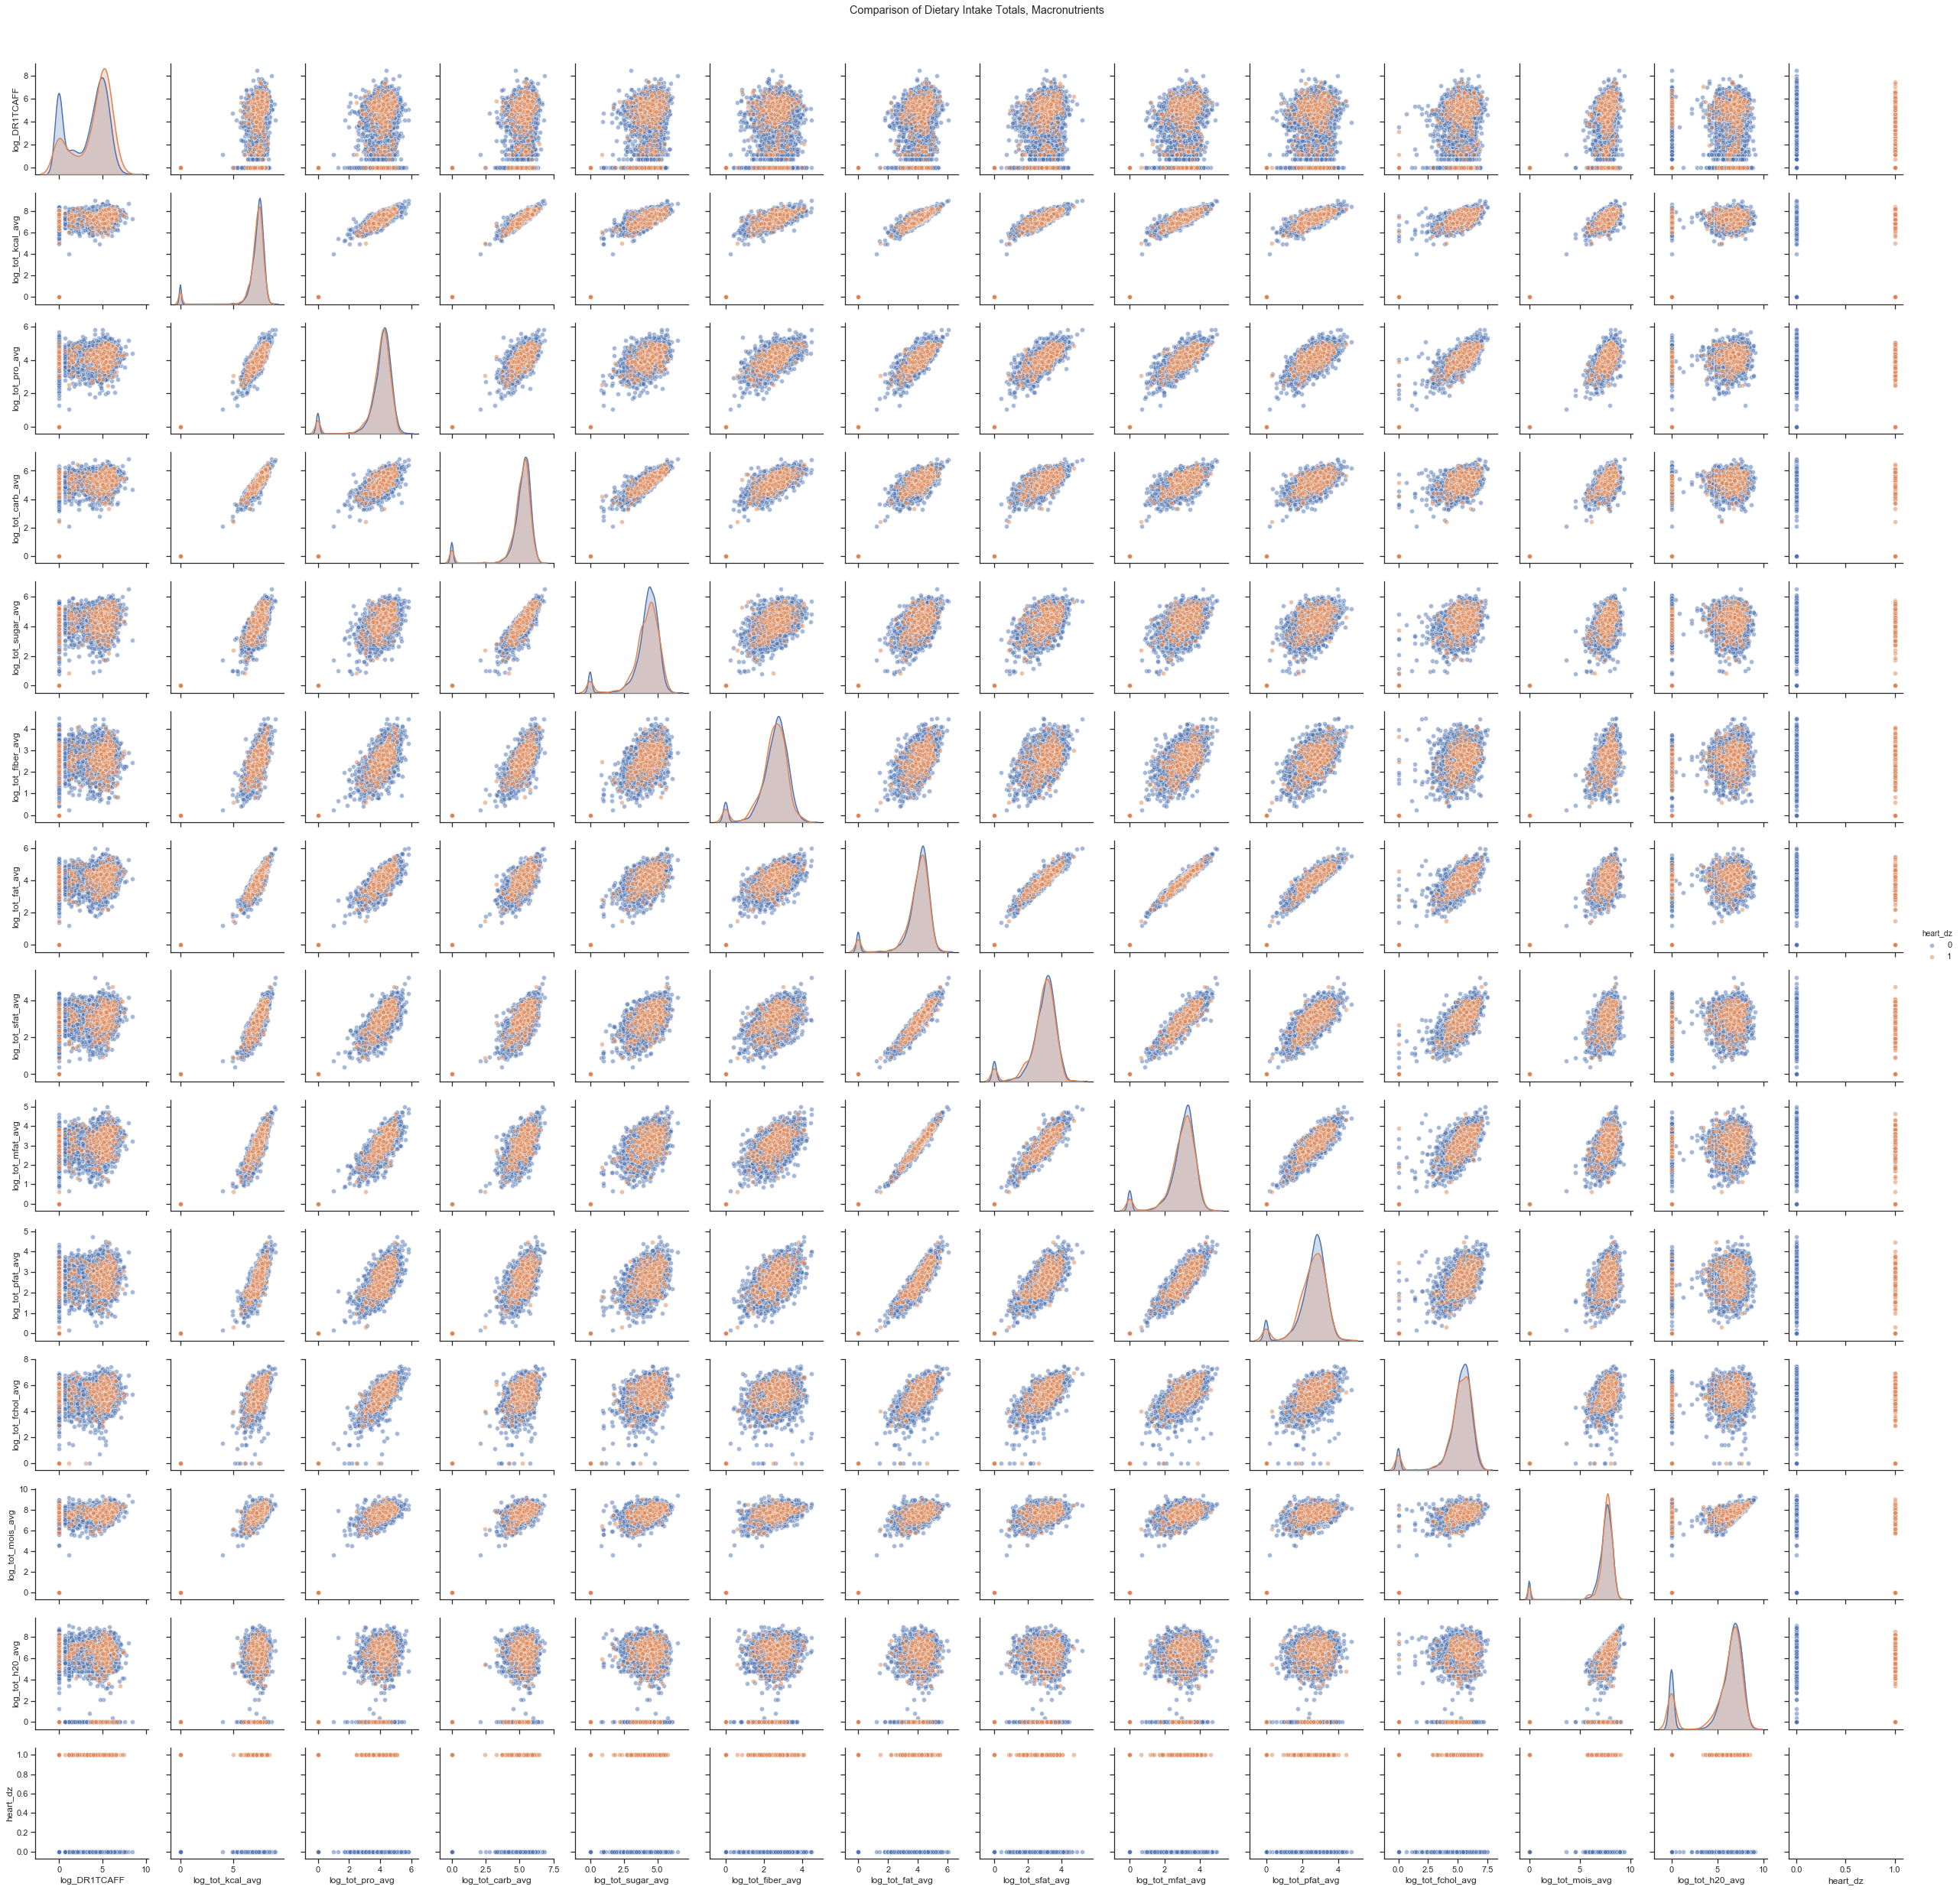

In [137]:
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg',
     'log_tot_carb_avg', 'log_tot_sugar_avg', 'log_tot_fiber_avg',
     'log_tot_fat_avg', 'log_tot_sfat_avg', 'log_tot_mfat_avg',
     'log_tot_pfat_avg', 'log_tot_fchol_avg', 'log_tot_mois_avg', 
     'log_tot_h20_avg','heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5},
            )
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Totals, Macronutrients')
plt.show()

#### comment: relationship between variables appears to be non-linear; will try SVM in addition to RFC and gradient boosting models

In [ ]:
macronutrients = nhanes_model_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg',
     'log_tot_carb_avg', 'log_tot_sugar_avg', 'log_tot_fiber_avg',
     'log_tot_fat_avg', 'log_tot_sfat_avg', 'log_tot_mfat_avg',
     'log_tot_pfat_avg', 'log_tot_fchol_avg', 'log_tot_mois_avg', 
     'log_tot_h20_avg', 'heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(macronutrients.corr())
plt.show()

In [ ]:
macronutrients.corr()

#### comment: highly correlated features
remove feature with lower correlation to target value from pairs of highly correlated features:
'log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_fat_avg', 'log_tot_mois_avg'

In [ ]:
np.abs(macronutrients.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

### fat-soluble vitamins, total

In [ ]:
#comparing dietary intake (features) with target
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_tot_vit_e_avg','log_tot_retinol_avg', 'log_tot_vit_a_avg', 
     'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg', 
     'log_tot_d_avg', 'log_tot_vit_k_avg','heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Totals, Fat-soluble vitamins')
plt.show()

In [ ]:
fat_sol = nhanes_model_df[
    ['log_tot_vit_e_avg','log_tot_retinol_avg', 'log_tot_vit_a_avg', 
     'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg', 
     'log_tot_d_avg', 'log_tot_vit_k_avg','heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(fat_sol.corr())

In [ ]:
fat_sol.corr()

#### comment: highly correlated features
remove feature with lower correlation to target value from pairs of highly correlated features:
'log_tot_vit_a_avg'

In [ ]:
np.abs(fat_sol.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

### water-soluble vitamins, total

In [ ]:
#comparing dietary intake (features) with target
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_tot_choline_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 
     'log_tot_folate_avg', 'heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Totals, Water-soluble vitamins')
plt.show()

In [ ]:
water_sol_tot = nhanes_model_df[
    ['log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_tot_choline_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 
     'log_tot_folate_avg', 'heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(water_sol_tot.corr())

In [ ]:
water_sol_tot.corr()

#### comment: highly correlated features
remove 'log_tot_lutein_avg'

In [ ]:
np.abs(water_sol_tot.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

### water-soluble vitamins, food

In [ ]:
#comparing dietary intake (features) with target
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_vit_b1_avg', 'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
     'log_vit_b12_avg','log_folate_avg', 'log_folic_acid_avg', 
     'log_food_fol_avg', 'log_folate_dfe_avg','log_vit_c_avg',
     'heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Food Totals, Water-soluble vitamins')
plt.show()

In [ ]:
water_sol_food = nhanes_model_df[
    ['log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_tot_choline_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 
     'log_tot_folate_avg', 'heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(water_sol_food.corr())

In [ ]:
water_sol_food.corr()

#### comment: highly correlated features
remove feature with lower correlation to target value from pairs of highly correlated features:
'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
'log_vit_b12_avg', 'log_tot_folate_avg'

In [ ]:
np.abs(water_sol_food.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

### minerals, total

In [ ]:
#comparing dietary intake (features) with target
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_tot_phos_avg', 'log_tot_calc_avg', 'log_tot_mag_avg', 
     'log_tot_fe_avg', 'log_tot_zn_avg', 'log_tot_cu_avg',
     'log_tot_na_avg', 'log_tot_k_avg', 'log_tot_se_avg','heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Totals, Minerals')
plt.show()

In [ ]:
minerals = nhanes_model_df[
    ['log_tot_phos_avg', 'log_tot_calc_avg', 'log_tot_mag_avg', 
     'log_tot_fe_avg', 'log_tot_zn_avg', 'log_tot_cu_avg',
     'log_tot_na_avg', 'log_tot_k_avg', 'log_tot_se_avg','heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(minerals.corr())

In [ ]:
minerals.corr()

In [ ]:
np.abs(minerals.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

### minerals, food

In [ ]:
#comparing dietary intake (features) with target
sns.set(style='ticks')

sns.pairplot(nhanes_model_df[
    ['log_na_avg', 'log_k_avg', 'log_se_avg', 'log_mag_avg', 
     'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_calc_avg','heart_dz']], 
            hue= 'heart_dz',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Dietary Intake Food Totals, Minerals')
plt.show()

In [ ]:
minerals_food = nhanes_model_df[
    ['log_na_avg', 'log_k_avg', 'log_se_avg', 'log_mag_avg', 
     'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_calc_avg',
     'heart_dz']]

#correlation matrix
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(minerals_food.corr())

In [ ]:
minerals_food.corr()

In [ ]:
np.abs(minerals_food.iloc[:,:].corr().loc[:,'heart_dz']).sort_values(ascending=False)

#### comment: highly correlated features
remove feature with lower correlation to target value from pairs of highly correlated features:
'log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg','log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 'log_folate_dfe_avg', 'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_calc_avg'

## categorical data

In [ ]:
categorical1_columns = nhanes_model_df[
    ['heart_dz', 'MCQ300A_2.0', 'MCQ300A_7.0', 'MCQ300A_9.0', 'MCQ365C_2.0', 
     'MCQ365C_9.0', 'MCQ365D_2.0', 'MCQ365D_9.0', 'MCQ370A_2.0', 'MCQ370A_9.0',
     'MCQ370C_2.0', 'MCQ370C_9.0', 'MCQ370D_2.0', 'MCQ370D_9.0', 'BPQ020_2.0', 
     'BPQ020_9.0', 'BPQ030_2.0', 'BPQ030_9.0', 'BPQ040A_2.0', 'BPQ040A_9.0', 
     'BPQ050A_2.0', 'BPQ050A_9.0', 'BPQ080_2.0', 'BPQ080_9.0', 'BPQ060_2.0', 
     'BPQ060_9.0', 'BPQ070_2.0', 'BPQ070_3.0', 'BPQ070_4.0', 'BPQ070_9.0', 
     'BPQ090D_2.0', 'BPQ090D_9.0', 'BPQ100D_2.0', 'BPQ100D_9.0', 'DBD100_1.0', 
     'DBD100_2.0', 'DBD100_3.0', 'DBD100_9.0', 'DRQSPREP_1.0', 'DRQSPREP_2.0', 
     'DRQSPREP_3.0', 'DRQSPREP_4.0', 'DRQSPREP_9.0', 'DR1STY_1.0', 'DR1STY_2.0', 
     'DR1STY_9.0', 'DRQSDIET_1.0', 'DRQSDIET_2.0', 'DRQSDIET_9.0', 'DR2STY_1.0', 
     'DR2STY_2.0', 'DR2STY_9.0', 'DS1DS_1.0', 'DS1DS_2.0', 'DS1AN_1.0', 
     'DS1AN_2.0', 'DS2DS_1.0', 'DS2DS_2.0', 'DS2AN_1.0', 'DS2AN_2.0', 
     'cluster_mec', 'cluster_lab', 'cluster_std']]

In [ ]:
len(nhanes_model_df[nhanes_model_df['heart_dz']==0])

In [138]:
#check ratio of non-target value
len(nhanes_model_df[nhanes_model_df['heart_dz']==0])/len(nhanes_model_df)

0.9344227504244482

In [ ]:
len(nhanes_model_df[nhanes_model_df['heart_dz']==1])

In [ ]:
#check ratio of target value
len(nhanes_model_df[nhanes_model_df['heart_dz']==1])/len(nhanes_model_df)

#### comment: highly correlated features
remove feature with lower correlation to target value from pairs of highly correlated features:
'log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg','log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 'log_folate_dfe_avg', 'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_calc_avg'

In [ ]:
nhanes_model_df.columns.tolist()

## Random Forest

### run model WITH imbalanced class distribution 
### first run

In [139]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#initial run
rfc = ensemble.RandomForestClassifier(random_state=42)
X = nhanes_model_df.drop(
    ['log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 
     'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 
     'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg', 
     'log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 
     'log_folate_dfe_avg', 'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 
     'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 
     'log_cu_avg', 'log_calc_avg', 'heart_dz'], axis=1)
Y = nhanes_model_df['heart_dz']

cv_initial = cross_val_score(rfc, X, Y, cv=10)
cv_initial

array([0.93432203, 0.93432203, 0.93630573, 0.93418259, 0.93418259,
       0.93418259, 0.93418259, 0.93418259, 0.93418259, 0.93418259])

In [140]:
print('Cross-validation mean score for initial run: {}'.format (cv_initial.mean()))

Cross-validation mean score for initial run: 0.9344227931915506


In [141]:
roc_cv_score = cross_val_score(rfc, X, Y, cv=10, scoring= 'roc_auc')
roc_cv_score

array([0.86138541, 0.81607051, 0.80306122, 0.87573314, 0.86015396,
       0.90579179, 0.89508798, 0.86638563, 0.90557185, 0.8707478 ])

In [142]:
print('ROC-AUC mean score for initial run: {}'.format (roc_cv_score.mean()))

ROC-AUC mean score for initial run: 0.865998929386026


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y)

In [144]:
pd.Series(Y_test).value_counts()

0    1101
1      77
Name: heart_dz, dtype: int64

In [145]:
rfc.fit(X_train, Y_train) 
## score on testing data.
rfc_initial = rfc.score(X_test, Y_test)
print('Accuracy score for initial run: {}'.format (rfc_initial))

Accuracy score for initial run: 0.9354838709677419


In [146]:
rfc_predict = rfc.predict(X_test)
rfc_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

In [147]:
from sklearn.metrics import classification_report
y_true = Y_test
y_pred = rfc_predict
initial_class_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for initial run:')
print(initial_class_report)

Classification Report for initial run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       1.00      0.01      0.03        77

    accuracy                           0.94      1178
   macro avg       0.97      0.51      0.50      1178
weighted avg       0.94      0.94      0.91      1178



In [148]:
from sklearn.metrics import confusion_matrix
initial_conf_mat = confusion_matrix(rfc_predict, Y_test)

print('Confusion Matrix for initial run')
initial_conf_mat

Confusion Matrix for initial run


array([[1101,   76],
       [   0,    1]], dtype=int64)

#### comments on initial run for imbalanced data: 

CV (mean) and accuracy score for initial run are performing better than ratio. However, the ROC-AUC score is performing much lower than ratio. A closer look at the precision/recall scores indicates that while the model performs well in identifiying class 0 (non-heart disease), if fails to accurately identify even one case of class 1 (heart disease). 

Cross-validation mean score for initial run: 0.9337863003346648
ROC-AUC mean score for initial run: 0.8729168384525527
Accuracy score for initial run: 0.934634974533107

Classification Report for initial run:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1101
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1178
   macro avg       0.47      0.50      0.48      1178
weighted avg       0.87      0.93      0.90      1178


Confusion Matrix for initial run

array([[1101,   77],
       [   0,    0]], dtype=int64)

#### comments: model is performing only slightly better than ratio on accuracy metric, and grossly underperforming based on precision/recall for target value; additional feature engineering required

### feature tuning 

In [149]:
feature_importances_initial = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_initial

importance
RIDAGEYR                0.057069
BPQ100D_9.0             0.029154
INDFMPIR                0.027251
SEQN                    0.026084
log_DR1TCAFF            0.023236
WTDRD1_x                0.021054
log_tot_sugar_avg       0.021047
log_tot_beta_c_avg      0.020481
log_tot_b1_avg          0.020173
log_tot_d_avg           0.020072
log_tot_fe_avg          0.020048
log_tot_zn_avg          0.019984
log_tot_pfat_avg        0.019809
log_tot_vit_e_avg       0.019724
log_tot_retinol_avg     0.019470
log_tot_b12_avg         0.019257
log_tot_fchol_avg       0.019040
log_tot_beta_cry_avg    0.018980
log_tot_cu_avg          0.018846
log_tot_fiber_avg       0.018688
log_vit_d_avg           0.018564
log_tot_choline_avg     0.018467
log_tot_lyco_avg        0.018379
log_tot_h20_avg         0.018281
log_tot_mag_avg         0.018022
log_tot_calc_avg        0.018007
log_tot_phos_avg        0.017625
log_tot_k_avg           0.017596
log_folate_avg          0.017540
log_tot_niac_avg        0.017461
log_tot_b6_avg          0.017313
log_tot_c_avg           0.017248
log_tot_vit_k_avg       0.017046
log_tot_na_avg          0.016891
log_tot_mfat_avg        0.016762
log_tot_b2_avg          0.016086
log_tot_alpha_c_avg     0.016066
cluster_mec             0.015904
log_tot_se_avg          0.015213
log_tot_sfat_avg        0.015165
WTDR2D_x                0.013542
BPQ050A_9.0             0.012799
BPQ030_9.0              0.012216
DRQSPREP_1.0            0.010970
MCQ300A_2.0             0.007870
BPQ040A_9.0             0.007336
MCQ365C_2.0             0.007176
BPQ090D_2.0             0.006427
DRQSDIET_1.0            0.006401
BPQ020_2.0              0.005484
BPQ080_2.0              0.005436
RIAGENDR                0.005101
BPQ060_9.0              0.004854
DS1DS_2.0               0.004791
DRQSDIET_2.0            0.004331
BPQ070_9.0              0.004030
MCQ365D_2.0             0.003956
BPQ100D_2.0             0.003729
MCQ370C_2.0             0.003606
MCQ370D_2.0             0.003580
DRQSPREP_3.0            0.003290
MCQ370A_2.0             0.003164
DBD100_1.0              0.003022
DS1DS_1.0               0.002980
DS2DS_2.0               0.002960
DRQSPREP_4.0            0.002880
DS2DS_1.0               0.002853
DR2STY_1.0              0.002766
BPQ090D_9.0             0.002587
BPQ070_2.0              0.002431
BPQ030_2.0              0.002351
DBD100_2.0              0.002348
DRQSPREP_2.0            0.002327
DR1STY_1.0              0.002297
DBD100_3.0              0.002229
BPQ070_3.0              0.002070
DS2AN_2.0               0.001984
DR2STY_2.0              0.001945
MCQ300A_9.0             0.001727
DR1STY_2.0              0.001708
BPQ050A_2.0             0.001573
DS2AN_1.0               0.001405
BPQ040A_2.0             0.001272
DS1AN_1.0               0.001042
DR2STY_9.0              0.000950
BPQ060_2.0              0.000937
DS1AN_2.0               0.000880
MCQ370D_9.0             0.000864
BPQ070_4.0              0.000818
BPQ080_9.0              0.000798
BPQ020_9.0              0.000617
DRQSPREP_9.0            0.000614
MCQ370A_9.0             0.000558
MCQ365D_9.0             0.000276
MCQ370C_9.0             0.000194
MCQ300A_7.0             0.000187
DR1STY_9.0              0.000142
cluster_lab             0.000082
MCQ365C_9.0             0.000074
DRQSDIET_9.0            0.000035
cluster_std             0.000028
DBD100_9.0              0.000000

Text(0.5, 1.0, 'Cumulative Importances')

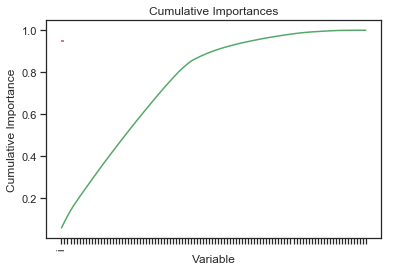

In [150]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_initial)))

# list of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_initial]
sorted_features = [importance[0] for importance in feature_importances_initial]

# cumulative importances
cumulative_importances = np.cumsum(feature_importances_initial)

# make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [151]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 65


In [152]:
feature_importances_initial[:66]

importance
RIDAGEYR                0.057069
BPQ100D_9.0             0.029154
INDFMPIR                0.027251
SEQN                    0.026084
log_DR1TCAFF            0.023236
WTDRD1_x                0.021054
log_tot_sugar_avg       0.021047
log_tot_beta_c_avg      0.020481
log_tot_b1_avg          0.020173
log_tot_d_avg           0.020072
log_tot_fe_avg          0.020048
log_tot_zn_avg          0.019984
log_tot_pfat_avg        0.019809
log_tot_vit_e_avg       0.019724
log_tot_retinol_avg     0.019470
log_tot_b12_avg         0.019257
log_tot_fchol_avg       0.019040
log_tot_beta_cry_avg    0.018980
log_tot_cu_avg          0.018846
log_tot_fiber_avg       0.018688
log_vit_d_avg           0.018564
log_tot_choline_avg     0.018467
log_tot_lyco_avg        0.018379
log_tot_h20_avg         0.018281
log_tot_mag_avg         0.018022
log_tot_calc_avg        0.018007
log_tot_phos_avg        0.017625
log_tot_k_avg           0.017596
log_folate_avg          0.017540
log_tot_niac_avg        0.017461
log_tot_b6_avg          0.017313
log_tot_c_avg           0.017248
log_tot_vit_k_avg       0.017046
log_tot_na_avg          0.016891
log_tot_mfat_avg        0.016762
log_tot_b2_avg          0.016086
log_tot_alpha_c_avg     0.016066
cluster_mec             0.015904
log_tot_se_avg          0.015213
log_tot_sfat_avg        0.015165
WTDR2D_x                0.013542
BPQ050A_9.0             0.012799
BPQ030_9.0              0.012216
DRQSPREP_1.0            0.010970
MCQ300A_2.0             0.007870
BPQ040A_9.0             0.007336
MCQ365C_2.0             0.007176
BPQ090D_2.0             0.006427
DRQSDIET_1.0            0.006401
BPQ020_2.0              0.005484
BPQ080_2.0              0.005436
RIAGENDR                0.005101
BPQ060_9.0              0.004854
DS1DS_2.0               0.004791
DRQSDIET_2.0            0.004331
BPQ070_9.0              0.004030
MCQ365D_2.0             0.003956
BPQ100D_2.0             0.003729
MCQ370C_2.0             0.003606
MCQ370D_2.0             0.003580
DRQSPREP_3.0            0.003290
MCQ370A_2.0             0.003164
DBD100_1.0              0.003022
DS1DS_1.0               0.002980
DS2DS_2.0               0.002960
DRQSPREP_4.0            0.002880

In [153]:
print(feature_importances_initial[:66].index)

Index(['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'log_DR1TCAFF',
       'WTDRD1_x', 'log_tot_sugar_avg', 'log_tot_beta_c_avg', 'log_tot_b1_avg',
       'log_tot_d_avg', 'log_tot_fe_avg', 'log_tot_zn_avg', 'log_tot_pfat_avg',
       'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_b12_avg',
       'log_tot_fchol_avg', 'log_tot_beta_cry_avg', 'log_tot_cu_avg',
       'log_tot_fiber_avg', 'log_vit_d_avg', 'log_tot_choline_avg',
       'log_tot_lyco_avg', 'log_tot_h20_avg', 'log_tot_mag_avg',
       'log_tot_calc_avg', 'log_tot_phos_avg', 'log_tot_k_avg',
       'log_folate_avg', 'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_c_avg',
       'log_tot_vit_k_avg', 'log_tot_na_avg', 'log_tot_mfat_avg',
       'log_tot_b2_avg', 'log_tot_alpha_c_avg', 'cluster_mec',
       'log_tot_se_avg', 'log_tot_sfat_avg', 'WTDR2D_x', 'BPQ050A_9.0',
       'BPQ030_9.0', 'DRQSPREP_1.0', 'MCQ300A_2.0', 'BPQ040A_9.0',
       'MCQ365C_2.0', 'BPQ090D_2.0', 'DRQSDIET_1.0', 'BPQ020_2.0',
       'BPQ080_2.0

### 2nd run (features tuned from initial run)

In [154]:
rfc = ensemble.RandomForestClassifier(random_state=42)
X_feat_rev = nhanes_model_df[
    ['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'WTDRD1_x',
       'log_tot_beta_c_avg', 'log_tot_vit_k_avg', 'log_tot_fe_avg',
       'log_tot_d_avg', 'log_vit_d_avg', 'log_tot_retinol_avg',
       'log_tot_beta_cry_avg', 'log_DR1TCAFF', 'log_tot_niac_avg',
       'log_tot_calc_avg', 'log_tot_zn_avg', 'log_tot_b1_avg',
       'log_tot_fiber_avg', 'log_tot_alpha_c_avg', 'log_tot_na_avg',
       'log_tot_vit_e_avg', 'log_tot_pfat_avg', 'log_tot_b2_avg',
       'log_tot_mfat_avg', 'log_tot_fchol_avg', 'log_tot_b12_avg',
       'log_tot_choline_avg', 'cluster_mec', 'log_tot_b6_avg',
       'log_tot_cu_avg', 'log_tot_h20_avg', 'log_tot_c_avg',
       'log_tot_sfat_avg', 'log_tot_sugar_avg', 'log_tot_phos_avg',
       'log_tot_mag_avg', 'log_tot_lyco_avg', 'log_tot_k_avg',
       'log_tot_se_avg', 'WTDR2D_x', 'log_tot_folate_avg', 'BPQ030_9.0',
       'BPQ050A_9.0', 'BPQ040A_9.0', 'BPQ090D_2.0', 'MCQ365C_2.0',
       'MCQ300A_2.0', 'DRQSPREP_1.0', 'RIAGENDR', 'BPQ060_9.0', 'BPQ080_2.0',
       'MCQ365D_2.0', 'BPQ020_2.0', 'BPQ070_9.0', 'BPQ100D_2.0',
       'DRQSDIET_2.0', 'DRQSDIET_1.0', 'DS1DS_1.0', 'DS1DS_2.0', 'MCQ370A_2.0',
       'MCQ370D_2.0', 'MCQ370C_2.0', 'DS2DS_1.0', 'BPQ050A_2.0', 'DR1STY_2.0',
       'BPQ090D_9.0']] 
Y_feat_rev = nhanes_model_df['heart_dz']

In [155]:
cv_revised = cross_val_score(rfc, X_feat_rev, Y_feat_rev, cv=10)
cv_revised

array([0.93432203, 0.93432203, 0.93630573, 0.93418259, 0.93205945,
       0.93630573, 0.93418259, 0.93418259, 0.93630573, 0.93630573])

In [ ]:
print('Cross-validation mean score for 2nd run: {}'.format (cv_revised.mean()))

In [156]:
roc_cv_rev_score = cross_val_score(rfc, X_feat_rev, Y_feat_rev, cv=10, scoring= 'roc_auc')
roc_cv_rev_score

array([0.84591471, 0.80528125, 0.8053288 , 0.88475073, 0.86689883,
       0.90945748, 0.89153226, 0.86546921, 0.88574047, 0.87159091])

In [ ]:
print('ROC-AUC mean score for 2nd run: {}'.format (roc_cv_rev_score.mean()))

In [157]:
X_rev_train, X_rev_test, Y_rev_train, Y_rev_test = train_test_split(X_feat_rev, Y_feat_rev, stratify=Y_feat_rev)

In [158]:
rfc.fit(X_rev_train, Y_rev_train) 
## score testing data.
rfc_rev = rfc.score(X_rev_test, Y_rev_test)
print('Accuracy score for 2nd run: {}'.format (rfc_rev))

Accuracy score for 2nd run: 0.9371816638370118


In [159]:
rfc1_rev_predict = rfc.predict(X_rev_test)
rfc1_rev_predict


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
y_true = Y_rev_test
y_pred = rfc1_rev_predict
class1_rev_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for 2nd run:')
print(class1_rev_report)

Classification Report for 2nd run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       1.00      0.04      0.08        77

    accuracy                           0.94      1178
   macro avg       0.97      0.52      0.52      1178
weighted avg       0.94      0.94      0.91      1178



In [161]:
conf_2nd_mat = confusion_matrix(rfc1_rev_predict, Y_rev_test)

print('Confusion Matrix for 2nd run')
conf_2nd_mat

Confusion Matrix for 2nd run


array([[1101,   74],
       [   0,    3]], dtype=int64)

#### comments on 2nd run for imbalanced data: 

CV score improved, with ROC-AUC score lower and Accuracy unchanged. Improvements are seen in precision/recall for the target value (class 1), however the confusion matrix indicates that the model was able to correctly identify only one case of heart disease. 


Cross-validation mean score for 2nd run: 0.9348474216416568
ROC-AUC mean score for 2nd run: 0.8631964643139758
Accuracy score for 2nd run: 0.934634974533107

Classification Report for 2nd run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.50      0.01      0.03        77

    accuracy                           0.93      1178
   macro avg       0.72      0.51      0.50      1178
weighted avg       0.91      0.93      0.90      1178


Confusion Matrix for 2nd run

array([[1100,   76],
       [   1,    1]], dtype=int64)


CV: improved
**ROC: lower**
Accuracy: unchanged

**Precision: IMPROVED for target**;
**Recall: IMPROVED for target**;
**F1: IMPROVED for target**;
**Confusion matrix: IMPROVED**

#### comments: model show little improvement over-all; additional feature engineering required

### 2nd feature tuning

In [162]:
feature_importances_revised = pd.DataFrame(rfc.feature_importances_,
                                           index = X_rev_train.columns,
                                           columns=['importance']).sort_values('importance',
                                           ascending=False)
feature_importances_revised

importance
RIDAGEYR                0.055385
BPQ100D_9.0             0.035362
SEQN                    0.031903
INDFMPIR                0.029140
WTDRD1_x                0.023411
log_tot_fe_avg          0.022851
log_tot_b12_avg         0.022625
log_tot_d_avg           0.022388
log_DR1TCAFF            0.022150
log_tot_sugar_avg       0.021880
log_tot_h20_avg         0.021294
log_tot_pfat_avg        0.020959
log_tot_niac_avg        0.020647
log_tot_mfat_avg        0.020525
log_tot_alpha_c_avg     0.019721
log_tot_vit_k_avg       0.019580
WTDR2D_x                0.019349
log_tot_vit_e_avg       0.019220
log_tot_sfat_avg        0.019212
log_tot_beta_cry_avg    0.019198
log_tot_b6_avg          0.019197
log_tot_beta_c_avg      0.018880
log_tot_b2_avg          0.018808
log_tot_zn_avg          0.018781
log_tot_b1_avg          0.018622
log_tot_fchol_avg       0.018606
log_tot_na_avg          0.018170
log_vit_d_avg           0.018125
log_tot_phos_avg        0.018105
log_tot_mag_avg         0.018038
log_tot_cu_avg          0.017734
log_tot_c_avg           0.017577
log_tot_lyco_avg        0.017432
log_tot_calc_avg        0.017109
log_tot_retinol_avg     0.017093
log_tot_k_avg           0.016962
log_tot_folate_avg      0.016930
log_tot_se_avg          0.016537
log_tot_fiber_avg       0.016005
cluster_mec             0.015815
log_tot_choline_avg     0.015303
BPQ050A_9.0             0.014086
BPQ040A_9.0             0.011595
BPQ030_9.0              0.010777
BPQ090D_2.0             0.009258
MCQ300A_2.0             0.009005
RIAGENDR                0.007917
BPQ080_2.0              0.007606
BPQ020_2.0              0.006878
MCQ365C_2.0             0.006026
BPQ060_9.0              0.005591
DRQSPREP_1.0            0.004787
MCQ370C_2.0             0.004715
BPQ070_9.0              0.004646
MCQ365D_2.0             0.004360
MCQ370D_2.0             0.004159
BPQ090D_9.0             0.004114
DS1DS_1.0               0.003876
DRQSDIET_2.0            0.003763
MCQ370A_2.0             0.003428
BPQ100D_2.0             0.003340
DS2DS_1.0               0.003321
DS1DS_2.0               0.003273
DRQSDIET_1.0            0.002769
DR1STY_2.0              0.002469
BPQ050A_2.0             0.001612

Text(0.5, 1.0, 'Cumulative Importances')

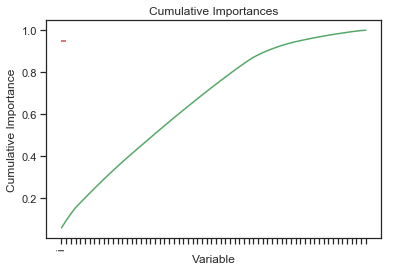

In [163]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_revised)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_revised]
sorted_features = [importance[0] for importance in feature_importances_revised]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_revised)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [164]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 52


In [165]:
feature_importances_revised[:52]

importance
RIDAGEYR                0.055385
BPQ100D_9.0             0.035362
SEQN                    0.031903
INDFMPIR                0.029140
WTDRD1_x                0.023411
log_tot_fe_avg          0.022851
log_tot_b12_avg         0.022625
log_tot_d_avg           0.022388
log_DR1TCAFF            0.022150
log_tot_sugar_avg       0.021880
log_tot_h20_avg         0.021294
log_tot_pfat_avg        0.020959
log_tot_niac_avg        0.020647
log_tot_mfat_avg        0.020525
log_tot_alpha_c_avg     0.019721
log_tot_vit_k_avg       0.019580
WTDR2D_x                0.019349
log_tot_vit_e_avg       0.019220
log_tot_sfat_avg        0.019212
log_tot_beta_cry_avg    0.019198
log_tot_b6_avg          0.019197
log_tot_beta_c_avg      0.018880
log_tot_b2_avg          0.018808
log_tot_zn_avg          0.018781
log_tot_b1_avg          0.018622
log_tot_fchol_avg       0.018606
log_tot_na_avg          0.018170
log_vit_d_avg           0.018125
log_tot_phos_avg        0.018105
log_tot_mag_avg         0.018038
log_tot_cu_avg          0.017734
log_tot_c_avg           0.017577
log_tot_lyco_avg        0.017432
log_tot_calc_avg        0.017109
log_tot_retinol_avg     0.017093
log_tot_k_avg           0.016962
log_tot_folate_avg      0.016930
log_tot_se_avg          0.016537
log_tot_fiber_avg       0.016005
cluster_mec             0.015815
log_tot_choline_avg     0.015303
BPQ050A_9.0             0.014086
BPQ040A_9.0             0.011595
BPQ030_9.0              0.010777
BPQ090D_2.0             0.009258
MCQ300A_2.0             0.009005
RIAGENDR                0.007917
BPQ080_2.0              0.007606
BPQ020_2.0              0.006878
MCQ365C_2.0             0.006026
BPQ060_9.0              0.005591
DRQSPREP_1.0            0.004787

In [166]:
print(feature_importances_revised[:52].index)

Index(['RIDAGEYR', 'BPQ100D_9.0', 'SEQN', 'INDFMPIR', 'WTDRD1_x',
       'log_tot_fe_avg', 'log_tot_b12_avg', 'log_tot_d_avg', 'log_DR1TCAFF',
       'log_tot_sugar_avg', 'log_tot_h20_avg', 'log_tot_pfat_avg',
       'log_tot_niac_avg', 'log_tot_mfat_avg', 'log_tot_alpha_c_avg',
       'log_tot_vit_k_avg', 'WTDR2D_x', 'log_tot_vit_e_avg',
       'log_tot_sfat_avg', 'log_tot_beta_cry_avg', 'log_tot_b6_avg',
       'log_tot_beta_c_avg', 'log_tot_b2_avg', 'log_tot_zn_avg',
       'log_tot_b1_avg', 'log_tot_fchol_avg', 'log_tot_na_avg',
       'log_vit_d_avg', 'log_tot_phos_avg', 'log_tot_mag_avg',
       'log_tot_cu_avg', 'log_tot_c_avg', 'log_tot_lyco_avg',
       'log_tot_calc_avg', 'log_tot_retinol_avg', 'log_tot_k_avg',
       'log_tot_folate_avg', 'log_tot_se_avg', 'log_tot_fiber_avg',
       'cluster_mec', 'log_tot_choline_avg', 'BPQ050A_9.0', 'BPQ040A_9.0',
       'BPQ030_9.0', 'BPQ090D_2.0', 'MCQ300A_2.0', 'RIAGENDR', 'BPQ080_2.0',
       'BPQ020_2.0', 'MCQ365C_2.0', 'BPQ060_9.0',

### 3rd  run (features tuned from 2nd run)

In [167]:
# 3rd  run
rfc = ensemble.RandomForestClassifier(random_state=42)
X3_feat_rev = nhanes_model_df[
    ['RIDAGEYR', 'BPQ100D_9.0', 'SEQN', 'INDFMPIR', 'WTDRD1_x',
       'log_tot_fe_avg', 'log_tot_b12_avg', 'log_tot_d_avg', 'log_DR1TCAFF',
       'log_tot_sugar_avg', 'log_tot_h20_avg', 'log_tot_pfat_avg',
       'log_tot_niac_avg', 'log_tot_mfat_avg', 'log_tot_alpha_c_avg',
       'log_tot_vit_k_avg', 'WTDR2D_x', 'log_tot_vit_e_avg',
       'log_tot_sfat_avg', 'log_tot_beta_cry_avg', 'log_tot_b6_avg',
       'log_tot_beta_c_avg', 'log_tot_b2_avg', 'log_tot_zn_avg',
       'log_tot_b1_avg', 'log_tot_fchol_avg', 'log_tot_na_avg',
       'log_vit_d_avg', 'log_tot_phos_avg', 'log_tot_mag_avg',
       'log_tot_cu_avg', 'log_tot_c_avg', 'log_tot_lyco_avg',
       'log_tot_calc_avg', 'log_tot_retinol_avg', 'log_tot_k_avg',
       'log_tot_folate_avg', 'log_tot_se_avg', 'log_tot_fiber_avg',
       'cluster_mec', 'log_tot_choline_avg', 'BPQ050A_9.0', 'BPQ040A_9.0',
       'BPQ030_9.0', 'BPQ090D_2.0', 'MCQ300A_2.0', 'RIAGENDR', 'BPQ080_2.0',
       'BPQ020_2.0', 'MCQ365C_2.0', 'BPQ060_9.0', 'DRQSPREP_1.0']]
Y3_feat_rev = nhanes_model_df['heart_dz']

cv_3rd_run = cross_val_score(rfc, X3_feat_rev, Y3_feat_rev, cv=10)
cv_3rd_run

array([0.93432203, 0.93432203, 0.93418259, 0.93418259, 0.93205945,
       0.93418259, 0.93630573, 0.93205945, 0.93418259, 0.93418259])

In [168]:
print('Cross-validation mean score for 3rd run: {}'.format (cv_3rd_run.mean()))

Cross-validation mean score for 3rd run: 0.9339981647414446


In [169]:
roc3_cv_feat_rev_score = cross_val_score(rfc, X3_feat_rev, Y3_feat_rev, cv=10, scoring= 'roc_auc')
roc3_cv_feat_rev_score

array([0.87989174, 0.81559506, 0.79561602, 0.87650293, 0.86323314,
       0.91125367, 0.90304252, 0.88317449, 0.88328446, 0.88295455])

In [170]:
print('ROC-AUC mean score for 3rd run: {}'.format (roc3_cv_feat_rev_score.mean()))

ROC-AUC mean score for 3rd run: 0.8694548568857325


In [171]:
X3_feat_rev_train, X3_feat_rev_test, Y3_feat_rev_train, Y3_feat_rev_test = train_test_split(X3_feat_rev, Y3_feat_rev, stratify=Y3_feat_rev)

In [172]:
rfc.fit(X3_feat_rev_train, Y3_feat_rev_train) 
## score testing data.
rfc_3rd_feat_rev_run = rfc.score(X3_feat_rev_test, Y3_feat_rev_test)
print('Accuracy score for 3rd run: {}'.format (rfc_3rd_feat_rev_run))

Accuracy score for 3rd run: 0.9363327674023769


In [173]:
rfc3_feat_rev_predict = rfc.predict(X3_feat_rev_test)
rfc3_feat_rev_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [174]:
y_true = Y3_feat_rev_test
y_pred = rfc3_feat_rev_predict
class3_feat_rev_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for 3rd run:')
print(class3_feat_rev_report)

Classification Report for 3rd run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       1.00      0.03      0.05        77

    accuracy                           0.94      1178
   macro avg       0.97      0.51      0.51      1178
weighted avg       0.94      0.94      0.91      1178



In [175]:
conf_3rd_mat = confusion_matrix(rfc3_feat_rev_predict, Y3_feat_rev_test)

print('Confusion Matrix for 3rd run')
conf_3rd_mat

Confusion Matrix for 3rd run


array([[1101,   75],
       [   0,    2]], dtype=int64)

#### comments on 3rd run for imbalanced data: 

The scores are largely unchanged for the 3rd run, with only a small improvement in the ROC-AUC score. The confusion matrix again indicates that only one case of the target value (class 1) was correctly identified. 

Cross-validation mean score for 3rd run: 0.9348469718233833
ROC-AUC mean score for 3rd run: 0.8641227144164931
Accuracy score for 3rd run: 0.934634974533107

Classification Report for 3rd run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.50      0.01      0.03        77

    accuracy                           0.93      1178
   macro avg       0.72      0.51      0.50      1178
weighted avg       0.91      0.93      0.90      1178

Confusion Matrix for 3rd run

array([[1100,   76],
       [   1,    1]], dtype=int64)

CV: lower
**ROC: improved**
Accuracy: unchanged

**Precision: unchanged for target**;
**Recall: unchanged for target**;
**F1: unchanged for target**;
**Confusion matrix: unchanged**

### 3rd feature tuning
#### model unchanged with last feature tuning. Will attempt a final feature tuning by selecting only the top 15 features.

In [176]:
feature_importances_3rd = pd.DataFrame(rfc.feature_importances_,
                                   index = X3_feat_rev_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_3rd

importance
RIDAGEYR                0.065668
BPQ100D_9.0             0.038799
INDFMPIR                0.029933
SEQN                    0.028726
log_tot_sugar_avg       0.025919
log_DR1TCAFF            0.025181
log_tot_b12_avg         0.023757
log_vit_d_avg           0.023565
log_tot_d_avg           0.022444
WTDRD1_x                0.022242
log_tot_fe_avg          0.022159
log_tot_alpha_c_avg     0.022062
log_tot_vit_k_avg       0.022040
log_tot_beta_c_avg      0.020866
log_tot_cu_avg          0.020625
log_tot_vit_e_avg       0.020415
log_tot_retinol_avg     0.020326
log_tot_choline_avg     0.020154
log_tot_beta_cry_avg    0.019889
log_tot_zn_avg          0.019888
log_tot_fchol_avg       0.019870
log_tot_b6_avg          0.019775
log_tot_lyco_avg        0.019495
log_tot_k_avg           0.019456
log_tot_mag_avg         0.019406
WTDR2D_x                0.019367
log_tot_calc_avg        0.019311
log_tot_c_avg           0.019248
log_tot_pfat_avg        0.019056
log_tot_h20_avg         0.018938
log_tot_fiber_avg       0.018854
log_tot_b2_avg          0.018542
log_tot_mfat_avg        0.018487
log_tot_niac_avg        0.018478
log_tot_b1_avg          0.018350
log_tot_sfat_avg        0.018004
log_tot_folate_avg      0.017937
log_tot_se_avg          0.017751
log_tot_na_avg          0.017600
cluster_mec             0.017119
log_tot_phos_avg        0.016869
BPQ040A_9.0             0.014343
BPQ050A_9.0             0.012485
BPQ030_9.0              0.011119
BPQ090D_2.0             0.009091
MCQ300A_2.0             0.009035
MCQ365C_2.0             0.008324
BPQ080_2.0              0.006596
DRQSPREP_1.0            0.006535
RIAGENDR                0.006115
BPQ060_9.0              0.004976
BPQ020_2.0              0.004807

Text(0.5, 1.0, 'Cumulative Importances')

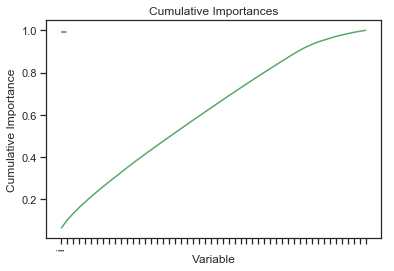

In [177]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_3rd)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_3rd]
sorted_features = [importance[0] for importance in feature_importances_3rd]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_3rd)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 99% of importance retained
plt.hlines(y = 0.99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [178]:
# Find number of features for cumulative importance of 99%
# Add 1 because Python is zero-indexed
print('Number of features for 99% importance:', np.where(cumulative_importances > 0.99)[0][0] + 1)

Number of features for 99% importance: 50


In [179]:
feature_importances_3rd[:15]

importance
RIDAGEYR               0.065668
BPQ100D_9.0            0.038799
INDFMPIR               0.029933
SEQN                   0.028726
log_tot_sugar_avg      0.025919
log_DR1TCAFF           0.025181
log_tot_b12_avg        0.023757
log_vit_d_avg          0.023565
log_tot_d_avg          0.022444
WTDRD1_x               0.022242
log_tot_fe_avg         0.022159
log_tot_alpha_c_avg    0.022062
log_tot_vit_k_avg      0.022040
log_tot_beta_c_avg     0.020866
log_tot_cu_avg         0.020625

In [180]:
print(feature_importances_3rd[:15].index)

Index(['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'log_tot_sugar_avg',
       'log_DR1TCAFF', 'log_tot_b12_avg', 'log_vit_d_avg', 'log_tot_d_avg',
       'WTDRD1_x', 'log_tot_fe_avg', 'log_tot_alpha_c_avg',
       'log_tot_vit_k_avg', 'log_tot_beta_c_avg', 'log_tot_cu_avg'],
      dtype='object')


### 4th  run (top 15 feaures)

In [181]:
# 4th  run
rfc = ensemble.RandomForestClassifier(random_state=42)
X4_feat_rev = nhanes_model_df[
    ['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'log_tot_sugar_avg',
       'log_DR1TCAFF', 'log_tot_b12_avg', 'log_vit_d_avg', 'log_tot_d_avg',
       'WTDRD1_x', 'log_tot_fe_avg', 'log_tot_alpha_c_avg',
       'log_tot_vit_k_avg', 'log_tot_beta_c_avg', 'log_tot_cu_avg']]
Y4_feat_rev = nhanes_model_df['heart_dz']

cv_4th_run = cross_val_score(rfc, X4_feat_rev, Y4_feat_rev, cv=10)
cv_4th_run

array([0.93432203, 0.93432203, 0.93630573, 0.92993631, 0.93418259,
       0.93418259, 0.93418259, 0.93418259, 0.94055202, 0.93630573])

In [182]:
print('Cross-validation mean score for 4th run: {}'.format (cv_4th_run.mean()))

Cross-validation mean score for 4th run: 0.9348474216416566


In [183]:
roc4_cv_feat_rev_score = cross_val_score(rfc, X4_feat_rev, Y4_feat_rev, cv=10, scoring= 'roc_auc')
roc4_cv_feat_rev_score

array([0.8580572 , 0.82342184, 0.76413454, 0.86499267, 0.80905425,
       0.9090176 , 0.86070381, 0.86957478, 0.89497801, 0.87507331])

In [184]:
print('ROC-AUC mean score for 4th run: {}'.format (roc4_cv_feat_rev_score.mean()))

ROC-AUC mean score for 4th run: 0.8529008014088658


In [185]:
X4_feat_rev_train, X4_feat_rev_test, Y4_feat_rev_train, Y4_feat_rev_test = train_test_split(X4_feat_rev, Y4_feat_rev, stratify=Y4_feat_rev)

In [186]:
rfc.fit(X4_feat_rev_train, Y4_feat_rev_train) 
## score testing data.
rfc_4th_feat_rev_run = rfc.score(X4_feat_rev_test, Y4_feat_rev_test)
print('Accuracy score for 4th run: {}'.format (rfc_4th_feat_rev_run))

Accuracy score for 4th run: 0.933786078098472


In [187]:
rfc4_feat_rev_predict = rfc.predict(X4_feat_rev_test)
rfc4_feat_rev_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
y_true = Y4_feat_rev_test
y_pred = rfc4_feat_rev_predict
class4_feat_rev_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification report for 4th run:')
print(class4_feat_rev_report)

Classification report for 4th run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.33      0.01      0.03        77

    accuracy                           0.93      1178
   macro avg       0.63      0.51      0.50      1178
weighted avg       0.90      0.93      0.90      1178



In [189]:
conf_4th_mat = confusion_matrix(rfc4_feat_rev_predict, Y4_feat_rev_test)

print('Confusion Matrix for 4th run')
conf_4th_mat

Confusion Matrix for 4th run


array([[1099,   76],
       [   2,    1]], dtype=int64)

#### comments on 4th run for imbalanced data (top 15 features): 

The last model run using only top 15 features produces the best results over-all. Desptie lower CV, ROC-AUC, and accuracy scores, there are noticable imporvements in the precision/recall scores and the confusion matrix. The model now correctly predicts 5 cases of the target, class 1 (heart disease).  


Cross-validation mean score for 4th run: 0.9335730864730648
ROC-AUC mean score for 4th run: 0.8498539404357377
Accuracy score for 4th run: 0.932937181663837

Classification report for 4th run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.38      0.04      0.07        77

    accuracy                           0.93      1178
   macro avg       0.66      0.52      0.52      1178
weighted avg       0.90      0.93      0.91      1178

Confusion Matrix for 4th run

array([[1096,   74],
       [   5,    3]], dtype=int64)

CV: lower
**ROC: lower**
Accuracy: lower

**Precision: IMPROVED for target**;
**Recall: IMPROVED for target**;
**F1: IMPROVED for target**;
**Confusion matrix: IMPROVED**

### dietary  run:
for this model run will remove all non-dietary variables (except 'cluster_mec') in attempt to improve model performance 

In [190]:
# dietary-only variables
rfc = ensemble.RandomForestClassifier(random_state=42)
X_diet = nhanes_model_df.drop(
    ['heart_dz', 'MCQ300A_2.0', 'MCQ300A_7.0', 'MCQ300A_9.0', 
     'MCQ365C_2.0', 'MCQ365C_9.0', 'MCQ365D_2.0', 'MCQ365D_9.0', 
     'MCQ370A_2.0', 'MCQ370A_9.0', 'MCQ370C_2.0', 'MCQ370C_9.0',
     'MCQ370D_2.0', 'MCQ370D_9.0', 'BPQ020_2.0', 'BPQ020_9.0', 
     'BPQ030_2.0', 'BPQ030_9.0', 'BPQ040A_2.0', 'BPQ040A_9.0', 
     'BPQ050A_2.0', 'BPQ050A_9.0', 'BPQ080_2.0', 'BPQ080_9.0', 
     'BPQ060_2.0', 'BPQ060_9.0', 'BPQ070_2.0', 'BPQ070_3.0', 
     'BPQ070_4.0', 'BPQ070_9.0', 'BPQ090D_2.0', 'BPQ090D_9.0', 
     'BPQ100D_2.0', 'cluster_lab', 'cluster_std', 'log_tot_kcal_avg', 
     'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_fat_avg', 
     'log_tot_mois_avg', 'log_tot_vit_a_avg', 'log_tot_lutein_avg', 
     'log_vit_b1_avg', 'log_vit_b2_avg', 'log_niac_avg', 
     'log_vit_b6_avg', 'log_vit_b12_avg', 'log_tot_folate_avg', 
     'log_folic_acid_avg', 'log_food_fol_avg', 'log_folate_dfe_avg', 
     'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 'log_se_avg', 
     'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 
     'log_calc_avg'], 1)
Y_diet = nhanes_model_df['heart_dz']

cv_diet_run = cross_val_score(rfc, X_diet, Y_diet, cv=10)
cv_diet_run

array([0.93432203, 0.93432203, 0.93630573, 0.93418259, 0.93418259,
       0.93418259, 0.93205945, 0.93630573, 0.93205945, 0.93418259])

In [191]:
print('Cross-validation mean score for diet run: {}'.format (cv_diet_run.mean()))

Cross-validation mean score for diet run: 0.9342104789664974


In [192]:
roc_diet_cv_score = cross_val_score(rfc, X_diet, Y_diet, cv=10, scoring= 'roc_auc')
roc_diet_cv_score

array([0.81976446, 0.79840538, 0.80094482, 0.88002199, 0.86396628,
       0.91840176, 0.87943548, 0.89563783, 0.88804985, 0.88493402])

In [193]:
print('ROC-AUC mean score for diet run: {}'.format (roc_diet_cv_score.mean()))

ROC-AUC mean score for diet run: 0.8629561885034235


In [194]:
X_diet_train, X_diet_test, Y_diet_train, Y_diet_test = train_test_split(X_diet, Y_diet, stratify=Y_diet)

In [195]:
rfc.fit(X_diet_train, Y_diet_train) 
## score testing data.
rfc_diet_run = rfc.score(X_diet_test, Y_diet_test)
print('Accuracy score for diet run: {}'.format (rfc_diet_run))

Accuracy score for diet run: 0.932937181663837


In [196]:
rfc_diet_predict = rfc.predict(X_diet_test)
rfc_diet_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
y_true = Y_diet_test
y_pred = rfc_diet_predict
class_diet_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for diet run:')
print(class_diet_report)

Classification Report for diet run:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1101
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1178
   macro avg       0.47      0.50      0.48      1178
weighted avg       0.87      0.93      0.90      1178



In [198]:
conf_diet_mat = confusion_matrix(rfc_diet_predict, Y_diet_test)
print('Confusion Matrix for diet run')
conf_diet_mat

Confusion Matrix for diet run


array([[1099,   77],
       [   2,    0]], dtype=int64)

#### comments on dietary run for imbalanced data (dietary-only features): 
Much like the initial run with all features, the dietary-only features model is performing poorly when measured by the precision/recall metric on the target value (class 1). The model is unable to classify the target value in a single instance. 

Cross-validation mean score for diet run: 0.9342104789664976
ROC-AUC mean score for diet run: 0.8597155225726654
Accuracy score for diet run: 0.934634974533107

Classification Report for diet run:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1101
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1178
   macro avg       0.47      0.50      0.48      1178
weighted avg       0.87      0.93      0.90      1178

Confusion Matrix for diet run

array([[1101,   77],
       [   0,    0]], dtype=int64)

### feature-tuning, dietary-only

In [199]:
feature_importances_diet = pd.DataFrame(rfc.feature_importances_,
                                   index = X_diet_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_diet

importance
RIDAGEYR                0.075277
BPQ100D_9.0             0.063357
INDFMPIR                0.033013
SEQN                    0.031870
log_tot_sugar_avg       0.027223
WTDRD1_x                0.026906
log_tot_b12_avg         0.023994
log_tot_fe_avg          0.022779
log_tot_retinol_avg     0.021871
log_tot_d_avg           0.021849
log_tot_phos_avg        0.021177
log_DR1TCAFF            0.021077
log_tot_lyco_avg        0.020818
log_tot_beta_cry_avg    0.020654
log_tot_beta_c_avg      0.020419
log_tot_fiber_avg       0.019999
log_tot_alpha_c_avg     0.019902
log_tot_c_avg           0.019546
log_tot_mfat_avg        0.019263
log_tot_na_avg          0.019201
log_tot_calc_avg        0.019138
log_tot_b6_avg          0.019102
log_tot_b1_avg          0.018989
log_tot_vit_k_avg       0.018894
log_tot_sfat_avg        0.018839
log_tot_niac_avg        0.018509
log_tot_fchol_avg       0.018364
log_vit_d_avg           0.018291
log_tot_cu_avg          0.018260
log_tot_vit_e_avg       0.018123
cluster_mec             0.017866
log_tot_choline_avg     0.017706
log_tot_h20_avg         0.017627
log_tot_pfat_avg        0.017491
log_folate_avg          0.017090
log_tot_b2_avg          0.016919
log_tot_zn_avg          0.016636
log_tot_se_avg          0.016545
WTDR2D_x                0.016508
log_tot_mag_avg         0.016278
log_tot_k_avg           0.015483
DRQSPREP_1.0            0.007925
RIAGENDR                0.006115
DRQSDIET_2.0            0.005804
DRQSDIET_1.0            0.005540
DRQSPREP_4.0            0.004256
DS1DS_2.0               0.003823
DS1DS_1.0               0.003575
DS2DS_1.0               0.003318
DR2STY_1.0              0.003078
DBD100_2.0              0.003005
DBD100_1.0              0.002705
DR1STY_2.0              0.002668
DRQSPREP_3.0            0.002582
DS2DS_2.0               0.002571
DR2STY_9.0              0.002524
DR2STY_2.0              0.002520
DRQSPREP_2.0            0.002476
DS1AN_1.0               0.002186
DBD100_3.0              0.002142
DR1STY_1.0              0.002067
DS2AN_2.0               0.001774
DS1AN_2.0               0.001515
DS2AN_1.0               0.001015
DRQSPREP_9.0            0.000893
DRQSDIET_9.0            0.000699
DR1STY_9.0              0.000370
DBD100_9.0              0.000000

Text(0.5, 1.0, 'Cumulative Importances')

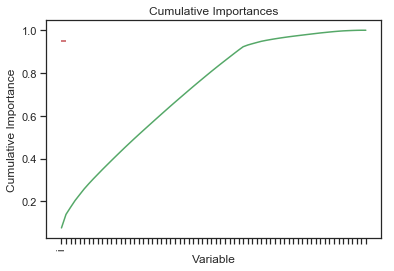

In [200]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_diet)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_diet]
sorted_features = [importance[0] for importance in feature_importances_diet]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_diet)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [201]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 46


In [202]:
feature_importances_diet[:46]

importance
RIDAGEYR                0.075277
BPQ100D_9.0             0.063357
INDFMPIR                0.033013
SEQN                    0.031870
log_tot_sugar_avg       0.027223
WTDRD1_x                0.026906
log_tot_b12_avg         0.023994
log_tot_fe_avg          0.022779
log_tot_retinol_avg     0.021871
log_tot_d_avg           0.021849
log_tot_phos_avg        0.021177
log_DR1TCAFF            0.021077
log_tot_lyco_avg        0.020818
log_tot_beta_cry_avg    0.020654
log_tot_beta_c_avg      0.020419
log_tot_fiber_avg       0.019999
log_tot_alpha_c_avg     0.019902
log_tot_c_avg           0.019546
log_tot_mfat_avg        0.019263
log_tot_na_avg          0.019201
log_tot_calc_avg        0.019138
log_tot_b6_avg          0.019102
log_tot_b1_avg          0.018989
log_tot_vit_k_avg       0.018894
log_tot_sfat_avg        0.018839
log_tot_niac_avg        0.018509
log_tot_fchol_avg       0.018364
log_vit_d_avg           0.018291
log_tot_cu_avg          0.018260
log_tot_vit_e_avg       0.018123
cluster_mec             0.017866
log_tot_choline_avg     0.017706
log_tot_h20_avg         0.017627
log_tot_pfat_avg        0.017491
log_folate_avg          0.017090
log_tot_b2_avg          0.016919
log_tot_zn_avg          0.016636
log_tot_se_avg          0.016545
WTDR2D_x                0.016508
log_tot_mag_avg         0.016278
log_tot_k_avg           0.015483
DRQSPREP_1.0            0.007925
RIAGENDR                0.006115
DRQSDIET_2.0            0.005804
DRQSDIET_1.0            0.005540
DRQSPREP_4.0            0.004256

In [203]:
print(feature_importances_diet[:15].index)

Index(['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'log_tot_sugar_avg',
       'WTDRD1_x', 'log_tot_b12_avg', 'log_tot_fe_avg', 'log_tot_retinol_avg',
       'log_tot_d_avg', 'log_tot_phos_avg', 'log_DR1TCAFF', 'log_tot_lyco_avg',
       'log_tot_beta_cry_avg', 'log_tot_beta_c_avg'],
      dtype='object')


In [204]:
rfc = ensemble.RandomForestClassifier(random_state=42)
X2_diet = nhanes_model_df[['RIDAGEYR', 'BPQ100D_9.0', 'INDFMPIR', 'SEQN', 'log_tot_sugar_avg',
       'WTDRD1_x', 'log_tot_b12_avg', 'log_tot_fe_avg', 'log_tot_retinol_avg',
       'log_tot_d_avg', 'log_tot_phos_avg', 'log_DR1TCAFF', 'log_tot_lyco_avg',
       'log_tot_beta_cry_avg', 'log_tot_beta_c_avg']] 
Y2_diet = nhanes_model_df['heart_dz']

In [205]:
cv2_diet_run = cross_val_score(rfc, X2_diet, Y2_diet, cv=10)
cv2_diet_run

array([0.93432203, 0.93220339, 0.93630573, 0.93205945, 0.93418259,
       0.93630573, 0.93418259, 0.93205945, 0.93205945, 0.93205945])

In [206]:
print('Cross-validation mean score for 2nd diet run: {}'.format (cv2_diet_run.mean()))

Cross-validation mean score for 2nd diet run: 0.9335739861096117


In [207]:
roc2_diet_cv_score = cross_val_score(rfc, X2_diet, Y2_diet, cv=10, scoring= 'roc_auc')
roc2_diet_cv_score

array([0.83432083, 0.79668642, 0.76980348, 0.84677419, 0.86851173,
       0.88559384, 0.85208944, 0.87826246, 0.87672287, 0.87514663])

In [208]:
print('ROC-AUC mean score for 2nd diet run: {}'.format (roc2_diet_cv_score.mean()))

ROC-AUC mean score for 2nd diet run: 0.8483911891573183


In [209]:
X2_diet_train, X2_diet_test, Y2_diet_train, Y2_diet_test = train_test_split(X2_diet, Y2_diet, stratify=Y2_diet)

In [210]:
rfc.fit(X2_diet_train, Y2_diet_train) 
## score testing data.
rfc_2diet = rfc.score(X2_diet_test, Y2_diet_test)
print('Accuracy score for 2nd diet run: {}'.format (rfc_2diet))

Accuracy score for 2nd diet run: 0.9363327674023769


In [211]:
rfc_2diet_predict = rfc.predict(X2_diet_test)
rfc_2diet_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
y_true = Y2_diet_test
y_pred = rfc_2diet_predict
class2_diet_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification report for 2nd diet run:')
print(class2_diet_report)

Classification report for 2nd diet run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.75      0.04      0.07        77

    accuracy                           0.94      1178
   macro avg       0.84      0.52      0.52      1178
weighted avg       0.92      0.94      0.91      1178



In [213]:
conf_2diet_mat = confusion_matrix(rfc_2diet_predict, Y2_diet_test)
print('Confusion Matrix for 2nd diet run')
conf_2diet_mat

Confusion Matrix for 2nd diet run


array([[1100,   74],
       [   1,    3]], dtype=int64)

#### comments on 2nd dietary run for imbalanced data (dietary-only features, tuned): 
As previously, there are fluctions in the accuracy scores, but they don't appear to be significant. There is no improvement in the precision/recall score for the target value(class 1)with feature tuning. The "dietary-only" feature set does not provide any improvemnet to the model and will be discarded.  

Cross-validation mean score for 2nd diet run: 0.9337863003346648
ROC-AUC mean score for 2nd diet run: 0.846232713352529
Accuracy score for 2nd diet run: 0.933786078098472

Classification report for 2nd diet run:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1101
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1178
   macro avg       0.47      0.50      0.48      1178
weighted avg       0.87      0.93      0.90      1178

Confusion Matrix for 2nd diet run

array([[1100,   77],
       [   1,    0]], dtype=int64)

### compare scores, imbalanced class models

#### best metrics for first 4 runs:

Cross-validation mean score for 2nd run: 0.9348474216416568
ROC-AUC mean score for initial run: 0.8729168384525527
Accuracy score for initial run: 0.934634974533107

Precision for initial run: 0.00
              2nd run: 0.50
              3rd run: 0.50
              4th run: 0.38
              
**Recall** for initial run: 0.00
            2nd run: 0.01
            3rd run: 0.01
            **4th run: 0.04**
            
            
**F1** for initial run: 0.00
        2nd run: 0.03
        3rd run: 0.03
        **4th run: 0.07**
        
for Recall:
macro avg initial run: 0.50 
            2nd run: 0.51        
            3rd run: 0.51
            **4th run: 0.52**
            
weighted avg initial run: 0.93
                2nd run: 0.93   
                3rd run: 0.93
                4th run: 0.93

for F1:
macro avg initial run: 0.48
            2nd run: 0.50  
            3rd run: 0.50
            **4th run: 0.52**
            
weighted avg initial run: 0.90
                2nd run: 0.90
                3rd run: 0.90
                **4th run: 0.91**
                
Confusion Matrix for 4th run

array([[1096,   74],
       [   5,    3]], dtype=int64)

#### comments on best run for imbalanced data: 
Based on metrics for Recall and F1-score (as above), will use 4th run (top 15 features) as best run for model after feature-tuning. Will carry this feature set forward to tune hyperparameters. 

## tuning hyperparameters on imbalanced class model 

In [214]:
from pprint import pprint
# Look at parameters used by current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [215]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

#### comments: optimize for sensitivity with the scoring argument

First build a generic classifier and setup a parameter grid; random forests have many tunable parameters. The *scorers* dictionary can be used as the *scoring* argument in *RandomizedSearchCV*. When multiple scores are passed, *RandomizedSearchCV.cv_results_ *will return scoring metrics for each of the score types provided.

https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

In [216]:
rfc = ensemble.RandomForestClassifier(random_state=42)

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [217]:
def grid_search_wrapper(refit_score='recall_score'):
    #fits a RandomizedSearchCV classifier using refit_score for optimization
    #prints classifier performance metrics
   
    skf = StratifiedKFold(n_splits=10)
    grid_search = RandomizedSearchCV(rfc, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X4_feat_rev_train.values, Y4_feat_rev_train.values)

    # make the predictions
    y_pred = grid_search.predict(X4_feat_rev_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(Y4_feat_rev_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [218]:
grid_search_rfc = grid_search_wrapper(refit_score='recall_score')
grid_search_rfc

Best params for recall_score
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      1101         0
pos        77         0


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_s...
                     

In [219]:
results = pd.DataFrame(grid_search_rfc.cv_results_)
results = results.sort_values(by='mean_test_recall_score', 
                              ascending=False)

results[['mean_test_precision_score', 
         'mean_test_recall_score', 
         'mean_test_accuracy_score', 
         'param_max_depth', 
         'param_max_features', 
         'param_min_samples_split', 
         'param_n_estimators']].round(3).head()

mean_test_precision_score  mean_test_recall_score  \
1                        0.1                   0.004   
3                        0.1                   0.004   
4                        0.1                   0.004   
0                        0.0                   0.000   
2                        0.0                   0.000   

   mean_test_accuracy_score param_max_depth param_max_features  \
1                     0.935               9               sqrt   
3                     0.934              10               sqrt   
4                     0.934               9               sqrt   
0                     0.934               9               auto   
2                     0.934               6               sqrt   

  param_min_samples_split param_n_estimators  
1                       2                200  
3                       5               2000  
4                       2                400  
0                       5                200  
2                       5                200

#### comment: hyperparameter tuning shows TWO "Best"  parameters for recall_score
#### first "best  params"
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': True}

In [220]:
base_model = ensemble.RandomForestClassifier(random_state = 42, 
                                             n_estimators = 200,
                                             min_samples_split = 2,
                                             min_samples_leaf = 2,
                                             max_features = 'sqrt',
                                             max_depth = 8,
                                             bootstrap = True)
base_model.fit(X4_feat_rev_train, Y4_feat_rev_train)
base4_score = base_accuracy = base_model.score(X4_feat_rev_test, Y4_feat_rev_test)
print('Accuracy score for hyperparameter-tuned 4th model run: {}'.format (base4_score))

Accuracy score for hyperparameter-tuned 4th model run: 0.934634974533107


In [221]:
cv_4_hp_tuned_run = cross_val_score(base_model, X4_feat_rev_train, Y4_feat_rev_train, cv=10)

print('Cross-validation mean score for hyperparameter-tuned 4th model run: {}'.format (cv_4_hp_tuned_run
.mean()))

Cross-validation mean score for hyperparameter-tuned 4th model run: 0.9343528432643524


In [222]:
roc_4_hp_tuned_score = cross_val_score(base_model, X4_feat_rev_train, Y4_feat_rev_train, cv=10, scoring= 'roc_auc')

print('ROC-AUC mean score for hyperparameter-tuned 4th model run: {}'.format (roc_4_hp_tuned_score
.mean()))


ROC-AUC mean score for hyperparameter-tuned 4th model run: 0.864080067388717


In [223]:
base_model_hp_tuned_predict = base_model.predict(X4_feat_rev_test)

y_true = Y4_feat_rev_test
y_pred = base_model_hp_tuned_predict
class_hp_tuned_report = classification_report(y_true, y_pred, labels=[0, 1])
print(class_hp_tuned_report)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1101
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1178
   macro avg       0.47      0.50      0.48      1178
weighted avg       0.87      0.93      0.90      1178



C:\Users\katec\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Second set of best parameters
Best params for recall_score
{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

In [ ]:
base_model = ensemble.RandomForestClassifier(random_state = 42, 
                                             n_estimators = 1800,
                                             min_samples_split = 5,
                                             min_samples_leaf = 1,
                                             max_features = 'auto',
                                             max_depth = None,
                                             bootstrap = False)
base_model.fit(X4_feat_rev_train, Y4_feat_rev_train)
base4_score = base_accuracy = base_model.score(X4_feat_rev_test, Y4_feat_rev_test)
print('Accuracy score for hyperparameter-tuned 4th model run: {}'.format (base4_score))

In [ ]:
cv_4_hp_tuned_run = cross_val_score(base_model, X4_feat_rev_train, Y4_feat_rev_train, cv=10)

print('Cross-validation mean score for hyperparameter-tuned 4th model run: {}'.format (cv_4_hp_tuned_run
.mean()))

In [ ]:
roc_4_hp_tuned_score = cross_val_score(base_model, X4_feat_rev_train, Y4_feat_rev_train, cv=10, scoring= 'roc_auc')

print('ROC-AUC mean score for hyperparameter-tuned 4th model run: {}'.format (roc_4_hp_tuned_score
.mean()))

In [ ]:
base_model_hp2_tuned_predict = base_model.predict(X4_feat_rev_test)

y_true = Y4_feat_rev_test
y_pred = base_model_hp2_tuned_predict
class_hp2_tuned_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for hyperparameter-tuned run:')
print(class_hp2_tuned_report)

In [ ]:
conf_hp_mat = confusion_matrix(base_model_hp2_tuned_predict, Y4_feat_rev_test)

print('Confusion Matrix for hyperparameter-tuned run')
conf_hp_mat

#### comments on best run for imbalanced data (top 15 features) with hyperparameters tuned: 
After tuning hyperparameters with the goal of improving recall and F1-scores, both metrics have improved. All other metrics are similar to previous runs with small plus/minus fluctuations. 

Accuracy score for hyperparameter-tuned 4th model run: 0.9354838709677419
Cross-validation mean score for hyperparameter-tuned 4th model run: 0.933785470783118
ROC-AUC mean score for hyperparameter-tuned 4th model run: 0.852894032934096

Classification Report for hyperparameter-tuned run:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1101
           1       0.56      0.06      0.12        77

    accuracy                           0.94      1178
   macro avg       0.75      0.53      0.54      1178
weighted avg       0.91      0.94      0.91      1178

Confusion Matrix for hyperparameter-tuned run

array([[1097,   72],
       [   4,    5]], dtype=int64)


#### comment: best model run (4th run) with tuned hyperparameters does perform marginally better than untuned model; recall and F1 scores are improved. 

## balance data  

### using SMOTE to balance data classes
smote only on training
feed the supervised model

In [224]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from numpy import mean

class imblearn.over_sampling.SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated', out_step='deprecated', kind='deprecated', svm_estimator='deprecated', n_jobs=1, ratio=None)

### initial SMOTE run

In [286]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X_res = nhanes_model_df.drop(
    ['log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 
     'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 
     'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg', 
     'log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 
     'log_folate_dfe_avg', 'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 
     'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 
     'log_cu_avg', 'log_calc_avg', 'heart_dz'], axis=1)
y_res = nhanes_model_df['heart_dz']

In [287]:
# summarize class distribution
counter = Counter(y_res)
print(counter)

Counter({0: 4403, 1: 309})


In [288]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, stratify=y_res)

In [289]:
# transform the dataset
oversample = SMOTE()
X_1res_train, y_1res_train = oversample.fit_resample(X_res_train, y_res_train)

In [290]:
# summarize class distribution (SMOTE)
counter = Counter(y_1res_train)
print(counter)

Counter({0: 3302, 1: 3302})


In [291]:
rfc = ensemble.RandomForestClassifier(random_state=42)
cv_res_run = cross_val_score(rfc, X_1res_train, y_1res_train, cv=10)
cv_res_run

array([0.79878971, 0.97428139, 0.98789713, 0.97730711, 0.97727273,
       0.98939394, 0.97575758, 0.98484848, 0.98333333, 0.97727273])

In [292]:
print('Cross-validation mean score for balanced data initial run: {}'.format (cv_res_run.mean()))

Cross-validation mean score for balanced data initial run: 0.9626154128272131


In [293]:
roc_cv_res_score = cross_val_score(rfc, X_1res_train, y_1res_train, cv=10, scoring= 'roc_auc')
roc_cv_res_score

array([0.96788428, 0.99915316, 0.99989014, 0.99975739, 0.99957759,
       0.99971534, 0.99896235, 0.99982094, 0.99947658, 0.99935721])

In [294]:
print('ROC-AUC mean score for balanced data initial run: {}'.format (roc_cv_res_score.mean()))

ROC-AUC mean score for balanced data initial run: 0.9963594985837503


In [295]:
rfc.fit(X_1res_train, y_1res_train) 
## score testing data.
rfc_res_run = rfc.score(X_res_test, y_res_test)
print('Accuracy score for balanced data initial run: {}'.format (rfc_res_run))

Accuracy score for balanced data initial run: 0.9269949066213922


In [296]:
rfc1_res_predict = rfc.predict(X_res_test)
rfc1_res_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [297]:
y_res_true = y_res_test
y_res_pred = rfc1_res_predict
class1_res_report = classification_report(y_res_true, y_res_pred, labels=[0, 1])
print('Classification report for balanced data initial run:')
print(class1_res_report)

Classification report for balanced data initial run:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1101
           1       0.41      0.26      0.32        77

    accuracy                           0.93      1178
   macro avg       0.68      0.62      0.64      1178
weighted avg       0.91      0.93      0.92      1178



In [298]:
conf_res_mat = confusion_matrix(rfc1_res_predict, y_res_test)

print('Confusion Matrix for balanced data initial run')
conf_res_mat

Confusion Matrix for balanced data initial run


array([[1072,   57],
       [  29,   20]], dtype=int64)

#### comments on initial SMOTE run with balanced data: 
Focusing on the metrics of recall and F1-score, the model run with SMOTE-balanced data is performing much better than all of the imbalanced data models, including the model with tuned hyperparameters. The confusion matrix indicates that the model correctly identified 15 class 1 cases. 
The CV score and ROC-AUC score are also improved. 

Accuracy score for balanced data initial run: 0.9202037351443124
Cross-validation mean score for balanced data initial run: 0.9624189543385295
ROC-AUC mean score for balanced data initial run: 0.9202037351443124

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1104
           1       0.36      0.34      0.35        74

    accuracy                           0.92      1178
   macro avg       0.66      0.65      0.65      1178
weighted avg       0.92      0.92      0.92      1178

Confusion Matrix for balanced data initial run

array([[1061,   62],
       [  40,   15]], dtype=int64)

### feature-tuning

In [299]:
feature_importances_res = pd.DataFrame(rfc.feature_importances_,
                                   index = X_1res_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_res

importance
BPQ100D_9.0             0.111901
BPQ030_9.0              0.074455
BPQ050A_9.0             0.074178
RIDAGEYR                0.061846
BPQ020_2.0              0.041251
BPQ090D_2.0             0.036383
BPQ040A_9.0             0.035292
DS1DS_2.0               0.032931
BPQ080_2.0              0.025719
BPQ070_9.0              0.025302
DRQSPREP_4.0            0.016777
RIAGENDR                0.016166
INDFMPIR                0.015631
BPQ090D_9.0             0.014701
DS2DS_2.0               0.013530
MCQ365C_2.0             0.012257
MCQ300A_2.0             0.012017
SEQN                    0.011740
cluster_mec             0.011622
BPQ100D_2.0             0.011029
MCQ370C_2.0             0.010641
MCQ365D_2.0             0.009563
WTDRD1_x                0.008809
MCQ300A_9.0             0.008192
DRQSDIET_2.0            0.008149
log_tot_fiber_avg       0.008054
DRQSPREP_3.0            0.008014
WTDR2D_x                0.007634
log_tot_h20_avg         0.007520
MCQ370A_2.0             0.007357
log_tot_alpha_c_avg     0.006962
log_tot_sugar_avg       0.006822
log_tot_vit_k_avg       0.006816
log_tot_d_avg           0.006650
log_tot_na_avg          0.006568
log_DR1TCAFF            0.006513
log_tot_c_avg           0.006486
log_tot_calc_avg        0.006449
log_tot_beta_c_avg      0.006378
log_tot_lyco_avg        0.006216
log_tot_se_avg          0.006200
BPQ070_2.0              0.006194
log_tot_b12_avg         0.006107
log_vit_d_avg           0.005999
log_tot_b6_avg          0.005913
log_tot_pfat_avg        0.005893
log_folate_avg          0.005843
log_tot_beta_cry_avg    0.005829
log_tot_cu_avg          0.005597
log_tot_b1_avg          0.005505
log_tot_retinol_avg     0.005450
log_tot_zn_avg          0.005395
log_tot_b2_avg          0.005375
log_tot_mag_avg         0.005340
log_tot_mfat_avg        0.005309
BPQ060_9.0              0.005133
log_tot_phos_avg        0.005096
log_tot_fchol_avg       0.005096
log_tot_sfat_avg        0.005052
log_tot_k_avg           0.005035
log_tot_choline_avg     0.004976
log_tot_fe_avg          0.004847
log_tot_vit_e_avg       0.004821
log_tot_niac_avg        0.004779
BPQ030_2.0              0.004521
MCQ370D_2.0             0.003968
DS1DS_1.0               0.003890
DBD100_2.0              0.003669
DR2STY_2.0              0.003589
BPQ020_9.0              0.003563
DS2DS_1.0               0.003526
DBD100_3.0              0.003451
BPQ070_3.0              0.003329
DBD100_1.0              0.003129
BPQ050A_2.0             0.003006
BPQ060_2.0              0.002935
DR1STY_1.0              0.002342
DRQSPREP_2.0            0.002293
DR1STY_2.0              0.002174
DRQSDIET_1.0            0.001993
MCQ365C_9.0             0.001869
BPQ040A_2.0             0.001726
DRQSPREP_1.0            0.001413
BPQ080_9.0              0.001134
DS2AN_2.0               0.001015
DR2STY_1.0              0.000895
MCQ370D_9.0             0.000813
DRQSPREP_9.0            0.000687
MCQ365D_9.0             0.000614
DS1AN_2.0               0.000529
DS2AN_1.0               0.000468
BPQ070_4.0              0.000454
MCQ370C_9.0             0.000444
DS1AN_1.0               0.000365
MCQ370A_9.0             0.000347
DR1STY_9.0              0.000173
DR2STY_9.0              0.000157
DRQSDIET_9.0            0.000153
cluster_lab             0.000031
cluster_std             0.000024
DBD100_9.0              0.000005
MCQ300A_7.0             0.000000

Text(0.5, 1.0, 'Cumulative Importances')

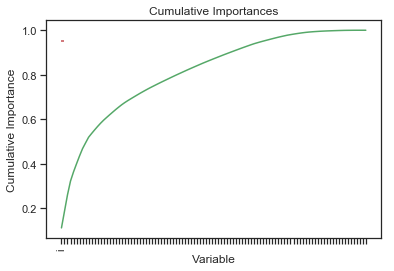

In [300]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_res)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_res]
sorted_features = [importance[0] for importance in feature_importances_res]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_res)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [301]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)


Number of features for 95% importance: 68


In [302]:
feature_importances_res[:68]

importance
BPQ100D_9.0             0.111901
BPQ030_9.0              0.074455
BPQ050A_9.0             0.074178
RIDAGEYR                0.061846
BPQ020_2.0              0.041251
BPQ090D_2.0             0.036383
BPQ040A_9.0             0.035292
DS1DS_2.0               0.032931
BPQ080_2.0              0.025719
BPQ070_9.0              0.025302
DRQSPREP_4.0            0.016777
RIAGENDR                0.016166
INDFMPIR                0.015631
BPQ090D_9.0             0.014701
DS2DS_2.0               0.013530
MCQ365C_2.0             0.012257
MCQ300A_2.0             0.012017
SEQN                    0.011740
cluster_mec             0.011622
BPQ100D_2.0             0.011029
MCQ370C_2.0             0.010641
MCQ365D_2.0             0.009563
WTDRD1_x                0.008809
MCQ300A_9.0             0.008192
DRQSDIET_2.0            0.008149
log_tot_fiber_avg       0.008054
DRQSPREP_3.0            0.008014
WTDR2D_x                0.007634
log_tot_h20_avg         0.007520
MCQ370A_2.0             0.007357
log_tot_alpha_c_avg     0.006962
log_tot_sugar_avg       0.006822
log_tot_vit_k_avg       0.006816
log_tot_d_avg           0.006650
log_tot_na_avg          0.006568
log_DR1TCAFF            0.006513
log_tot_c_avg           0.006486
log_tot_calc_avg        0.006449
log_tot_beta_c_avg      0.006378
log_tot_lyco_avg        0.006216
log_tot_se_avg          0.006200
BPQ070_2.0              0.006194
log_tot_b12_avg         0.006107
log_vit_d_avg           0.005999
log_tot_b6_avg          0.005913
log_tot_pfat_avg        0.005893
log_folate_avg          0.005843
log_tot_beta_cry_avg    0.005829
log_tot_cu_avg          0.005597
log_tot_b1_avg          0.005505
log_tot_retinol_avg     0.005450
log_tot_zn_avg          0.005395
log_tot_b2_avg          0.005375
log_tot_mag_avg         0.005340
log_tot_mfat_avg        0.005309
BPQ060_9.0              0.005133
log_tot_phos_avg        0.005096
log_tot_fchol_avg       0.005096
log_tot_sfat_avg        0.005052
log_tot_k_avg           0.005035
log_tot_choline_avg     0.004976
log_tot_fe_avg          0.004847
log_tot_vit_e_avg       0.004821
log_tot_niac_avg        0.004779
BPQ030_2.0              0.004521
MCQ370D_2.0             0.003968
DS1DS_1.0               0.003890
DBD100_2.0              0.003669

In [303]:
print(feature_importances_res[:68].index)

Index(['BPQ100D_9.0', 'BPQ030_9.0', 'BPQ050A_9.0', 'RIDAGEYR', 'BPQ020_2.0',
       'BPQ090D_2.0', 'BPQ040A_9.0', 'DS1DS_2.0', 'BPQ080_2.0', 'BPQ070_9.0',
       'DRQSPREP_4.0', 'RIAGENDR', 'INDFMPIR', 'BPQ090D_9.0', 'DS2DS_2.0',
       'MCQ365C_2.0', 'MCQ300A_2.0', 'SEQN', 'cluster_mec', 'BPQ100D_2.0',
       'MCQ370C_2.0', 'MCQ365D_2.0', 'WTDRD1_x', 'MCQ300A_9.0', 'DRQSDIET_2.0',
       'log_tot_fiber_avg', 'DRQSPREP_3.0', 'WTDR2D_x', 'log_tot_h20_avg',
       'MCQ370A_2.0', 'log_tot_alpha_c_avg', 'log_tot_sugar_avg',
       'log_tot_vit_k_avg', 'log_tot_d_avg', 'log_tot_na_avg', 'log_DR1TCAFF',
       'log_tot_c_avg', 'log_tot_calc_avg', 'log_tot_beta_c_avg',
       'log_tot_lyco_avg', 'log_tot_se_avg', 'BPQ070_2.0', 'log_tot_b12_avg',
       'log_vit_d_avg', 'log_tot_b6_avg', 'log_tot_pfat_avg', 'log_folate_avg',
       'log_tot_beta_cry_avg', 'log_tot_cu_avg', 'log_tot_b1_avg',
       'log_tot_retinol_avg', 'log_tot_zn_avg', 'log_tot_b2_avg',
       'log_tot_mag_avg', 'log_tot_mfa

### 2nd SMOTE run

In [304]:
rfc = ensemble.RandomForestClassifier(random_state=42)
X_2res = nhanes_model_df[
    ['BPQ100D_9.0', 'BPQ030_9.0', 'BPQ050A_9.0', 'RIDAGEYR', 'BPQ020_2.0',
       'BPQ090D_2.0', 'BPQ040A_9.0', 'DS1DS_2.0', 'BPQ080_2.0', 'BPQ070_9.0',
       'DRQSPREP_4.0', 'RIAGENDR', 'INDFMPIR', 'BPQ090D_9.0', 'DS2DS_2.0',
       'MCQ365C_2.0', 'MCQ300A_2.0', 'SEQN', 'cluster_mec', 'BPQ100D_2.0',
       'MCQ370C_2.0', 'MCQ365D_2.0', 'WTDRD1_x', 'MCQ300A_9.0', 'DRQSDIET_2.0',
       'log_tot_fiber_avg', 'DRQSPREP_3.0', 'WTDR2D_x', 'log_tot_h20_avg',
       'MCQ370A_2.0', 'log_tot_alpha_c_avg', 'log_tot_sugar_avg',
       'log_tot_vit_k_avg', 'log_tot_d_avg', 'log_tot_na_avg', 'log_DR1TCAFF',
       'log_tot_c_avg', 'log_tot_calc_avg', 'log_tot_beta_c_avg',
       'log_tot_lyco_avg', 'log_tot_se_avg', 'BPQ070_2.0', 'log_tot_b12_avg',
       'log_vit_d_avg', 'log_tot_b6_avg', 'log_tot_pfat_avg', 'log_folate_avg',
       'log_tot_beta_cry_avg', 'log_tot_cu_avg', 'log_tot_b1_avg',
       'log_tot_retinol_avg', 'log_tot_zn_avg', 'log_tot_b2_avg',
       'log_tot_mag_avg', 'log_tot_mfat_avg', 'BPQ060_9.0', 'log_tot_phos_avg',
       'log_tot_fchol_avg', 'log_tot_sfat_avg', 'log_tot_k_avg',
       'log_tot_choline_avg', 'log_tot_fe_avg', 'log_tot_vit_e_avg',
       'log_tot_niac_avg', 'BPQ030_2.0', 'MCQ370D_2.0', 'DS1DS_1.0',
       'DBD100_2.0']] 
Y_2res = nhanes_model_df['heart_dz']


In [305]:
# summarize class distribution
counter = Counter(y_res)
print(counter)

Counter({0: 4403, 1: 309})


In [306]:
X2r_train, X2r_test, y2r_train, y2r_test = train_test_split(X_2res, Y_2res, stratify=Y_2res)

In [307]:
# transform the dataset
oversample = SMOTE()
X_2res_train, y_2res_train = oversample.fit_resample(X2r_train, y2r_train)

# summarize class distribution (SMOTE)
counter = Counter(y_2res_train)
print(counter)

Counter({0: 3302, 1: 3302})


In [308]:
cv_2res_run = cross_val_score(rfc, X_2res_train, y_2res_train, cv=10)
cv_2res_run

array([0.82299546, 0.97881997, 0.96974281, 0.97428139, 0.96969697,
       0.96818182, 0.98181818, 0.97878788, 0.98484848, 0.98181818])

In [309]:
print('Cross-validation mean score for balanced data 2nd run: {}'.format (cv_2res_run.mean()))

Cross-validation mean score for balanced data 2nd run: 0.9610991152065284


In [310]:
roc_cv_2res_score = cross_val_score(rfc, X_2res_train, y_2res_train, cv=10, scoring= 'roc_auc')
roc_cv_2res_score

array([0.9565092 , 0.99902499, 0.99833379, 0.99817358, 0.99839761,
       0.99708448, 0.99950413, 0.99937098, 0.99950413, 0.999573  ])

In [311]:
print('ROC-AUC mean score for balanced data 2nd run: {}'.format (roc_cv_2res_score.mean()))

ROC-AUC mean score for balanced data 2nd run: 0.9945475907107326


In [312]:
rfc.fit(X_2res_train, y_2res_train) 
## score testing data.
rfc_2res_initial = rfc.score(X2r_test, y2r_test)
print('Accuracy score for balanced data 2nd run: {}'.format (rfc_2res_initial))

Accuracy score for balanced data 2nd run: 0.9227504244482173


In [313]:
rfc2_predict = rfc.predict(X2r_test)
rfc2_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [314]:
y_true = y2r_test
y_pred = rfc2_predict
class2_balanced_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification report for balanced data 2nd run:')
print(class2_balanced_report)

Classification report for balanced data 2nd run:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1101
           1       0.37      0.26      0.31        77

    accuracy                           0.92      1178
   macro avg       0.66      0.61      0.63      1178
weighted avg       0.91      0.92      0.92      1178



In [315]:
conf_2res_mat = confusion_matrix(rfc2_predict, y2r_test)

print('Confusion Matrix for balanced data 2nd run')
conf_2res_mat

Confusion Matrix for balanced data 2nd run


array([[1067,   57],
       [  34,   20]], dtype=int64)

#### comments on 2nd run with balanced data 
Model appears to perform slightly worse with current feature set. Both recall and F1-scores dropped by 0.01 and the correctly identified class 1 cases dropped by 1. 

Cross-validation mean score for balanced data 2nd run: 0.9629147755925367
ROC-AUC mean score for balanced data 2nd run: 0.9956948737581804
Accuracy score for balanced data 2nd run: 0.9049235993208828

Classification report for balanced data 2nd run:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1101
           1       0.22      0.18      0.20        77

    accuracy                           0.90      1178
   macro avg       0.58      0.57      0.57      1178
weighted avg       0.90      0.90      0.90      1178

Confusion Matrix for balanced data 2nd run

array([[1052,   63],
       [  49,   14]], dtype=int64)

### feature-tuning

In [316]:
feature_importances_2res = pd.DataFrame(rfc.feature_importances_,
                                   index = X_2res_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_2res

importance
BPQ100D_9.0             0.164088
BPQ030_9.0              0.052268
RIDAGEYR                0.051967
BPQ050A_9.0             0.051533
BPQ040A_9.0             0.049443
BPQ090D_2.0             0.037425
DS1DS_2.0               0.032776
MCQ365C_2.0             0.030298
BPQ020_2.0              0.030200
INDFMPIR                0.022616
BPQ080_2.0              0.021758
BPQ090D_9.0             0.020451
MCQ365D_2.0             0.018594
BPQ070_9.0              0.017343
RIAGENDR                0.015978
cluster_mec             0.015186
DRQSPREP_4.0            0.012572
MCQ300A_2.0             0.012438
SEQN                    0.011883
log_DR1TCAFF            0.011690
MCQ370C_2.0             0.010151
WTDRD1_x                0.010143
log_tot_c_avg           0.010081
BPQ100D_2.0             0.009865
DRQSDIET_2.0            0.009581
log_tot_h20_avg         0.009185
log_tot_alpha_c_avg     0.009056
DS2DS_2.0               0.008961
BPQ060_9.0              0.008614
MCQ370A_2.0             0.008465
log_tot_d_avg           0.008332
log_tot_lyco_avg        0.008280
log_tot_se_avg          0.008217
WTDR2D_x                0.008102
log_tot_fiber_avg       0.008086
MCQ300A_9.0             0.007237
log_tot_na_avg          0.007141
log_vit_d_avg           0.006648
log_tot_beta_c_avg      0.006643
log_tot_b1_avg          0.006570
log_tot_beta_cry_avg    0.006532
log_folate_avg          0.006260
log_tot_pfat_avg        0.006254
log_tot_sugar_avg       0.006158
log_tot_sfat_avg        0.006044
log_tot_b12_avg         0.006026
log_tot_vit_k_avg       0.005996
log_tot_mag_avg         0.005994
DRQSPREP_3.0            0.005945
log_tot_b6_avg          0.005811
DS1DS_1.0               0.005809
log_tot_fchol_avg       0.005797
log_tot_vit_e_avg       0.005754
log_tot_b2_avg          0.005684
log_tot_cu_avg          0.005553
log_tot_retinol_avg     0.005549
log_tot_calc_avg        0.005394
log_tot_k_avg           0.005304
log_tot_fe_avg          0.005287
log_tot_mfat_avg        0.005119
log_tot_phos_avg        0.005080
log_tot_zn_avg          0.005028
log_tot_niac_avg        0.004908
log_tot_choline_avg     0.004845
BPQ030_2.0              0.004568
BPQ070_2.0              0.003348
MCQ370D_2.0             0.003343
DBD100_2.0              0.002747

Text(0.5, 1.0, 'Cumulative Importances')

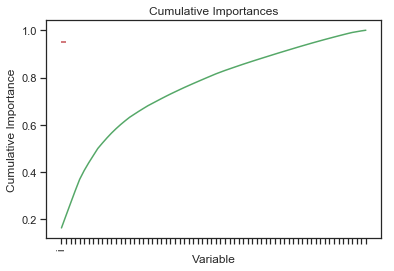

In [317]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_2res)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_2res]
sorted_features = [importance[0] for importance in feature_importances_2res]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_2res)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [318]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 57


In [359]:
print(feature_importances_2res[:20].index)

Index(['BPQ100D_9.0', 'BPQ030_9.0', 'RIDAGEYR', 'BPQ050A_9.0', 'BPQ040A_9.0',
       'BPQ090D_2.0', 'DS1DS_2.0', 'MCQ365C_2.0', 'BPQ020_2.0', 'INDFMPIR',
       'BPQ080_2.0', 'BPQ090D_9.0', 'MCQ365D_2.0', 'BPQ070_9.0', 'RIAGENDR',
       'cluster_mec', 'DRQSPREP_4.0', 'MCQ300A_2.0', 'SEQN', 'log_DR1TCAFF'],
      dtype='object')


### 3rd SMOTE run
using top 20 features only

In [360]:
X_3res = nhanes_model_df[
    ['BPQ100D_9.0', 'BPQ030_9.0', 'RIDAGEYR', 'BPQ050A_9.0', 'BPQ040A_9.0',
       'BPQ090D_2.0', 'DS1DS_2.0', 'MCQ365C_2.0', 'BPQ020_2.0', 'INDFMPIR',
       'BPQ080_2.0', 'BPQ090D_9.0', 'MCQ365D_2.0', 'BPQ070_9.0', 'RIAGENDR',
       'cluster_mec', 'DRQSPREP_4.0', 'MCQ300A_2.0', 'SEQN', 'log_DR1TCAFF']]
y_3res = nhanes_model_df['heart_dz']

# summarize class distribution
counter = Counter(y_3res)
print(counter)

Counter({0: 4403, 1: 309})


In [361]:
X3r_train, X3r_test, y3r_train, y3r_test = train_test_split(X_3res, y_3res)

In [362]:
# transform the dataset
oversample = SMOTE()
X_3res_train, y_3res_train = oversample.fit_resample(X3r_train, y3r_train)

# summarize class distribution (SMOTE)
counter = Counter(y_3res_train)
print(counter)

Counter({0: 3296, 1: 3296})


In [363]:
cv_3res_run = cross_val_score(rfc, X_3res_train, y_3res_train, cv=10)
cv_3res_run

array([0.8       , 0.96363636, 0.98330804, 0.96358118, 0.97268589,
       0.97723824, 0.97116844, 0.96206373, 0.97268589, 0.96206373])

In [364]:
print('Cross-validation mean score for 3rd run: {}'.format (cv_3res_run.mean()))

Cross-validation mean score for 3rd run: 0.952843150779418


In [365]:
roc_cv_3res_score = cross_val_score(rfc, X_3res_train, y_3res_train, cv=10, scoring= 'roc_auc')
roc_cv_3res_score

array([0.92804408, 0.99679063, 0.99692825, 0.99370452, 0.99780787,
       0.99645851, 0.99788155, 0.99713088, 0.99835129, 0.99475454])

In [366]:
print('ROC-AUC mean score for 3rd run: {}'.format (roc_cv_3res_score.mean()))

ROC-AUC mean score for 3rd run: 0.9897852118867594


In [367]:
rfc.fit(X_3res_train, y_3res_train) 
##score testing data.
rfc_3res_run = rfc.score(X3r_test, y3r_test)
print('Accuracy score for balanced data 3rd run: {}'.format (rfc_3res_run))

Accuracy score for balanced data 3rd run: 0.9244482173174873


In [368]:
rfc_3res_predict = rfc.predict(X3r_test)
rfc_3res_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [369]:
y_res_true = y3r_test
y_res_pred = rfc_3res_predict
class3_balanced_report = classification_report(y_res_true, y_res_pred, labels=[0, 1])
print('Classification report for balanced data 3rd run')
print(class3_balanced_report)

Classification report for balanced data 3rd run
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1107
           1       0.38      0.42      0.40        71

    accuracy                           0.92      1178
   macro avg       0.67      0.69      0.68      1178
weighted avg       0.93      0.92      0.93      1178



In [370]:
conf_3res_mat = confusion_matrix(rfc_3res_predict, y3r_test)

print('Confusion Matrix for balanced data 3rd run')
conf_3res_mat

Confusion Matrix for balanced data 3rd run


array([[1059,   41],
       [  48,   30]], dtype=int64)

#### comments on 3rd run, balanced data
In the 3rd run for balanced data, using only the top 15 features, the preferred scores of recall and F1-score have improved at the expense of the accuracy, CV, and ROC-AUC scores. In fact, the best accuracy-based scores were seen on the initial run. 
The confusion matrix indicates that almost half of the class 1 records have been identified, which is by far the highest recall score to date. 

Cross-validation mean score for balanced data 3rd run: 0.9355437531613557
ROC-AUC mean score for balanced data 3rd run: 0.980044279490121
Accuracy score for balanced data 3rd run: 0.898981324278438

Classification report for balanced data 3rd run
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1107
           1       0.30      0.49      0.37        71

    accuracy                           0.90      1178
   macro avg       0.63      0.71      0.66      1178
weighted avg       0.93      0.90      0.91      1178

Confusion Matrix for balanced data 3rd run

array([[1024,   36],
       [  83,   35]], dtype=int64)

#### best scores SMOTE balanced data:

Cross-validation mean score for balanced data initial run: 0.9648837848989134
ROC-AUC mean score for balanced data initial run: 0.9202037351443124
Accuracy score for balanced data initial run: 0.9134125636672326

Precision for initial run: 0.36
              2nd run: 0.22
              3rd run: 0.30
              
**Recall** for initial run: 0.34
            2nd run: 0.18
            **3rd run: 0.49**
            
**F1** for initial run: 0.35
        2nd run: 0.20
        **3rd run: 0.37**

for Recall:
macro avg initial run: 0.65 
            2nd run: 0.57        
            3rd run: 0.71
            
weighted avg initial run: 0.92
                2nd run: 0.90   
                3rd run: 0.93

for F1:
macro avg initial run: 0.65
            2nd run: 0.57  
            3rd run: 0.66
                        
            
weighted avg initial run: 0.92
                2nd run: 0.90
                3rd run: 0.91
                
                
**Confusion Matrix** for balanced data **3rd run:**

array([[1024,   36],
       [  83,   35]], dtype=int64)

### tune hyperparameters on best SMOTE'd model
3rd run, with top 20 features

In [371]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [372]:
rfc = ensemble.RandomForestClassifier(random_state=42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [373]:
def grid_search_wrapper(refit_score='recall_score'):
    #fits a RandomizedSearchCV classifier using refit_score for optimization
    #prints classifier performance metrics
   
    skf = StratifiedKFold(n_splits=10)
    grid_search = RandomizedSearchCV(rfc, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_3res_train.values, y_3res_train.values)

    # make the predictions
    y_pred = grid_search.predict(X3r_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y3r_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [374]:
grid_search_rfc = grid_search_wrapper(refit_score='recall_score')
grid_search_rfc

Best params for recall_score
{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      1020        87
pos        30        41


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_s...
                     

In [375]:
results = pd.DataFrame(grid_search_rfc.cv_results_)
results = results.sort_values(by='mean_test_recall_score', 
                              ascending=False)

results[['mean_test_precision_score', 
         'mean_test_recall_score', 
         'mean_test_accuracy_score', 
         'param_max_depth', 
         'param_max_features', 
         'param_min_samples_split', 
         'param_n_estimators']].round(3).head()

mean_test_precision_score  mean_test_recall_score  \
4                      0.918                   0.965   
8                      0.925                   0.965   
0                      0.924                   0.964   
6                      0.902                   0.961   
9                      0.928                   0.960   

   mean_test_accuracy_score param_max_depth param_max_features  \
4                     0.939               9               sqrt   
8                     0.944              10               sqrt   
0                     0.943              10               sqrt   
6                     0.928               7               auto   
9                     0.943            None               sqrt   

  param_min_samples_split param_n_estimators  
4                       2               1800  
8                       5                400  
0                       5                600  
6                       2               1800  
9                       5               2000

#### Best params for recall_score
{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False}


In [376]:
base_3res_model = ensemble.RandomForestClassifier(random_state = 42, 
                                             n_estimators = 1800,
                                             min_samples_split = 2,
                                             min_samples_leaf = 4,
                                             max_features = 'sqrt',
                                             max_depth = 9,
                                             bootstrap = False)
base_3res_model.fit(X_3res_train, y_3res_train)
base_3res_score = base_accuracy = base_3res_model.score(X3r_test, y3r_test)
print('Accuracy score for balanced data, hyperparameter-tuned 3rd model run: {}'.format (base_3res_score))

Accuracy score for balanced data, hyperparameter-tuned 3rd model run: 0.900679117147708


In [377]:
hp_tuned_3res_run = cross_val_score(base_3res_model, X_3res_train, y_3res_train, cv=10)

print('Cross-validation mean score for balanced data, hyperparameter-tuned 3rd model run: {}'.format (hp_tuned_3res_run
.mean()))

Cross-validation mean score for balanced data, hyperparameter-tuned 3rd model run: 0.9394905044373937


In [378]:
hp_tuned_3res_score = cross_val_score(base_3res_model, X_3res_train, y_3res_train, cv=10, scoring= 'roc_auc')

print('ROC-AUC mean score for balanced data, hyperparameter-tuned 3rd model run: {}'.format (hp_tuned_3res_score
.mean()))

ROC-AUC mean score for balanced data, hyperparameter-tuned 3rd model run: 0.9842430578233288


In [379]:
hp_tuned_3res_predict = base_3res_model.predict(X3r_test)

y_true = y3r_test
y_pred = hp_tuned_3res_predict
hp_tuned_3res_report = classification_report(y_true, y_pred, labels=[0, 1])
print('Classification Report for balanced data, hyperparameter-tuned 3rd model run:')
print(hp_tuned_3res_report)

Classification Report for balanced data, hyperparameter-tuned 3rd model run:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1107
           1       0.32      0.58      0.41        71

    accuracy                           0.90      1178
   macro avg       0.65      0.75      0.68      1178
weighted avg       0.93      0.90      0.91      1178



In [380]:
conf_3res_hp_mat = confusion_matrix(hp_tuned_3res_predict, y3r_test)

print('Confusion Matrix for balanced data, hyperparameter-tuned 3rd model run')
conf_3res_hp_mat

Confusion Matrix for balanced data, hyperparameter-tuned 3rd model run


array([[1020,   30],
       [  87,   41]], dtype=int64)

#### comments on balanced data, hyperparameter-tuned, 3rd run RFC:
Compared to best balanced data 3rd run without hyperparameter-tuning:
The Accuracy and CV scores are both lower, however the ROC-AUC score is noticably higher. The F1-score remains the same, but the recall score is improved, balanced by a lower precision score. In addition, 12 more class 1 records were correctly identified. This result of accurately identifying the true class 1 records is preferable to a higher precision in identifying class 1 records.  
Clearly, the over-sampling of class 1 through SMOTE-balanced data and the tuning of the hyperparameters have improved the performance of this model. 

Accuracy score for balanced data, hyperparameter-tuned 3rd model run: 0.8616298811544991
Cross-validation mean score for balanced data, hyperparameter-tuned 3rd model run: 0.9150625373614751
ROC-AUC mean score for balanced data, hyperparameter-tuned 3rd model run: 0.9627201107510585

Classification Report for balanced data, hyperparameter-tuned 3rd model run:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1107
           1       0.25      0.66      0.37        71

    accuracy                           0.86      1178
   macro avg       0.61      0.77      0.64      1178
weighted avg       0.93      0.86      0.89      1178


Confusion Matrix for balanced data, hyperparameter-tuned 3rd model run

array([[968,  24],
       [139,  47]], dtype=int64)

## gradient boosting model

### data, features to be used for gradient boosting model

In [381]:
# define dataset
X_gbm = nhanes_model_df.drop(
    ['log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 
     'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 
     'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg', 
     'log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 
     'log_folate_dfe_avg', 'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 
     'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 
     'log_cu_avg', 'log_calc_avg', 'heart_dz'], axis=1)
y_gbm = nhanes_model_df['heart_dz']

In [382]:
X_gbm_train, X_gbm_test, y_gbm_train, y_gbm_test = train_test_split(X_gbm, y_gbm)

In [383]:
# transform the dataset
oversample = SMOTE()
X_os_gbm_train, y_os_gbm_train = oversample.fit_resample(X_gbm_train, y_gbm_train)

# summarize class distribution (SMOTE)
counter = Counter(y_os_gbm_train)
print(counter)

Counter({0: 3309, 1: 3309})


Accuracy of the GBM on Base Run: 0.908
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1094
           1       0.36      0.37      0.36        84

    accuracy                           0.91      1178
   macro avg       0.66      0.66      0.66      1178
weighted avg       0.91      0.91      0.91      1178



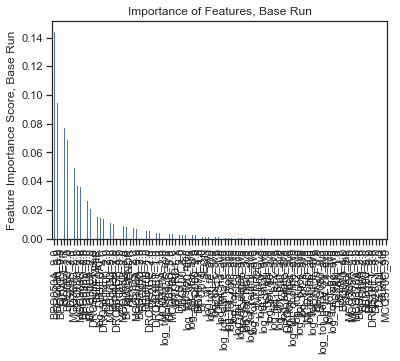

In [386]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

base_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,
                                      max_features='sqrt', random_state=42)

base_gbm.fit(X_os_gbm_train, y_os_gbm_train)
predictors = list(X_os_gbm_train)
feat_imp = pd.Series(base_gbm.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, Base Run')
plt.ylabel('Feature Importance Score, Base Run')

print('Accuracy of the GBM on Base Run: {:.3f}'.format(base_gbm.score(X_gbm_test, y_gbm_test)))
pred=base_gbm.predict(X_gbm_test)
class_report_base_gbm = classification_report(y_gbm_test, pred)
print(class_report_base_gbm)

In [387]:
feature_importances_gbm = pd.DataFrame(base_gbm.feature_importances_,
                                   index = X_gbm_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_gbm

importance
BPQ050A_9.0             0.144310
BPQ030_9.0              0.095015
BPQ100D_9.0             0.080438
RIDAGEYR                0.077988
BPQ080_2.0              0.069147
DS2DS_2.0               0.054499
MCQ365C_2.0             0.049574
BPQ020_2.0              0.036992
MCQ370C_2.0             0.036629
BPQ090D_2.0             0.026952
BPQ040A_9.0             0.026667
MCQ300A_2.0             0.021383
DRQSDIET_2.0            0.018817
INDFMPIR                0.015482
log_DR1TCAFF            0.014775
DRQSPREP_4.0            0.014461
DBD100_2.0              0.013802
MCQ370D_9.0             0.011807
BPQ030_2.0              0.010715
DRQSPREP_3.0            0.010072
BPQ070_9.0              0.009864
MCQ365D_2.0             0.009458
BPQ050A_2.0             0.008874
RIAGENDR                0.008617
DS1DS_2.0               0.007961
MCQ300A_9.0             0.007418
BPQ100D_2.0             0.007404
BPQ070_2.0              0.006198
DBD100_1.0              0.005979
DRQSPREP_2.0            0.005821
DS2DS_1.0               0.005367
DRQSDIET_1.0            0.004863
DS1DS_1.0               0.004822
MCQ370A_2.0             0.004071
log_tot_beta_c_avg      0.003853
BPQ090D_9.0             0.003702
MCQ370D_2.0             0.003663
WTDRD1_x                0.003534
DR2STY_2.0              0.003445
DBD100_3.0              0.003379
cluster_mec             0.003365
log_tot_h20_avg         0.003356
log_tot_sfat_avg        0.003350
BPQ060_9.0              0.002927
DR1STY_1.0              0.002702
BPQ070_3.0              0.002112
SEQN                    0.002112
log_vit_d_avg           0.001769
log_tot_fe_avg          0.001699
log_tot_c_avg           0.001598
DR2STY_1.0              0.001480
log_tot_na_avg          0.001432
log_tot_alpha_c_avg     0.001392
log_tot_lyco_avg        0.001293
log_tot_calc_avg        0.001185
log_tot_cu_avg          0.001178
log_tot_fchol_avg       0.001157
log_tot_sugar_avg       0.001143
DRQSPREP_1.0            0.001096
log_tot_niac_avg        0.001003
log_tot_retinol_avg     0.001002
log_tot_vit_k_avg       0.000947
WTDR2D_x                0.000911
log_tot_d_avg           0.000881
log_tot_mfat_avg        0.000881
DS1AN_1.0               0.000827
log_tot_se_avg          0.000718
log_tot_b12_avg         0.000694
DR1STY_2.0              0.000692
log_tot_pfat_avg        0.000619
log_folate_avg          0.000614
DRQSPREP_9.0            0.000600
log_tot_fiber_avg       0.000533
log_tot_choline_avg     0.000491
log_tot_b2_avg          0.000489
log_tot_phos_avg        0.000414
log_tot_k_avg           0.000408
MCQ365D_9.0             0.000397
log_tot_b6_avg          0.000362
log_tot_vit_e_avg       0.000339
BPQ020_9.0              0.000329
BPQ080_9.0              0.000301
log_tot_beta_cry_avg    0.000287
log_tot_zn_avg          0.000242
log_tot_b1_avg          0.000235
log_tot_mag_avg         0.000233
DS2AN_1.0               0.000201
DS2AN_2.0               0.000145
BPQ070_4.0              0.000040
DBD100_9.0              0.000000
MCQ300A_7.0             0.000000
MCQ365C_9.0             0.000000
cluster_std             0.000000
MCQ370C_9.0             0.000000
DR2STY_9.0              0.000000
DS1AN_2.0               0.000000
BPQ040A_2.0             0.000000
MCQ370A_9.0             0.000000
DRQSDIET_9.0            0.000000
BPQ060_2.0              0.000000
DR1STY_9.0              0.000000
cluster_lab             0.000000

Text(0.5, 1.0, 'Cumulative Importances')

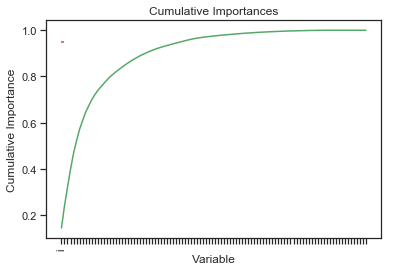

In [388]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_gbm)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_gbm]
sorted_features = [importance[0] for importance in feature_importances_gbm]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_gbm)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [389]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 41


In [391]:
print(feature_importances_gbm[:41].index)

Index(['BPQ050A_9.0', 'BPQ030_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ080_2.0',
       'DS2DS_2.0', 'MCQ365C_2.0', 'BPQ020_2.0', 'MCQ370C_2.0', 'BPQ090D_2.0',
       'BPQ040A_9.0', 'MCQ300A_2.0', 'DRQSDIET_2.0', 'INDFMPIR',
       'log_DR1TCAFF', 'DRQSPREP_4.0', 'DBD100_2.0', 'MCQ370D_9.0',
       'BPQ030_2.0', 'DRQSPREP_3.0', 'BPQ070_9.0', 'MCQ365D_2.0',
       'BPQ050A_2.0', 'RIAGENDR', 'DS1DS_2.0', 'MCQ300A_9.0', 'BPQ100D_2.0',
       'BPQ070_2.0', 'DBD100_1.0', 'DRQSPREP_2.0', 'DS2DS_1.0', 'DRQSDIET_1.0',
       'DS1DS_1.0', 'MCQ370A_2.0', 'log_tot_beta_c_avg', 'BPQ090D_9.0',
       'MCQ370D_2.0', 'WTDRD1_x', 'DR2STY_2.0', 'DBD100_3.0', 'cluster_mec'],
      dtype='object')


In [393]:
X_best41 = nhanes_model_df[
    ['BPQ050A_9.0', 'BPQ030_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ080_2.0',
       'DS2DS_2.0', 'MCQ365C_2.0', 'BPQ020_2.0', 'MCQ370C_2.0', 'BPQ090D_2.0',
       'BPQ040A_9.0', 'MCQ300A_2.0', 'DRQSDIET_2.0', 'INDFMPIR',
       'log_DR1TCAFF', 'DRQSPREP_4.0', 'DBD100_2.0', 'MCQ370D_9.0',
       'BPQ030_2.0', 'DRQSPREP_3.0', 'BPQ070_9.0', 'MCQ365D_2.0',
       'BPQ050A_2.0', 'RIAGENDR', 'DS1DS_2.0', 'MCQ300A_9.0', 'BPQ100D_2.0',
       'BPQ070_2.0', 'DBD100_1.0', 'DRQSPREP_2.0', 'DS2DS_1.0', 'DRQSDIET_1.0',
       'DS1DS_1.0', 'MCQ370A_2.0', 'log_tot_beta_c_avg', 'BPQ090D_9.0',
       'MCQ370D_2.0', 'WTDRD1_x', 'DR2STY_2.0', 'DBD100_3.0', 'cluster_mec']]
y_best41= nhanes_model_df['heart_dz']

# summarize class distribution
counter = Counter(y_best41)
print(counter)

Counter({0: 4403, 1: 309})


In [394]:
X_best41_train, X_best41_test, y_best41_train, y_best41_test = train_test_split(X_best41, y_best41)

In [395]:
# transform the dataset
oversample = SMOTE()
X_os_best41_train, y_os_best41_train = oversample.fit_resample(X_best41_train, y_best41_train)

# summarize class distribution (SMOTE)
counter = Counter(y_os_best41_train)
print(counter)

Counter({0: 3285, 1: 3285})


Accuracy of the GBM on Base Run: 0.910
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1118
           1       0.26      0.42      0.32        60

    accuracy                           0.91      1178
   macro avg       0.61      0.68      0.64      1178
weighted avg       0.93      0.91      0.92      1178



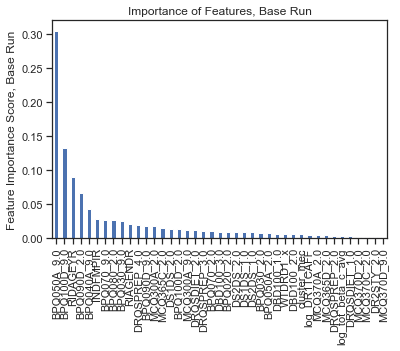

In [396]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

best41_gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,
                                      max_features='sqrt', random_state=42)

best41_gbc.fit(X_os_best41_train, y_os_best41_train)
predictors = list(X_os_best41_train)
feat_imp = pd.Series(best41_gbc.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, Base Run')
plt.ylabel('Feature Importance Score, Base Run')

print('Accuracy of the GBM on Base Run: {:.3f}'.format(best41_gbc.score(X_best41_test, y_best41_test)))
pred=best41_gbc.predict(X_best41_test)
class_report_best41_gbc = classification_report(y_best41_test, pred)
print(class_report_best41_gbc)

In [398]:
pred_gbc_best41=best41_gbc.predict(X_best41_test)
conf_best41_gbc_mat = confusion_matrix(pred_gbc_best41, y_best41_test)

print('Confusion Matrix for balanced data, gbc base model')
conf_best41_gbc_mat

Confusion Matrix for balanced data, gbc base model


array([[1047,   35],
       [  71,   25]], dtype=int64)

In [399]:
feature_importances_best41 = pd.DataFrame(best41_gbc.feature_importances_,
                                   index = X_os_best41_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_best41

importance
BPQ050A_9.0           0.304818
BPQ100D_9.0           0.131661
RIDAGEYR              0.090000
BPQ090D_2.0           0.066137
BPQ040A_9.0           0.042154
INDFMPIR              0.027531
BPQ070_9.0            0.026833
BPQ080_2.0            0.026135
BPQ030_9.0            0.025404
RIAGENDR              0.020061
DRQSPREP_4.0          0.019553
BPQ090D_9.0           0.017782
MCQ300A_2.0           0.016956
MCQ365C_2.0           0.014560
DS1DS_2.0             0.013157
BPQ100D_2.0           0.013043
MCQ300A_9.0           0.011333
DRQSDIET_2.0          0.010759
DRQSPREP_3.0          0.010419
BPQ070_2.0            0.010331
DBD100_3.0            0.008959
BPQ020_2.0            0.008640
DS2DS_2.0             0.008343
DS1DS_1.0             0.008335
DS2DS_1.0             0.007849
BPQ030_2.0            0.006580
BPQ050A_2.0           0.006343
DBD100_1.0            0.005409
WTDRD1_x              0.005396
DBD100_2.0            0.004936
cluster_mec           0.004926
log_DR1TCAFF          0.004748
MCQ370A_2.0           0.004129
MCQ365D_2.0           0.003431
DRQSPREP_2.0          0.003358
log_tot_beta_c_avg    0.003270
DRQSDIET_1.0          0.002615
MCQ370D_2.0           0.001237
MCQ370C_2.0           0.001181
DR2STY_2.0            0.000937
MCQ370D_9.0           0.000749

Text(0.5, 1.0, 'Cumulative Importances')

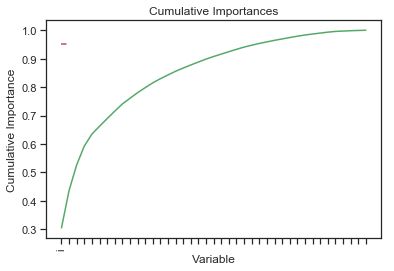

In [400]:
# list of x locations for plotting
x_values = list(range(len(feature_importances_best41)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances_best41]
sorted_features = [importance[0] for importance in feature_importances_best41]

# Cumulative importances
cumulative_importances = np.cumsum(feature_importances_best41)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance') 
plt.title('Cumulative Importances')

In [401]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 27


In [402]:
print(feature_importances_best41[:27].index)

Index(['BPQ050A_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ090D_2.0', 'BPQ040A_9.0',
       'INDFMPIR', 'BPQ070_9.0', 'BPQ080_2.0', 'BPQ030_9.0', 'RIAGENDR',
       'DRQSPREP_4.0', 'BPQ090D_9.0', 'MCQ300A_2.0', 'MCQ365C_2.0',
       'DS1DS_2.0', 'BPQ100D_2.0', 'MCQ300A_9.0', 'DRQSDIET_2.0',
       'DRQSPREP_3.0', 'BPQ070_2.0', 'DBD100_3.0', 'BPQ020_2.0', 'DS2DS_2.0',
       'DS1DS_1.0', 'DS2DS_1.0', 'BPQ030_2.0', 'BPQ050A_2.0'],
      dtype='object')


In [408]:
print(feature_importances_best41[:15].index)

Index(['BPQ050A_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ090D_2.0', 'BPQ040A_9.0',
       'INDFMPIR', 'BPQ070_9.0', 'BPQ080_2.0', 'BPQ030_9.0', 'RIAGENDR',
       'DRQSPREP_4.0', 'BPQ090D_9.0', 'MCQ300A_2.0', 'MCQ365C_2.0',
       'DS1DS_2.0'],
      dtype='object')


In [434]:
X_best15 = nhanes_model_df[
    ['BPQ050A_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ090D_2.0', 'BPQ040A_9.0',
       'INDFMPIR', 'BPQ070_9.0', 'BPQ080_2.0', 'BPQ030_9.0', 'RIAGENDR',
       'DRQSPREP_4.0', 'BPQ090D_9.0', 'MCQ300A_2.0', 'MCQ365C_2.0',
       'DS1DS_2.0']]
y_best15= nhanes_model_df['heart_dz']

# summarize class distribution
counter = Counter(y_best15)
print(counter)

Counter({0: 4403, 1: 309})


In [410]:
X_best15_train, X_best15_test, y_best15_train, y_best15_test = train_test_split(X_best15, y_best15)

In [411]:
# transform the dataset
oversample = SMOTE()
X_os_best15_train, y_os_best15_train = oversample.fit_resample(X_best15_train, y_best15_train)

# summarize class distribution (SMOTE)
counter = Counter(y_os_best15_train)
print(counter)

Counter({0: 3319, 1: 3319})


Accuracy of the GBM on Base Run: 0.868
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1084
           1       0.33      0.62      0.43        94

    accuracy                           0.87      1178
   macro avg       0.65      0.75      0.68      1178
weighted avg       0.91      0.87      0.89      1178



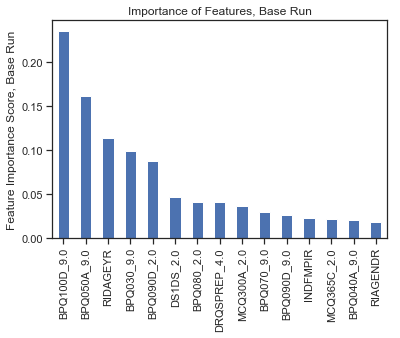

In [412]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

base_gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,
                                      max_features='sqrt', random_state=42)

base_gbc.fit(X_os_best15_train, y_os_best15_train)
predictors = list(X_os_best15_train)
feat_imp = pd.Series(base_gbc.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, Base Run')
plt.ylabel('Feature Importance Score, Base Run')

print('Accuracy of the GBM on Base Run: {:.3f}'.format(base_gbc.score(X_best15_test, y_best15_test)))
pred=base_gbc.predict(X_best15_test)
class_report_base_gbc = classification_report(y_best15_test, pred)
print(class_report_base_gbc)

In [407]:
pred_gbs_base=base_gbc.predict(X_best15_test)
conf_base_gbc_mat = confusion_matrix(pred_gbs_base, y_best15_test)

print('Confusion Matrix for balanced data, gbc base model')
conf_base_gbc_mat

Confusion Matrix for balanced data, gbc base model


array([[1015,   36],
       [  84,   43]], dtype=int64)

## parameter-tuning with gradient boosting

https://www.datacareer.ch/blog/parameter-tuning-in-gradient-boosting-gbm-with-python/
Run a baseline model without tuning:

#### base run parameters:
Current tree specific parameters:

**learning_rate** = 0.1 (shrinkage): Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems

**n_estimators** = 100 (number of trees): 

**max_depth** = 3: Should be chosen (5-8) based on the number of observations and predictors.

**min_samples_split** = 2: This should be ~0.5-1% of total values. With imbalanced class problem, take a small value from the range.

**min_samples_leaf** = 1: Can be selected based on intuition. This is used for preventing overfitting; use a small value with imbalanced classes.

**subsample** = 1: This is a commonly used used start value

**max_features** = 'sqrt': Its a general thumb-rule to start with square root.

**random_state** = 42: same random_state used in RFC model



### tuning learning_rate & n_estimators

In [413]:
# Tuning learning_rate & n_estimators
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
           'n_estimators':[100,250,500,750,1000]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier
                      (max_depth=3, min_samples_split=2, min_samples_leaf=1,
                       subsample=1, max_features='sqrt', random_state=42), 
            param_grid = p_test3, scoring='recall',n_jobs=4, cv=5)
tuning.fit(X_os_best15_train, y_os_best15_train)
print(tuning.scorer_) 
print('Best parameters: {}'.format(tuning.best_params_))
print('Best score: {}'.format(tuning.best_score_))

make_scorer(recall_score, average=binary)
Best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}
Best score: 0.9701789056679205


### tuning max_depth

In [414]:
#max_depth
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier
                      (learning_rate=0.1, n_estimators=1000, 
                       min_samples_split=2, min_samples_leaf=1, 
                       subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test2, scoring='recall',n_jobs=4, cv=5)
tuning.fit(X_os_best15_train, y_os_best15_train)
print(tuning.scorer_) 
print('Best parameters: {}'.format(tuning.best_params_))
print('Best score: {}'.format(tuning.best_score_))

make_scorer(recall_score, average=binary)
Best parameters: {'max_depth': 5}
Best score: 0.9728902033473259


### initial evaluation of model with tuned-parameters 
'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': 5, 

Accuracy of the GBM on model1-tuned run: 0.902
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1084
           1       0.39      0.41      0.40        94

    accuracy                           0.90      1178
   macro avg       0.67      0.68      0.68      1178
weighted avg       0.90      0.90      0.90      1178



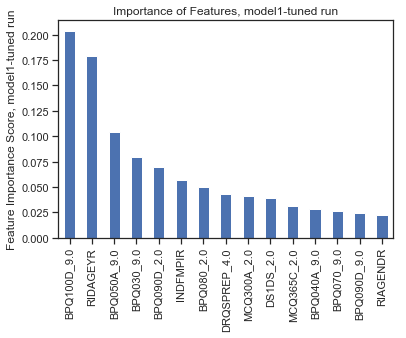

In [415]:
#First evaluation of new model on test set
model1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                                    max_depth=5, min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1,
                                    max_features='sqrt', random_state=42)
model1.fit(X_os_best15_train, y_os_best15_train)
predictors=list(X_os_best15_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, model1-tuned run')
plt.ylabel('Feature Importance Score, model1-tuned run')
print('Accuracy of the GBM on model1-tuned run: {:.3f}'.format(model1.score(X_best15_test, y_best15_test)))
pred=model1.predict(X_best15_test)
class_report_model1 = classification_report(y_best15_test, pred)
print(class_report_model1)

In [416]:
pred_gbs_model1=model1.predict(X_best15_test)
conf_model1_gbc_mat = confusion_matrix(pred_gbs_model1, y_best15_test)

print('Confusion Matrix for balanced data, gbc model1')
conf_model1_gbc_mat

Confusion Matrix for balanced data, gbc model1


array([[1024,   55],
       [  60,   39]], dtype=int64)

# parameter tuning does not improve model

#### model1 performance is not improved over base run with parameter-tuning based on lower recall and F1-scores

### tuning min_sample_split and min_samples_leaf

In [417]:
#tuning min sample split and min samples leaf
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 
           'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,
                                                           n_estimators=1000,
                                                           max_depth=5, 
                                                           subsample=1,
                                                           max_features='sqrt',
                                                           random_state=42), 
            param_grid = p_test4, scoring='recall',n_jobs=4, cv=5)
tuning.fit(X_os_best15_train, y_os_best15_train)
print(tuning.scorer_) 
print('Best parameters: {}'.format(tuning.best_params_))
print('Best score: {}'.format(tuning.best_score_))

make_scorer(recall_score, average=binary)
Best parameters: {'min_samples_leaf': 9, 'min_samples_split': 20}
Best score: 0.9749995456940885


### 2nd evaluation of model with tuned-parameters 
'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 9, 

Accuracy of the GBM on model2-tuned run: 0.898
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1084
           1       0.38      0.41      0.39        94

    accuracy                           0.90      1178
   macro avg       0.66      0.68      0.67      1178
weighted avg       0.90      0.90      0.90      1178



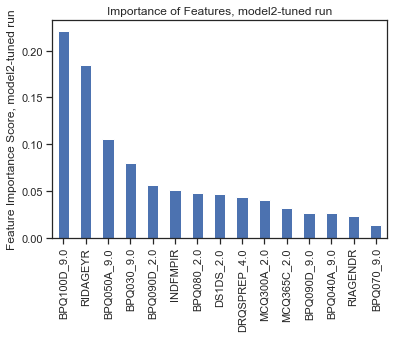

In [418]:
#second evaluation of new model on test set
model2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                                    max_depth=5, min_samples_split=20, 
                                    min_samples_leaf=9, subsample=1,
                                    max_features='sqrt', random_state=42)
model2.fit(X_os_best15_train, y_os_best15_train)
predictors=list(X_os_best15_train)
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, model2-tuned run')
plt.ylabel('Feature Importance Score, model2-tuned run')
print('Accuracy of the GBM on model2-tuned run: {:.3f}'.format(model2.score(X_best15_test, y_best15_test)))
pred=model2.predict(X_best15_test)
class_report_model2 = classification_report(y_best15_test, pred)
print(class_report_model2)

In [419]:
pred_gbs_model2=model2.predict(X_best15_test)
conf_model2_gbc_mat = confusion_matrix(pred_gbs_model2, y_best15_test)

print('Confusion Matrix for balanced data, gbc model2')
conf_model2_gbc_mat

Confusion Matrix for balanced data, gbc model2


array([[1019,   55],
       [  65,   39]], dtype=int64)

#### model2 performance is NOT improved over base run or model1 run with parameter-tuning based on lower recall and F1-scores

### tuning max_features

In [420]:
#tuning max_features
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,
                                                            n_estimators=1000,
                                                            max_depth=5, 
                                                            min_samples_split=2,
                                                            min_samples_leaf=7, 
                                                            subsample=1, 
                                                            random_state=42), 
param_grid = p_test5, scoring='recall',n_jobs=4, cv=5)
tuning.fit(X_os_best15_train, y_os_best15_train)
print(tuning.scorer_) 
print('Best parameters: {}'.format(tuning.best_params_))
print('Best score: {}'.format(tuning.best_score_))

make_scorer(recall_score, average=binary)
Best parameters: {'max_features': 7}
Best score: 0.9749990913881771


### tuning subsample

In [421]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1, 
                                                            n_estimators=1000,
                                                            max_depth=5, 
                                                            min_samples_split=2, 
                                                            min_samples_leaf=7,
                                                            max_features=3 , 
                                                            random_state=42), 
param_grid = p_test6, scoring='recall',n_jobs=4,cv=5)
tuning.fit(X_os_best15_train, y_os_best15_train)
print(tuning.scorer_) 
print('Best parameters: {}'.format(tuning.best_params_))
print('Best score: {}'.format(tuning.best_score_))

make_scorer(recall_score, average=binary)
Best parameters: {'subsample': 0.75}
Best score: 0.9731918624725144


### 3rd evaluation of model with tuned-parameters 
'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 7, 'subsample': 0.75

Accuracy of the GBM on model3-tuned run: 0.899
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1084
           1       0.37      0.39      0.38        94

    accuracy                           0.90      1178
   macro avg       0.66      0.67      0.66      1178
weighted avg       0.90      0.90      0.90      1178



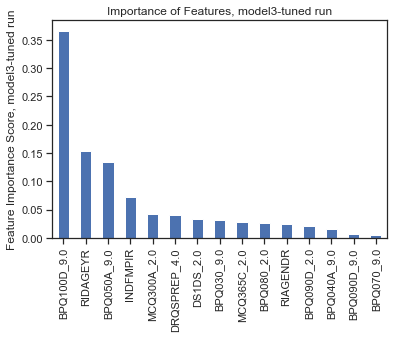

In [422]:
model3=GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                               max_depth=5, min_samples_split=20, 
                               min_samples_leaf=9,max_features=7 , 
                               subsample=0.75, random_state=42)
model3.fit(X_os_best15_train, y_os_best15_train)
predictors=list(X_os_best15_train)
feat_imp = pd.Series(model3.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features, model3-tuned run')
plt.ylabel('Feature Importance Score, model3-tuned run')
print('Accuracy of the GBM on model3-tuned run: {:.3f}'.format(model3.score(X_best15_test, y_best15_test)))
pred=model3.predict(X_best15_test)
class_report_model3 = classification_report(y_best15_test, pred)
print(class_report_model3)

In [423]:
pred_gbs_model3=model3.predict(X_best15_test)
conf_model3_gbc_mat = confusion_matrix(pred_gbs_model3, y_best15_test)

print('Confusion Matrix for balanced data, gbc model3')
conf_model3_gbc_mat

Confusion Matrix for balanced data, gbc model3


array([[1022,   57],
       [  62,   37]], dtype=int64)

#### comments: 

# missing model2 from graph?

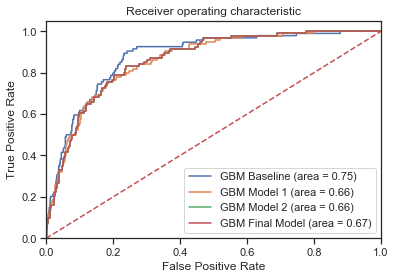

In [424]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


#run models
base_gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,
                                      max_features='sqrt', random_state=42)
base_gbc.fit(X_os_best15_train, y_os_best15_train)


model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,
                                    max_depth=5, min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1,
                                    max_features='sqrt', random_state=42)
model1.fit(X_os_best15_train, y_os_best15_train)


model2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,
                                    max_depth=5, min_samples_split=2, 
                                    min_samples_leaf=7, subsample=1,
                                    max_features='sqrt', random_state=42)
model2.fit(X_os_best15_train, y_os_best15_train)


model3=GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,
                               max_depth=5, min_samples_split=2, 
                               min_samples_leaf=7,max_features=3 , 
                               subsample=1, random_state=42)
model3.fit(X_os_best15_train, y_os_best15_train)


#calculate values for ROC AUC plot
#baseline model
base_gbc_roc_auc = roc_auc_score(y_best15_test, base_gbc.predict(X_best15_test))
fprB, tprB, thresholdsB = roc_curve(y_best15_test, base_gbc.predict_proba(X_best15_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_best15_test, model1.predict(X_best15_test))
fpr1, tpr1, thresholds1 = roc_curve(y_best15_test, model1.predict_proba(X_best15_test)[:,1])
#model 2
model2_roc_auc = roc_auc_score(y_best15_test, model1.predict(X_best15_test))
fpr2, tpr2, thresholds2 = roc_curve(y_best15_test, model2.predict_proba(X_best15_test)[:,1])
#model 3 
model3_roc_auc = roc_auc_score(y_best15_test, model3.predict(X_best15_test))
fpr3, tpr3, thresholds3 = roc_curve(y_best15_test, model3.predict_proba(X_best15_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % base_gbc_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fpr2, tpr2, label='GBM Model 2 (area = %0.2f)' % model2_roc_auc)
plt.plot(fpr3, tpr3, label='GBM Final Model (area = %0.2f)' % model3_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### comments: gradient boosting

## SVM Model

In [427]:
X_svc = nhanes_model_df.drop(
    ['log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_fat_avg', 'log_tot_mois_avg', 'log_tot_vit_a_avg', 
     'log_tot_lutein_avg', 'log_vit_b1_avg', 'log_vit_b2_avg', 
     'log_niac_avg', 'log_vit_b6_avg', 'log_vit_b12_avg', 
     'log_tot_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg', 
     'log_folate_dfe_avg', 'log_vit_c_avg', 'log_na_avg', 'log_k_avg', 
     'log_se_avg', 'log_mag_avg', 'log_fe_avg', 'log_zn_avg', 
     'log_cu_avg', 'log_calc_avg', 'heart_dz'], axis=1)
y_svc = nhanes_model_df['heart_dz']

# summarize class distribution
counter = Counter(y_svc)
print(counter)

Counter({0: 4403, 1: 309})


In [428]:
X_svc_train, X_svc_test, y_svc_train, y_svc_test = train_test_split(X_svc, y_svc)

In [429]:
# transform the dataset
oversample = SMOTE()
X_os_svc_train, y_os_svc_train = oversample.fit_resample(X_svc_train, y_svc_train)

# summarize class distribution (SMOTE)
counter = Counter(y_os_svc_train)
print(counter)

Counter({0: 3291, 1: 3291})


### SVC linear

In [430]:
# import support vector classifier 
from sklearn.svm import SVC 
svc_linear = SVC(kernel='linear') 
svc_linear.fit(X_os_svc_train, y_os_svc_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [431]:
y_l_pred = svc_linear.predict(X_svc_test)

print('Confusion Matrix for SVC_linear model:')
print(confusion_matrix(y_svc_test,y_l_pred))
      
print('Classification Report for SVC_linear model:')
print(classification_report(y_svc_test,y_l_pred))


Confusion Matrix for SVC_linear model:
[[836 276]
 [ 12  54]]
Classification Report for SVC_linear model:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1112
           1       0.16      0.82      0.27        66

    accuracy                           0.76      1178
   macro avg       0.57      0.78      0.56      1178
weighted avg       0.94      0.76      0.82      1178



In [435]:
X_svc15 = nhanes_model_df[
    ['BPQ050A_9.0', 'BPQ100D_9.0', 'RIDAGEYR', 'BPQ090D_2.0', 'BPQ040A_9.0',
       'INDFMPIR', 'BPQ070_9.0', 'BPQ080_2.0', 'BPQ030_9.0', 'RIAGENDR',
       'DRQSPREP_4.0', 'BPQ090D_9.0', 'MCQ300A_2.0', 'MCQ365C_2.0',
       'DS1DS_2.0']]
y_svc15 = nhanes_model_df['heart_dz']

# summarize class distribution
counter = Counter(y_svc15)
print(counter)

Counter({0: 4403, 1: 309})


In [436]:
X_svc15_train, X_svc15_test, y_svc15_train, y_svc15_test = train_test_split(X_svc15, y_svc15)

In [437]:
# transform the dataset
oversample = SMOTE()
X_os_svc15_train, y_os_svc15_train = oversample.fit_resample(X_svc15_train, y_svc15_train)

# summarize class distribution (SMOTE)
counter = Counter(y_os_svc15_train)
print(counter)

Counter({0: 3304, 1: 3304})


#### 2nd run, linear

In [438]:
y_l_pred = svc_linear.predict(X_svc15_test)

print('Confusion Matrix for SVC_linear model:')
print(confusion_matrix(y_svc15_test,y_l_pred))
      
print('Classification Report for SVC_linear model:')
print(classification_report(y_svc15_test,y_l_pred))


ValueError: X.shape[1] = 15 should be equal to 102, the number of features at training time

#### comment: 1       0.26      0.71      0.38        83

### SVC poly

In [ ]:
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_os_svc15_train, y_os_svc15_train)

In [ ]:
y_p_pred = svc_poly.predict(X_svc15_test)

print('Confusion Matrix for SVC_poly model:')
print(confusion_matrix(y_svc15_test,y_p_pred))
      
print('Classification Report for SVC_poly model:')
print(classification_report(y_svc15_test,y_p_pred))


#### comment: 1       0.30      0.47      0.37        83

### SVC rbf

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_os_svc15_train, y_os_svc15_train)

In [ ]:
y_r_pred = svc_rbf.predict(X_svc15_test)

print('Confusion Matrix for SVC_rbf model:')
print(confusion_matrix(y_svc15_test,y_r_pred))
      
print('Classification Report for SVC_rbf model:')
print(classification_report(y_svc15_test,y_r_pred))

#### comment: 1       0.23      0.80      0.36        83
best

### SVC sigmoid

In [ ]:
svc_sig = SVC(kernel='sigmoid')
svc_sig.fit(X_os_svc15_train, y_os_svc15_train)

In [ ]:
y_sig_pred = svc_sig.predict(X_svc15_test)

print('Confusion Matrix for SVC_rbf model:')
print(confusion_matrix(y_svc15_test,y_r_pred))
      
print('Classification Report for SVC_rbf model:')
print(classification_report(y_svc15_test,y_sig_pred))

#### comment: 1       0.06      0.48      0.10        83

In [ ]:
nhanes_best15_df = nhanes_model_df[
    ['BPQ100D_9.0', 'BPQ050A_9.0', 'BPQ030_9.0', 'BPQ090D_2.0',
       'BPQ040A_9.0', 'BPQ080_2.0', 'RIDAGEYR', 'BPQ020_2.0', 'DS1DS_2.0',
       'BPQ090D_9.0', 'MCQ365C_2.0', 'DS2DS_2.0', 'INDFMPIR', 'DRQSPREP_4.0',
       'MCQ365D_2.0', 'heart_dz']]

In [ ]:
nhanes_model_df.head()

# biostastics